In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display
from matplotlib.animation import FuncAnimation, PillowWriter
import os
import imageio
from tqdm import tqdm
from matplotlib.animation import FuncAnimation
from copy import copy

In [14]:
nRacesMen = 21
results = pd.read_excel('../../data/WC2023-Results.xlsx', index_col = 3, sheet_name='GenM', header = [1, 2])
#results.reset_index()
results.columns = list(map(lambda x: x[0] + '_' + x[1], list(results.columns)))
results.reset_index()
natDict = dict(zip(results.index, results['CLASSIFICA_NAZ.']))
columnsErase = list(filter(lambda x: x.find('Unnamed') != -1, list(results.columns)))
columnsErase += ['CLASSIFICA_NAZ.'] # Eliminating cancelled race, unused column and nationality
results = results.drop(columns = columnsErase)
results = results.iloc[:,:nRacesMen]
results = results.fillna(0)
transposedResults = results.transpose()
transposedResults = transposedResults.astype(int)
resultsCumulative = transposedResults.cumsum(axis = 0)
resultsCumulative.index = resultsCumulative.index.set_names(['race'])
resultsCumulative.head()

,index,Unnamed: 0_level_0_Unnamed: 0_level_1,Unnamed: 1_level_0_POS,Unnamed: 2_level_0_TOT,CLASSIFICA_NAZ.,KON_IN,KON_SP,KON_PU,HOC_SP,HOC_PU,...,RUH_MS.1,ANT_SP.1,ANT_PU.1,NMĚ_SP.1,NMĚ_PU.1,ÖST_IN.1,ÖST_MS.1,HOL_SP.1,HOL_PU.1,HOL_MS.2
0,ANDERSEN A.F.,NaN,49,71,NOR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,6.0,75.0,NaN,NaN
1,ANDERSEN F.F.,NaN,25,324,NOR,18.0,40.0,26.0,50.0,21.0,...,30.0,46.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0
2,ANGELIS A.,NaN,96,0,GRE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,92.0,NaN,83.0,NaN,102.0,NaN,NaN
3,AOLAID M.,NaN,96,0,EST,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,87.0,NaN,NaN,NaN,NaN
4,BANYS L.,NaN,96,0,LTU,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,ZASHEV V.,NaN,96,0,BUL,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,ZAWOL M.,NaN,96,0,POL,NaN,0.0,NaN,0.0,NaN,...,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,ZENI E.,NaN,94,1,ITA,NaN,NaN,NaN,NaN,NaN,...,NaN,52.0,51.0,53.0,55.0,40.0,NaN,108.0,NaN,NaN
163,ZINGERLE D.,NaN,96,0,ITA,0.0,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ANDERSEN A.F.,ANDERSEN F.F.,ANGELIS A.,AOLAID M.,BANYS L.,BAUER Kiril,BEAUVAIS C.,BELETSKIY D.,BIONAZ D.,BIRKENTALS R.,...,WIESTNER S.,WRIGHT C.,YAMAMOTO R.,YAN X.,ZAHKNA R.,ZASHEV V.,ZAWOL M.,ZENI E.,ZINGERLE D.,ZOBEL D.
race,,,,,,,,,,,,,,,,,,,,,
KON_IN,0,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60
KON_SP,0,58,0,0,0,0,0,0,0,0,...,0,18,0,0,0,0,0,0,0,92
KON_PU,0,84,0,0,0,0,0,0,0,0,...,0,18,0,0,0,0,0,0,0,126
HOC_SP,0,134,0,0,0,0,0,0,0,0,...,0,18,0,0,6,0,0,0,0,126
HOC_PU,0,155,0,0,0,0,0,0,0,0,...,0,18,0,0,6,0,0,0,0,126


<BarContainer object of 165 artists>

(159.5, 165.5)

<BarContainer object of 165 artists>

(159.5, 165.5)

<BarContainer object of 165 artists>

(159.5, 165.5)

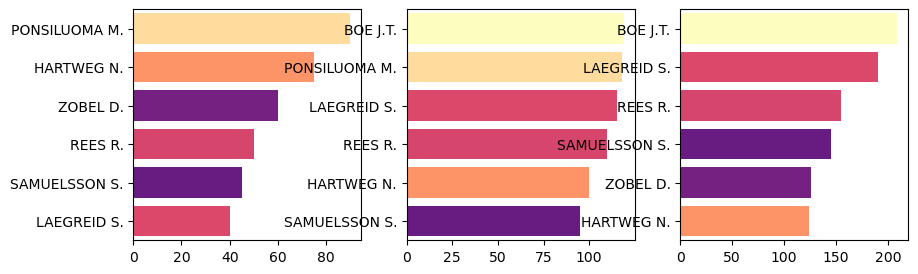

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
colors = plt.cm.magma(np.random.uniform(0, 1, len(list(resultsCumulative.columns))))
races = list(resultsCumulative.index)


for ax, race in zip(axes.flatten(), races):
    tmp = resultsCumulative.loc[race]
    y = resultsCumulative.loc[race].rank(method = 'first').values
    width = tmp.values
    ax.barh(y = y, width = width, color = colors, tick_label = tmp.index)
    ax.set_ylim(bottom = len(y) - 5.5, top = len(y) + 0.5)
plt.show()

In [16]:
intermediateSteps = 25
dfTransition = resultsCumulative.copy()
dfTransition = dfTransition.reset_index()
dfTransition.index = dfTransition.index * intermediateSteps
lastIdx = dfTransition.index[-1] + 1
dfExpanded = dfTransition.reindex(range(lastIdx))
dfExpanded['race'] = dfExpanded['race'].fillna(method='ffill')
dfExpanded = dfExpanded.set_index('race')
dfExpanded.head()

,ANDERSEN A.F.,ANDERSEN F.F.,ANGELIS A.,AOLAID M.,BANYS L.,BAUER Kiril,BEAUVAIS C.,BELETSKIY D.,BIONAZ D.,BIRKENTALS R.,...,WIESTNER S.,WRIGHT C.,YAMAMOTO R.,YAN X.,ZAHKNA R.,ZASHEV V.,ZAWOL M.,ZENI E.,ZINGERLE D.,ZOBEL D.
race,,,,,,,,,,,,,,,,,,,,,
KON_IN,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
KON_IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KON_IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KON_IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KON_IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
dfRankExpanded = dfExpanded.rank(axis = 1, method = 'first')
dfRankExpanded.head()

,ANDERSEN A.F.,ANDERSEN F.F.,ANGELIS A.,AOLAID M.,BANYS L.,BAUER Kiril,BEAUVAIS C.,BELETSKIY D.,BIONAZ D.,BIRKENTALS R.,...,WIESTNER S.,WRIGHT C.,YAMAMOTO R.,YAN X.,ZAHKNA R.,ZASHEV V.,ZAWOL M.,ZENI E.,ZINGERLE D.,ZOBEL D.
race,,,,,,,,,,,,,,,,,,,,,
KON_IN,1.0,143.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,163.0
KON_IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KON_IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KON_IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KON_IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
dfExpanded = dfExpanded.interpolate(method = 'linear')
dfExpanded.head()

,ANDERSEN A.F.,ANDERSEN F.F.,ANGELIS A.,AOLAID M.,BANYS L.,BAUER Kiril,BEAUVAIS C.,BELETSKIY D.,BIONAZ D.,BIRKENTALS R.,...,WIESTNER S.,WRIGHT C.,YAMAMOTO R.,YAN X.,ZAHKNA R.,ZASHEV V.,ZAWOL M.,ZENI E.,ZINGERLE D.,ZOBEL D.
race,,,,,,,,,,,,,,,,,,,,,
KON_IN,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.00
KON_IN,0.0,19.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.28
KON_IN,0.0,21.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.56
KON_IN,0.0,22.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.84
KON_IN,0.0,24.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.12


In [19]:
dfRankExpanded = dfRankExpanded.interpolate(method = 'linear')
dfRankExpanded.head()


,ANDERSEN A.F.,ANDERSEN F.F.,ANGELIS A.,AOLAID M.,BANYS L.,BAUER Kiril,BEAUVAIS C.,BELETSKIY D.,BIONAZ D.,BIRKENTALS R.,...,WIESTNER S.,WRIGHT C.,YAMAMOTO R.,YAN X.,ZAHKNA R.,ZASHEV V.,ZAWOL M.,ZENI E.,ZINGERLE D.,ZOBEL D.
race,,,,,,,,,,,,,,,,,,,,,
KON_IN,1.0,143.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,117.00,118.00,119.00,120.00,121.00,122.00,123.00,124.00,125.00,163.00
KON_IN,1.0,143.4,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,116.56,118.68,118.52,119.52,120.52,121.52,122.52,123.52,124.52,162.84
KON_IN,1.0,143.8,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,116.12,119.36,118.04,119.04,120.04,121.04,122.04,123.04,124.04,162.68
KON_IN,1.0,144.2,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,115.68,120.04,117.56,118.56,119.56,120.56,121.56,122.56,123.56,162.52
KON_IN,1.0,144.6,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,115.24,120.72,117.08,118.08,119.08,120.08,121.08,122.08,123.08,162.36


In [20]:
list(reversed(sorted(dict(dfRankExpanded.iloc[0]).items(), key = lambda x: x[1])))[:5]

[('PONSILUOMA M.', 165.0),
 ('HARTWEG N.', 164.0),
 ('ZOBEL D.', 163.0),
 ('REES R.', 162.0),
 ('SAMUELSSON S.', 161.0)]

In [21]:
# Primary and secondary colors dictionary
colorsDict = {'RUS':['blue', 'red'], 'NOR':['firebrick', 'mediumblue'], 'GER':['orange', 'black'],
'BLR':['red', 'forestgreen'], 'UKR':['deepskyblue', 'darkkhaki'], 'SWE':['dodgerblue', 'gold'], 'FRA':['darkblue', 'darkblue'],
'ITA':['dodgerblue', 'dodgerblue'],'CZE':['royalblue', 'red'],'FIN':['white', 'mediumblue'],'CAN':['red', 'white'],
'SVK':['red', 'blue'],'KAZ':['skyblue', 'khaki'],'POL':['white', 'orangered'], 'SUI':['white', 'red'],'AUT':['firebrick', 'white'],
'JPN':['white', 'firebrick'],'SLO':['blue', 'white'],'USA':['firebrick', 'navy'],'EST':['black', 'steelblue'],'BUL':['darkgreen', 'red'],
'LAT':['brown', 'white'],'ROU':['blue', 'gold'], 'LTU':['forestgreen', 'gold'], 'CHN':['red', 'yellow'], 'MDA':['mediumblue', 'orangered'],
'BEL':['black', 'gold'], 'KOR':['white', 'firebrick'], 'CRO':['white', 'red'], 'GBR':['navy', 'red'], 'AUS':['gold', 'gold'], 
'ARM':['blue', 'gold'], 'SRB':['white', 'midnightblue'], 'ESP':['red', 'yellow'],
  'NZL':['black', 'white'], 'AND':['mediumblue', 'gold'], 'GRL':['red', 'white']}

In [22]:
#pd.DataFrame(nnatDict.values(), columns=Nation)
counts_per_ath = pd.DataFrame(np.unique(np.array(list(natDict.values()))), columns = ['Nation'])
counts_per_ath.index = counts_per_ath['Nation']


counts_per_ath.head()

,Nation
Nation,
AUT,AUT
BEL,BEL
BUL,BUL
CAN,CAN
CHN,CHN


In [ ]:
# Adding the colors
counts_per_ath['primary_color'] = counts_per_ath.index.map(colorsDict)
counts_per_ath['secondary_color'] = counts_per_ath.apply(lambda x: x.primary_color[-1], axis=1)
counts_per_ath['primary_color'] = counts_per_ath.apply(lambda x: x.primary_color[0], axis=1)

counts_per_ath.head()

In [24]:
converter = {'KON': 'Kontiolahti', 'HOC': 'Hochfilzen', 'LGB': 'Annecy', 'POK': 'Pokljuka', 'RUH': 'Ruhpolding',\
             'ANT': 'Anterselva', 'NMĚ': 'Nove Mesto', 'ÖST': 'Ostersund', 'HOL': 'Holmenkollen',\
                'IN': 'Individuale', 'PU': 'Inseguimento', 'SP': 'Sprint', 'MS': 'Mass Start'}

Text(0.5, 1.0, 'Individuale di Kontiolahti')

(159.5, 165.5)

(0.0, 112.5)

[]

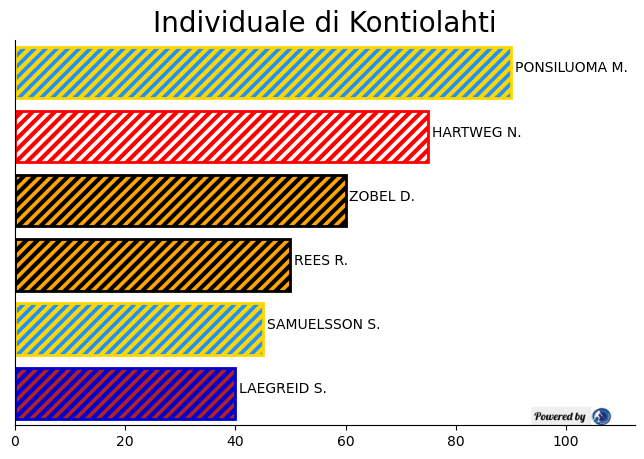

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
import matplotlib
colorBack = matplotlib.colors.to_rgba('lightskyblue', alpha = 0.5)
labels = dfExpanded.columns
img = matplotlib.image.imread('poweredBy.jpg')
for i, ax in enumerate([ax], start = 0):
    names = list(reversed(sorted(dict(dfRankExpanded.iloc[i]).items(), key = lambda x: x[1])))[:6]
    y = dfRankExpanded.iloc[i]
    
    width = dfExpanded.iloc[i]
    widthsPlotted = np.sort(np.array(width))[::-1][:7]
    heightsPlotted = np.sort(np.array(y))[::-1][:7]
    maxWidth = np.max(width)
    nations = []
    for i in range(6):
        _ = ax.text(x = width[names[i][0]] + 0.7, y = y[names[i][0]], s = names[i][0], fontsize = 10);
        nations.append(natDict[names[i][0]])
    annotations = list(map(lambda x: converter[x], dfRankExpanded.index[i].split('_')))
    #ax.text(f'{annotations[1]}\n{annotations[0]}', (np.max(widthsPlotted), np.min(heightsPlotted) + 1), fontsize = 20)
    #ax.text(np.max(widthsPlotted)-maxWidth/5 ,np.min(heightsPlotted) + 1, f'{annotations[1]} di\n{annotations[0]}', fontsize = 20,\
     #       bbox=dict(facecolor=colorBack, edgecolor= 'black', linewidth=2, boxstyle='round,pad=0.5'))
    ax.set_title(f'{annotations[1]} di {annotations[0]}', fontsize = 20)
    barList = ax.barh(y = y, width = width)
    ax.imshow(img, extent=[maxWidth ,maxWidth+ maxWidth/4, 159 + 0.1 , 159+1.1], aspect='auto')
    ax.set_ylim(bottom = len(y) - 5.5, top = len(y) + 0.5)
    #ax.set_ylim(bottom = 0, top = 5 + 0.5)
    ax.set_xlim(left = 0, right = maxWidth + maxWidth/4)
    
    colorsList = [colorsDict[nat] for nat in nations]
    primaryColors = list(map(lambda x: x[0], colorsList))
    secondaryColors = list(map(lambda x: x[1], colorsList))
    #print(counts_per_ath['primary_color'])
    for bar, height, width, main_color, hatch_color in zip([barList[i] for i in range(1, 7)], heightsPlotted,\
                                                           widthsPlotted, primaryColors, secondaryColors):
        
        #print(list(zip(ax.containers[0][:5:-1], counts_per_ath['primary_color'], counts_per_ath['secondary_color'])))
        #print(list(reversed(ax.containers[0])))
        rect = matplotlib.patches.Rectangle((0, height-0.4), width, bar.get_height(), hatch='///', linewidth=0)
        rect.set_facecolor(main_color)
        rect.set_edgecolor(hatch_color)
        rect.set_linewidth(2)
        _ = ax.add_patch(rect)
        matplotlib.rcParams['hatch.linewidth'] = 3
        #bar.set_facecolor(main_color)
        #bar.set_edgecolor(hatch_color)
        #bar.set_hatch('//')

    # Setting tick labels
    ax.set_yticks([])
    ax.spines[['right', 'top']].set_visible(False)

plt.show()

In [39]:
# frames between transitions
n_frames = 1
nIndex = len(dfExpanded.index)
labels = dfExpanded.columns
print('Creating charts\n')
filenames = []
path = '../../'
for j in tqdm(np.arange(0, nIndex)):
    
    
    
    if j % intermediateSteps == 0:
        annotations = list(map(lambda x: converter[x], dfRankExpanded.index[j].split('_')))
        title = f'{annotations[1]} di {annotations[0]}'
        rangeFrames = 5
    else:
        annotations = list(map(lambda x: converter[x], dfRankExpanded.index[j+intermediateSteps - ((j+intermediateSteps)%intermediateSteps)].split('_')))
        title = f'{annotations[1]} di {annotations[0]}'
        rangeFrames = 1
    for i in np.arange(0, rangeFrames):
        
        #y_temp = (y + (y_path / n_frames) * i)
        
        
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
        names = list(reversed(sorted(dict(dfRankExpanded.iloc[j]).items(), key = lambda x: x[1])))[:6]
        y =  dfRankExpanded.iloc[j]
        width = dfExpanded.iloc[j]
        widthsPlotted = np.sort(np.array(width))[::-1][:7]
        heightsPlotted = np.sort(np.array(y))[::-1][:7]
        maxWidth = np.max(width)
        #print(np.sort(np.array(width))[::-1])
        
        nations = []
        for k in range(6):
            ax.text(x = width[names[k][0]] + width[names[k][0]]/100, y = y[names[k][0]], s = names[k][0], fontsize = 10);
            nations.append(natDict[names[k][0]])
        
    #ax.text(f'{annotations[1]}\n{annotations[0]}', (np.max(widthsPlotted), np.min(heightsPlotted) + 1), fontsize = 20)
    #ax.text(np.max(widthsPlotted)-maxWidth/5 ,np.min(heightsPlotted) + 1, f'{annotations[1]} di\n{annotations[0]}', fontsize = 20,\
     #       bbox=dict(facecolor=colorBack, edgecolor= 'black', linewidth=2, boxstyle='round,pad=0.5'))
        ax.set_title(title, fontsize = 20)
        ax.set_xlabel('Punti', fontsize = 15)
        ax.barh(y = y, width = width, color = colors, alpha = 0)
        ax.set_ylim(bottom = len(y) - 5.5, top = len(y) + 0.5)
        ax.set_xlim(left = 0, right = maxWidth + maxWidth/4)
        ax.imshow(img, extent=[maxWidth ,maxWidth+ maxWidth/4, 139 + 0.1 , 139+1.1], aspect='auto')
        colorsList = [colorsDict[nat] for nat in nations]
        primaryColors = list(map(lambda x: x[0], colorsList))
        secondaryColors = list(map(lambda x: x[1], colorsList))
        #plt.title(f'Epoch {j}', fontsize=16);
        #plt.xlabel('Digit', fontsize=14)
        #plt.ylabel('Estimated probability', fontsize=14)
        #plt.grid(alpha=0.5, axis='y')
        for bar, height, width, main_color, hatch_color in zip([barList[l] for l in range(1, 7)], heightsPlotted,\
                                                           widthsPlotted, primaryColors, secondaryColors):
        
        #print(list(zip(ax.containers[0][:5:-1], counts_per_ath['primary_color'], counts_per_ath['secondary_color'])))
        #print(list(reversed(ax.containers[0])))
            rect = matplotlib.patches.Rectangle((0, height-0.4), width, bar.get_height(), hatch='///', linewidth=0)
            rect.set_facecolor(main_color)
            rect.set_edgecolor(hatch_color)
            rect.set_linewidth(2)
            _ = ax.add_patch(rect)
            matplotlib.rcParams['hatch.linewidth'] = 3
        ax.set_yticks([])
        ax.spines[['right', 'top']].set_visible(False)
        # build file name and append to list of file names
        filename = f'frame_{j}_{i}.png'
        filenames.append(path + filename)
        # last frame of each viz stays longer 
        #if (i == n_frames):
         #   for i in range(1):
          #      filenames.append(filename)
        # save img
        plt.savefig(path + filename)
        plt.close()

# Build GIF

with imageio.get_writer('raceMen.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)


# Remove files
for filename in set(filenames):
    os.remove(filename)


Creating charts



  0%|          | 0/501 [00:00<?, ?it/s]

Text(90.9, 165.0, 'PONSILUOMA M.')

Text(75.75, 164.0, 'HARTWEG N.')

Text(60.6, 163.0, 'ZOBEL D.')

Text(50.5, 162.0, 'REES R.')

Text(45.45, 161.0, 'SAMUELSSON S.')

Text(40.4, 160.0, 'LAEGREID S.')

Text(0.5, 1.0, 'Individuale di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 112.5)

[]

Text(90.9, 165.0, 'PONSILUOMA M.')

Text(75.75, 164.0, 'HARTWEG N.')

Text(60.6, 163.0, 'ZOBEL D.')

Text(50.5, 162.0, 'REES R.')

Text(45.45, 161.0, 'SAMUELSSON S.')

Text(40.4, 160.0, 'LAEGREID S.')

Text(0.5, 1.0, 'Individuale di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 112.5)

[]

Text(90.9, 165.0, 'PONSILUOMA M.')

Text(75.75, 164.0, 'HARTWEG N.')

Text(60.6, 163.0, 'ZOBEL D.')

Text(50.5, 162.0, 'REES R.')

Text(45.45, 161.0, 'SAMUELSSON S.')

Text(40.4, 160.0, 'LAEGREID S.')

Text(0.5, 1.0, 'Individuale di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 112.5)

[]

Text(90.9, 165.0, 'PONSILUOMA M.')

Text(75.75, 164.0, 'HARTWEG N.')

Text(60.6, 163.0, 'ZOBEL D.')

Text(50.5, 162.0, 'REES R.')

Text(45.45, 161.0, 'SAMUELSSON S.')

Text(40.4, 160.0, 'LAEGREID S.')

Text(0.5, 1.0, 'Individuale di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 112.5)

[]

Text(90.9, 165.0, 'PONSILUOMA M.')

Text(75.75, 164.0, 'HARTWEG N.')

Text(60.6, 163.0, 'ZOBEL D.')

Text(50.5, 162.0, 'REES R.')

Text(45.45, 161.0, 'SAMUELSSON S.')

Text(40.4, 160.0, 'LAEGREID S.')

Text(0.5, 1.0, 'Individuale di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 112.5)

[]

  0%|          | 1/501 [00:03<28:36,  3.43s/it]

Text(92.0312, 164.96, 'PONSILUOMA M.')

Text(76.76, 163.88, 'HARTWEG N.')

Text(61.8928, 162.84, 'ZOBEL D.')

Text(52.924, 162.0, 'REES R.')

Text(47.47, 160.96, 'SAMUELSSON S.')

Text(43.43, 160.12, 'LAEGREID S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 113.9)

[]

  0%|          | 2/501 [00:04<15:10,  1.82s/it]

Text(93.16239999999999, 164.92, 'PONSILUOMA M.')

Text(77.77, 163.76, 'HARTWEG N.')

Text(63.1856, 162.68, 'ZOBEL D.')

Text(55.348, 162.0, 'REES R.')

Text(49.49, 160.92, 'SAMUELSSON S.')

Text(46.46, 160.24, 'LAEGREID S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 115.3)

[]

  1%|          | 3/501 [00:04<10:16,  1.24s/it]

Text(94.2936, 164.88, 'PONSILUOMA M.')

Text(78.78, 163.64, 'HARTWEG N.')

Text(64.47840000000001, 162.52, 'ZOBEL D.')

Text(57.772000000000006, 162.0, 'REES R.')

Text(51.51, 160.88, 'SAMUELSSON S.')

Text(49.49, 160.36, 'LAEGREID S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 116.7)

[]

  1%|          | 4/501 [00:05<07:34,  1.09it/s]

Text(95.4248, 164.84, 'PONSILUOMA M.')

Text(79.79, 163.52, 'HARTWEG N.')

Text(65.77120000000001, 162.36, 'ZOBEL D.')

Text(60.196, 162.0, 'REES R.')

Text(53.53, 160.84, 'SAMUELSSON S.')

Text(52.52, 160.48, 'LAEGREID S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 118.10000000000001)

[]

  1%|          | 5/501 [00:05<06:05,  1.36it/s]

Text(96.556, 164.8, 'PONSILUOMA M.')

Text(80.8, 163.4, 'HARTWEG N.')

Text(67.06400000000001, 162.2, 'ZOBEL D.')

Text(62.62, 162.0, 'REES R.')

Text(55.55, 160.8, 'SAMUELSSON S.')

Text(55.55, 160.6, 'LAEGREID S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 119.5)

[]

  1%|          | 6/501 [00:06<05:39,  1.46it/s]

Text(97.6872, 164.76, 'PONSILUOMA M.')

Text(81.81, 163.28, 'HARTWEG N.')

Text(68.3568, 162.04, 'ZOBEL D.')

Text(65.04400000000001, 162.0, 'REES R.')

Text(57.57, 160.76, 'SAMUELSSON S.')

Text(58.58, 160.72, 'LAEGREID S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 120.9)

[]

  1%|▏         | 7/501 [00:06<04:58,  1.66it/s]

Text(98.8184, 164.72, 'PONSILUOMA M.')

Text(82.82, 163.16, 'HARTWEG N.')

Text(67.468, 162.0, 'REES R.')

Text(69.6496, 161.88, 'ZOBEL D.')

Text(61.61, 160.84, 'LAEGREID S.')

Text(59.59, 160.72, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 122.30000000000001)

[]

  2%|▏         | 8/501 [00:06<04:31,  1.81it/s]

Text(99.9496, 164.68, 'PONSILUOMA M.')

Text(83.83, 163.04, 'HARTWEG N.')

Text(69.892, 162.0, 'REES R.')

Text(70.94239999999999, 161.72, 'ZOBEL D.')

Text(64.64, 160.96, 'LAEGREID S.')

Text(61.61, 160.68, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 123.70000000000002)

[]

  2%|▏         | 9/501 [00:07<04:22,  1.87it/s]

Text(101.0808, 164.64, 'PONSILUOMA M.')

Text(84.84, 162.92, 'HARTWEG N.')

Text(72.31599999999999, 162.0, 'REES R.')

Text(72.23519999999999, 161.56, 'ZOBEL D.')

Text(67.67, 161.08, 'LAEGREID S.')

Text(63.63, 160.64, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 125.1)

[]

  2%|▏         | 10/501 [00:08<04:35,  1.78it/s]

Text(102.212, 164.6, 'PONSILUOMA M.')

Text(85.85, 162.8, 'HARTWEG N.')

Text(74.74, 162.0, 'REES R.')

Text(73.52799999999999, 161.4, 'ZOBEL D.')

Text(70.7, 161.2, 'LAEGREID S.')

Text(65.65, 160.6, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 126.5)

[]

  2%|▏         | 11/501 [00:08<04:40,  1.74it/s]

Text(103.3432, 164.56, 'PONSILUOMA M.')

Text(86.86, 162.68, 'HARTWEG N.')

Text(77.164, 162.0, 'REES R.')

Text(73.73, 161.32, 'LAEGREID S.')

Text(74.82079999999999, 161.24, 'ZOBEL D.')

Text(67.67, 160.56, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 127.89999999999999)

[]

  2%|▏         | 12/501 [00:09<04:24,  1.85it/s]

Text(104.4744, 164.52, 'PONSILUOMA M.')

Text(87.87, 162.56, 'HARTWEG N.')

Text(79.588, 162.0, 'REES R.')

Text(76.76, 161.44, 'LAEGREID S.')

Text(76.1136, 161.08, 'ZOBEL D.')

Text(69.69, 160.52, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 129.3)

[]

  3%|▎         | 13/501 [00:09<04:08,  1.96it/s]

Text(105.6056, 164.48, 'PONSILUOMA M.')

Text(88.88, 162.44, 'HARTWEG N.')

Text(82.012, 162.0, 'REES R.')

Text(79.79, 161.56, 'LAEGREID S.')

Text(77.4064, 160.92, 'ZOBEL D.')

Text(71.71, 160.48, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 130.7)

[]

  3%|▎         | 14/501 [00:10<04:21,  1.86it/s]

Text(106.7368, 164.44, 'PONSILUOMA M.')

Text(89.89, 162.32, 'HARTWEG N.')

Text(84.43599999999999, 162.0, 'REES R.')

Text(82.82, 161.68, 'LAEGREID S.')

Text(78.6992, 160.76, 'ZOBEL D.')

Text(73.73, 160.44, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 132.10000000000002)

[]

  3%|▎         | 15/501 [00:10<04:05,  1.98it/s]

Text(107.868, 164.4, 'PONSILUOMA M.')

Text(90.9, 162.2, 'HARTWEG N.')

Text(86.86, 162.0, 'REES R.')

Text(85.85, 161.8, 'LAEGREID S.')

Text(79.992, 160.6, 'ZOBEL D.')

Text(83.83, 160.6, 'BOE J.T.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 133.5)

[]

  3%|▎         | 16/501 [00:11<03:58,  2.03it/s]

Text(108.9992, 164.36, 'PONSILUOMA M.')

Text(91.91, 162.08, 'HARTWEG N.')

Text(89.284, 162.0, 'REES R.')

Text(88.88, 161.92, 'LAEGREID S.')

Text(87.466, 161.04, 'BOE J.T.')

Text(81.2848, 160.44, 'ZOBEL D.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 134.9)

[]

  3%|▎         | 17/501 [00:11<03:52,  2.08it/s]

Text(110.13040000000001, 164.32, 'PONSILUOMA M.')

Text(91.91, 162.04, 'LAEGREID S.')

Text(91.708, 162.0, 'REES R.')

Text(92.92, 161.96, 'HARTWEG N.')

Text(91.102, 161.48, 'BOE J.T.')

Text(79.79, 160.32, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 136.3)

[]

  4%|▎         | 18/501 [00:12<04:13,  1.90it/s]

Text(111.2616, 164.28, 'PONSILUOMA M.')

Text(94.94, 162.16, 'LAEGREID S.')

Text(94.13199999999999, 162.0, 'REES R.')

Text(94.738, 161.92, 'BOE J.T.')

Text(93.93, 161.84, 'HARTWEG N.')

Text(81.81, 160.28, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 137.7)

[]

  4%|▍         | 19/501 [00:12<04:11,  1.92it/s]

Text(112.3928, 164.24, 'PONSILUOMA M.')

Text(98.37400000000001, 162.36, 'BOE J.T.')

Text(97.97, 162.28, 'LAEGREID S.')

Text(96.556, 162.0, 'REES R.')

Text(94.94, 161.72, 'HARTWEG N.')

Text(83.83, 160.24, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 139.1)

[]

  4%|▍         | 20/501 [00:13<04:08,  1.94it/s]

Text(113.524, 164.2, 'PONSILUOMA M.')

Text(102.01, 162.8, 'BOE J.T.')

Text(101.0, 162.4, 'LAEGREID S.')

Text(98.98, 162.0, 'REES R.')

Text(95.95, 161.6, 'HARTWEG N.')

Text(85.85, 160.2, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 140.5)

[]

  4%|▍         | 21/501 [00:13<04:03,  1.97it/s]

Text(114.65520000000001, 164.16, 'PONSILUOMA M.')

Text(105.64600000000002, 163.24, 'BOE J.T.')

Text(104.03, 162.52, 'LAEGREID S.')

Text(101.40400000000001, 162.0, 'REES R.')

Text(96.96, 161.48, 'HARTWEG N.')

Text(87.87, 160.16, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 141.9)

[]

  4%|▍         | 22/501 [00:14<05:19,  1.50it/s]

Text(115.7864, 164.12, 'PONSILUOMA M.')

Text(109.282, 163.68, 'BOE J.T.')

Text(107.06, 162.64, 'LAEGREID S.')

Text(103.828, 162.0, 'REES R.')

Text(97.97, 161.36, 'HARTWEG N.')

Text(89.89, 160.12, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 143.3)

[]

  5%|▍         | 23/501 [00:15<04:57,  1.61it/s]

Text(112.91799999999999, 164.12, 'BOE J.T.')

Text(116.91760000000001, 164.08, 'PONSILUOMA M.')

Text(110.09, 162.76, 'LAEGREID S.')

Text(106.252, 162.0, 'REES R.')

Text(98.98, 161.24, 'HARTWEG N.')

Text(91.91, 160.08, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 144.70000000000002)

[]

  5%|▍         | 24/501 [00:15<04:33,  1.74it/s]

Text(116.554, 164.56, 'BOE J.T.')

Text(118.0488, 164.04, 'PONSILUOMA M.')

Text(113.12, 162.88, 'LAEGREID S.')

Text(108.67599999999999, 162.0, 'REES R.')

Text(99.99, 161.12, 'HARTWEG N.')

Text(93.93, 160.04, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 146.1)

[]

  5%|▍         | 25/501 [00:16<04:17,  1.85it/s]

Text(120.19, 165.0, 'BOE J.T.')

Text(119.18, 164.0, 'PONSILUOMA M.')

Text(116.15, 163.0, 'LAEGREID S.')

Text(111.1, 162.0, 'REES R.')

Text(101.0, 161.0, 'HARTWEG N.')

Text(95.95, 160.0, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 148.75)

[]

Text(120.19, 165.0, 'BOE J.T.')

Text(119.18, 164.0, 'PONSILUOMA M.')

Text(116.15, 163.0, 'LAEGREID S.')

Text(111.1, 162.0, 'REES R.')

Text(101.0, 161.0, 'HARTWEG N.')

Text(95.95, 160.0, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 148.75)

[]

Text(120.19, 165.0, 'BOE J.T.')

Text(119.18, 164.0, 'PONSILUOMA M.')

Text(116.15, 163.0, 'LAEGREID S.')

Text(111.1, 162.0, 'REES R.')

Text(101.0, 161.0, 'HARTWEG N.')

Text(95.95, 160.0, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 148.75)

[]

Text(120.19, 165.0, 'BOE J.T.')

Text(119.18, 164.0, 'PONSILUOMA M.')

Text(116.15, 163.0, 'LAEGREID S.')

Text(111.1, 162.0, 'REES R.')

Text(101.0, 161.0, 'HARTWEG N.')

Text(95.95, 160.0, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 148.75)

[]

Text(120.19, 165.0, 'BOE J.T.')

Text(119.18, 164.0, 'PONSILUOMA M.')

Text(116.15, 163.0, 'LAEGREID S.')

Text(111.1, 162.0, 'REES R.')

Text(101.0, 161.0, 'HARTWEG N.')

Text(95.95, 160.0, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 148.75)

[]

  5%|▌         | 26/501 [00:18<09:24,  1.19s/it]

Text(123.826, 165.0, 'BOE J.T.')

Text(119.382, 163.8, 'PONSILUOMA M.')

Text(119.18, 163.04, 'LAEGREID S.')

Text(112.91799999999999, 162.04, 'REES R.')

Text(101.9696, 160.96, 'HARTWEG N.')

Text(97.97, 160.08, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 153.25)

[]

  5%|▌         | 27/501 [00:19<07:39,  1.03it/s]

Text(127.462, 165.0, 'BOE J.T.')

Text(119.584, 163.6, 'PONSILUOMA M.')

Text(122.21, 163.08, 'LAEGREID S.')

Text(114.73599999999999, 162.08, 'REES R.')

Text(102.9392, 160.92, 'HARTWEG N.')

Text(99.99, 160.16, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 157.75)

[]

  6%|▌         | 28/501 [00:19<06:27,  1.22it/s]

Text(131.098, 165.0, 'BOE J.T.')

Text(119.786, 163.4, 'PONSILUOMA M.')

Text(125.24, 163.12, 'LAEGREID S.')

Text(116.554, 162.12, 'REES R.')

Text(103.9088, 160.88, 'HARTWEG N.')

Text(102.01, 160.24, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 162.25)

[]

  6%|▌         | 29/501 [00:20<05:34,  1.41it/s]

Text(134.734, 165.0, 'BOE J.T.')

Text(119.988, 163.2, 'PONSILUOMA M.')

Text(128.27, 163.16, 'LAEGREID S.')

Text(118.372, 162.16, 'REES R.')

Text(104.8784, 160.84, 'HARTWEG N.')

Text(104.03, 160.32, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 166.75)

[]

  6%|▌         | 30/501 [00:20<05:18,  1.48it/s]

Text(138.37, 165.0, 'BOE J.T.')

Text(131.3, 163.2, 'LAEGREID S.')

Text(120.19, 163.0, 'PONSILUOMA M.')

Text(120.19, 162.2, 'REES R.')

Text(105.848, 160.8, 'HARTWEG N.')

Text(106.05, 160.4, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 171.25)

[]

  6%|▌         | 31/501 [00:21<04:44,  1.65it/s]

Text(142.006, 165.0, 'BOE J.T.')

Text(134.33, 163.24, 'LAEGREID S.')

Text(120.392, 162.8, 'PONSILUOMA M.')

Text(122.008, 162.24, 'REES R.')

Text(106.8176, 160.76, 'HARTWEG N.')

Text(108.07, 160.48, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 175.75)

[]

  6%|▋         | 32/501 [00:21<04:23,  1.78it/s]

Text(145.642, 165.0, 'BOE J.T.')

Text(137.36, 163.28, 'LAEGREID S.')

Text(120.59400000000001, 162.6, 'PONSILUOMA M.')

Text(123.826, 162.28, 'REES R.')

Text(107.7872, 160.72, 'HARTWEG N.')

Text(110.09, 160.56, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 180.25)

[]

  7%|▋         | 33/501 [00:22<04:07,  1.89it/s]

Text(149.27800000000002, 165.0, 'BOE J.T.')

Text(140.39, 163.32, 'LAEGREID S.')

Text(120.79599999999999, 162.4, 'PONSILUOMA M.')

Text(125.644, 162.32, 'REES R.')

Text(108.75680000000001, 160.68, 'HARTWEG N.')

Text(112.11, 160.64, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 184.75)

[]

  7%|▋         | 34/501 [00:22<04:19,  1.80it/s]

Text(152.91400000000002, 165.0, 'BOE J.T.')

Text(143.42, 163.36, 'LAEGREID S.')

Text(127.462, 162.36, 'REES R.')

Text(120.99799999999999, 162.2, 'PONSILUOMA M.')

Text(114.13, 160.72, 'SAMUELSSON S.')

Text(109.7264, 160.64, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 189.25)

[]

  7%|▋         | 35/501 [00:23<04:04,  1.90it/s]

Text(156.55, 165.0, 'BOE J.T.')

Text(146.45, 163.4, 'LAEGREID S.')

Text(129.28, 162.4, 'REES R.')

Text(121.2, 162.0, 'PONSILUOMA M.')

Text(116.15, 160.8, 'SAMUELSSON S.')

Text(110.696, 160.6, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 193.75)

[]

  7%|▋         | 36/501 [00:23<03:55,  1.97it/s]

Text(160.186, 165.0, 'BOE J.T.')

Text(149.48, 163.44, 'LAEGREID S.')

Text(131.098, 162.44, 'REES R.')

Text(121.402, 161.8, 'PONSILUOMA M.')

Text(118.17, 160.88, 'SAMUELSSON S.')

Text(111.6656, 160.56, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 198.25)

[]

  7%|▋         | 37/501 [00:24<03:48,  2.03it/s]

Text(163.822, 165.0, 'BOE J.T.')

Text(152.51, 163.48, 'LAEGREID S.')

Text(132.916, 162.48, 'REES R.')

Text(121.604, 161.6, 'PONSILUOMA M.')

Text(120.19, 160.96, 'SAMUELSSON S.')

Text(112.6352, 160.52, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 202.75)

[]

  8%|▊         | 38/501 [00:24<04:04,  1.89it/s]

Text(167.458, 165.0, 'BOE J.T.')

Text(155.54, 163.52, 'LAEGREID S.')

Text(134.734, 162.52, 'REES R.')

Text(121.806, 161.4, 'PONSILUOMA M.')

Text(122.21, 161.04, 'SAMUELSSON S.')

Text(113.6048, 160.48, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 207.25)

[]

  8%|▊         | 39/501 [00:25<03:58,  1.94it/s]

Text(171.094, 165.0, 'BOE J.T.')

Text(158.57, 163.56, 'LAEGREID S.')

Text(136.552, 162.56, 'REES R.')

Text(122.008, 161.2, 'PONSILUOMA M.')

Text(124.23, 161.12, 'SAMUELSSON S.')

Text(114.5744, 160.44, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 211.75)

[]

  8%|▊         | 40/501 [00:25<03:50,  2.00it/s]

Text(174.73, 165.0, 'BOE J.T.')

Text(161.6, 163.6, 'LAEGREID S.')

Text(138.37, 162.6, 'REES R.')

Text(126.25, 161.2, 'SAMUELSSON S.')

Text(122.21, 161.0, 'PONSILUOMA M.')

Text(115.54400000000001, 160.4, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 216.25)

[]

  8%|▊         | 41/501 [00:26<03:49,  2.01it/s]

Text(178.36599999999999, 165.0, 'BOE J.T.')

Text(164.63, 163.64, 'LAEGREID S.')

Text(140.18800000000002, 162.64, 'REES R.')

Text(128.27, 161.28, 'SAMUELSSON S.')

Text(122.412, 160.8, 'PONSILUOMA M.')

Text(116.5136, 160.36, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 220.75)

[]

  8%|▊         | 42/501 [00:26<04:11,  1.82it/s]

Text(182.00199999999998, 165.0, 'BOE J.T.')

Text(167.66, 163.68, 'LAEGREID S.')

Text(142.006, 162.68, 'REES R.')

Text(130.29, 161.36, 'SAMUELSSON S.')

Text(122.614, 160.6, 'PONSILUOMA M.')

Text(116.27120000000001, 160.36, 'ZOBEL D.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 225.25)

[]

  9%|▊         | 43/501 [00:27<03:57,  1.93it/s]

Text(185.638, 165.0, 'BOE J.T.')

Text(170.69, 163.72, 'LAEGREID S.')

Text(143.824, 162.72, 'REES R.')

Text(132.31, 161.44, 'SAMUELSSON S.')

Text(117.6448, 160.44, 'ZOBEL D.')

Text(122.81599999999999, 160.4, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 229.75)

[]

  9%|▉         | 44/501 [00:27<03:54,  1.95it/s]

Text(189.274, 165.0, 'BOE J.T.')

Text(173.72, 163.76, 'LAEGREID S.')

Text(145.642, 162.76, 'REES R.')

Text(134.33, 161.52, 'SAMUELSSON S.')

Text(119.0184, 160.52, 'ZOBEL D.')

Text(119.4224, 160.24, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 234.25)

[]

  9%|▉         | 45/501 [00:28<03:47,  2.01it/s]

Text(192.91, 165.0, 'BOE J.T.')

Text(176.75, 163.8, 'LAEGREID S.')

Text(147.46, 162.8, 'REES R.')

Text(136.35, 161.6, 'SAMUELSSON S.')

Text(120.392, 160.6, 'ZOBEL D.')

Text(120.392, 160.2, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 238.75)

[]

  9%|▉         | 46/501 [00:28<04:02,  1.88it/s]

Text(196.54600000000002, 165.0, 'BOE J.T.')

Text(179.78, 163.84, 'LAEGREID S.')

Text(149.27800000000002, 162.84, 'REES R.')

Text(138.37, 161.68, 'SAMUELSSON S.')

Text(121.7656, 160.68, 'ZOBEL D.')

Text(121.3616, 160.16, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 243.25000000000003)

[]

  9%|▉         | 47/501 [00:29<03:50,  1.97it/s]

Text(200.182, 165.0, 'BOE J.T.')

Text(182.81, 163.88, 'LAEGREID S.')

Text(151.096, 162.88, 'REES R.')

Text(140.39, 161.76, 'SAMUELSSON S.')

Text(123.1392, 160.76, 'ZOBEL D.')

Text(122.33120000000001, 160.12, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 247.75)

[]

 10%|▉         | 48/501 [00:29<03:42,  2.04it/s]

Text(203.818, 165.0, 'BOE J.T.')

Text(185.84, 163.92, 'LAEGREID S.')

Text(152.91400000000002, 162.92, 'REES R.')

Text(142.41, 161.84, 'SAMUELSSON S.')

Text(124.5128, 160.84, 'ZOBEL D.')

Text(123.3008, 160.08, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 252.25)

[]

 10%|▉         | 49/501 [00:30<03:37,  2.08it/s]

Text(207.454, 165.0, 'BOE J.T.')

Text(188.87, 163.96, 'LAEGREID S.')

Text(154.732, 162.96, 'REES R.')

Text(144.43, 161.92, 'SAMUELSSON S.')

Text(125.8864, 160.92, 'ZOBEL D.')

Text(124.2704, 160.04, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 256.75)

[]

 10%|▉         | 50/501 [00:30<03:30,  2.14it/s]

Text(211.09, 165.0, 'BOE J.T.')

Text(191.9, 164.0, 'LAEGREID S.')

Text(156.55, 163.0, 'REES R.')

Text(146.45, 162.0, 'SAMUELSSON S.')

Text(127.26, 161.0, 'ZOBEL D.')

Text(125.24, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 261.25)

[]

Text(211.09, 165.0, 'BOE J.T.')

Text(191.9, 164.0, 'LAEGREID S.')

Text(156.55, 163.0, 'REES R.')

Text(146.45, 162.0, 'SAMUELSSON S.')

Text(127.26, 161.0, 'ZOBEL D.')

Text(125.24, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 261.25)

[]

Text(211.09, 165.0, 'BOE J.T.')

Text(191.9, 164.0, 'LAEGREID S.')

Text(156.55, 163.0, 'REES R.')

Text(146.45, 162.0, 'SAMUELSSON S.')

Text(127.26, 161.0, 'ZOBEL D.')

Text(125.24, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 261.25)

[]

Text(211.09, 165.0, 'BOE J.T.')

Text(191.9, 164.0, 'LAEGREID S.')

Text(156.55, 163.0, 'REES R.')

Text(146.45, 162.0, 'SAMUELSSON S.')

Text(127.26, 161.0, 'ZOBEL D.')

Text(125.24, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 261.25)

[]

Text(211.09, 165.0, 'BOE J.T.')

Text(191.9, 164.0, 'LAEGREID S.')

Text(156.55, 163.0, 'REES R.')

Text(146.45, 162.0, 'SAMUELSSON S.')

Text(127.26, 161.0, 'ZOBEL D.')

Text(125.24, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 261.25)

[]

 10%|█         | 51/501 [00:33<08:28,  1.13s/it]

Text(214.726, 165.0, 'BOE J.T.')

Text(194.324, 164.0, 'LAEGREID S.')

Text(156.99439999999998, 162.92, 'REES R.')

Text(147.3388, 162.0, 'SAMUELSSON S.')

Text(127.26, 160.8, 'ZOBEL D.')

Text(126.048, 159.96, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 265.75)

[]

 10%|█         | 52/501 [00:33<07:02,  1.06it/s]

Text(218.362, 165.0, 'BOE J.T.')

Text(196.74800000000002, 164.0, 'LAEGREID S.')

Text(157.4388, 162.84, 'REES R.')

Text(148.2276, 162.0, 'SAMUELSSON S.')

Text(127.26, 160.6, 'ZOBEL D.')

Text(126.856, 159.92, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 270.25)

[]

 11%|█         | 53/501 [00:34<05:59,  1.25it/s]

Text(221.99800000000002, 165.0, 'BOE J.T.')

Text(199.172, 164.0, 'LAEGREID S.')

Text(157.8832, 162.76, 'REES R.')

Text(149.1164, 162.0, 'SAMUELSSON S.')

Text(127.26, 160.4, 'ZOBEL D.')

Text(127.664, 159.88, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 274.75)

[]

 11%|█         | 54/501 [00:34<05:15,  1.42it/s]

Text(225.63400000000001, 165.0, 'BOE J.T.')

Text(201.596, 164.0, 'LAEGREID S.')

Text(158.3276, 162.68, 'REES R.')

Text(150.0052, 162.0, 'SAMUELSSON S.')

Text(127.26, 160.2, 'ZOBEL D.')

Text(128.472, 159.84, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 279.25)

[]

 11%|█         | 55/501 [00:35<05:10,  1.44it/s]

Text(229.27, 165.0, 'BOE J.T.')

Text(204.02, 164.0, 'LAEGREID S.')

Text(158.772, 162.6, 'REES R.')

Text(150.894, 162.0, 'SAMUELSSON S.')

Text(127.26, 160.0, 'ZOBEL D.')

Text(129.28, 159.8, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 283.75)

[]

 11%|█         | 56/501 [00:36<04:55,  1.51it/s]

Text(232.906, 165.0, 'BOE J.T.')

Text(206.44400000000002, 164.0, 'LAEGREID S.')

Text(159.2164, 162.52, 'REES R.')

Text(151.7828, 162.0, 'SAMUELSSON S.')

Text(127.26, 159.8, 'ZOBEL D.')

Text(130.08800000000002, 159.76, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 288.25)

[]

 11%|█▏        | 57/501 [00:36<04:29,  1.64it/s]

Text(236.542, 165.0, 'BOE J.T.')

Text(208.86800000000002, 164.0, 'LAEGREID S.')

Text(159.66080000000002, 162.44, 'REES R.')

Text(152.67159999999998, 162.0, 'SAMUELSSON S.')

Text(130.896, 159.72, 'HARTWEG N.')

Text(127.26, 159.6, 'ZOBEL D.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 292.75)

[]

 12%|█▏        | 58/501 [00:37<04:14,  1.74it/s]

Text(240.178, 165.0, 'BOE J.T.')

Text(211.292, 164.0, 'LAEGREID S.')

Text(160.1052, 162.36, 'REES R.')

Text(153.5604, 162.0, 'SAMUELSSON S.')

Text(131.704, 159.68, 'HARTWEG N.')

Text(143.42, 159.6, 'JACQUELIN E.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 297.25)

[]

 12%|█▏        | 59/501 [00:37<04:30,  1.64it/s]

Text(243.814, 165.0, 'BOE J.T.')

Text(213.716, 164.0, 'LAEGREID S.')

Text(160.5496, 162.28, 'REES R.')

Text(154.4492, 162.0, 'SAMUELSSON S.')

Text(146.45, 159.8, 'JACQUELIN E.')

Text(132.512, 159.64, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 301.75)

[]

 12%|█▏        | 60/501 [00:38<04:11,  1.75it/s]

Text(247.45, 165.0, 'BOE J.T.')

Text(216.14, 164.0, 'LAEGREID S.')

Text(160.994, 162.2, 'REES R.')

Text(155.33800000000002, 162.0, 'SAMUELSSON S.')

Text(149.48, 160.0, 'JACQUELIN E.')

Text(133.32, 159.6, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 306.25)

[]

 12%|█▏        | 61/501 [00:38<04:04,  1.80it/s]

Text(251.08599999999998, 165.0, 'BOE J.T.')

Text(218.564, 164.0, 'LAEGREID S.')

Text(161.4384, 162.12, 'REES R.')

Text(156.2268, 162.0, 'SAMUELSSON S.')

Text(152.51, 160.2, 'JACQUELIN E.')

Text(134.12800000000001, 159.56, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 310.75)

[]

 12%|█▏        | 62/501 [00:39<04:16,  1.71it/s]

Text(254.72199999999998, 165.0, 'BOE J.T.')

Text(220.988, 164.0, 'LAEGREID S.')

Text(161.8828, 162.04, 'REES R.')

Text(157.1156, 162.0, 'SAMUELSSON S.')

Text(155.54, 160.4, 'JACQUELIN E.')

Text(134.936, 159.52, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 315.25)

[]

 13%|█▎        | 63/501 [00:39<03:59,  1.83it/s]

Text(258.358, 165.0, 'BOE J.T.')

Text(223.41199999999998, 164.0, 'LAEGREID S.')

Text(158.0044, 162.0, 'SAMUELSSON S.')

Text(162.3272, 161.96, 'REES R.')

Text(158.57, 160.6, 'JACQUELIN E.')

Text(145.238, 159.52, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 319.75)

[]

 13%|█▎        | 64/501 [00:40<03:55,  1.86it/s]

Text(261.99399999999997, 165.0, 'BOE J.T.')

Text(225.83599999999998, 164.0, 'LAEGREID S.')

Text(158.89319999999998, 162.0, 'SAMUELSSON S.')

Text(162.7716, 161.88, 'REES R.')

Text(161.6, 160.8, 'JACQUELIN E.')

Text(146.854, 159.56, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 324.25)

[]

 13%|█▎        | 65/501 [00:40<03:47,  1.91it/s]

Text(265.63, 165.0, 'BOE J.T.')

Text(228.26, 164.0, 'LAEGREID S.')

Text(159.78199999999998, 162.0, 'SAMUELSSON S.')

Text(163.216, 161.8, 'REES R.')

Text(164.63, 161.0, 'JACQUELIN E.')

Text(148.47, 159.6, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 328.75)

[]

 13%|█▎        | 66/501 [00:41<04:05,  1.77it/s]

Text(269.266, 165.0, 'BOE J.T.')

Text(230.684, 164.0, 'LAEGREID S.')

Text(160.6708, 162.0, 'SAMUELSSON S.')

Text(163.66039999999998, 161.72, 'REES R.')

Text(167.66, 161.2, 'JACQUELIN E.')

Text(150.08599999999998, 159.64, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 333.25)

[]

 13%|█▎        | 67/501 [00:42<03:57,  1.83it/s]

Text(272.902, 165.0, 'BOE J.T.')

Text(233.108, 164.0, 'LAEGREID S.')

Text(161.55960000000002, 162.0, 'SAMUELSSON S.')

Text(164.10479999999998, 161.64, 'REES R.')

Text(170.69, 161.4, 'JACQUELIN E.')

Text(151.702, 159.68, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 337.75)

[]

 14%|█▎        | 68/501 [00:42<03:51,  1.87it/s]

Text(276.538, 165.0, 'BOE J.T.')

Text(235.53199999999998, 164.0, 'LAEGREID S.')

Text(162.4484, 162.0, 'SAMUELSSON S.')

Text(173.72, 161.6, 'JACQUELIN E.')

Text(164.54919999999998, 161.56, 'REES R.')

Text(153.318, 159.72, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 342.25)

[]

 14%|█▍        | 69/501 [00:43<04:30,  1.59it/s]

Text(280.174, 165.0, 'BOE J.T.')

Text(237.956, 164.0, 'LAEGREID S.')

Text(163.3372, 162.0, 'SAMUELSSON S.')

Text(176.75, 161.8, 'JACQUELIN E.')

Text(164.99360000000001, 161.48, 'REES R.')

Text(154.934, 159.76, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 346.75)

[]

 14%|█▍        | 70/501 [00:44<04:30,  1.59it/s]

Text(283.81, 165.0, 'BOE J.T.')

Text(240.38, 164.0, 'LAEGREID S.')

Text(164.226, 162.0, 'SAMUELSSON S.')

Text(179.78, 162.0, 'JACQUELIN E.')

Text(165.43800000000002, 161.4, 'REES R.')

Text(156.55, 159.8, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 351.25)

[]

 14%|█▍        | 71/501 [00:44<04:12,  1.71it/s]

Text(287.446, 165.0, 'BOE J.T.')

Text(242.804, 164.0, 'LAEGREID S.')

Text(182.81, 162.2, 'JACQUELIN E.')

Text(165.1148, 162.0, 'SAMUELSSON S.')

Text(165.88240000000002, 161.32, 'REES R.')

Text(158.166, 159.84, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 355.75)

[]

 14%|█▍        | 72/501 [00:45<04:03,  1.76it/s]

Text(291.082, 165.0, 'BOE J.T.')

Text(245.228, 164.0, 'LAEGREID S.')

Text(185.84, 162.4, 'JACQUELIN E.')

Text(166.0036, 162.0, 'SAMUELSSON S.')

Text(166.32680000000002, 161.24, 'REES R.')

Text(159.78199999999998, 159.88, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 360.25)

[]

 15%|█▍        | 73/501 [00:45<03:58,  1.79it/s]

Text(294.718, 165.0, 'BOE J.T.')

Text(247.652, 164.0, 'LAEGREID S.')

Text(188.87, 162.6, 'JACQUELIN E.')

Text(166.8924, 162.0, 'SAMUELSSON S.')

Text(166.7712, 161.16, 'REES R.')

Text(161.39800000000002, 159.92, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 364.75)

[]

 15%|█▍        | 74/501 [00:46<04:09,  1.71it/s]

Text(298.354, 165.0, 'BOE J.T.')

Text(250.076, 164.0, 'LAEGREID S.')

Text(191.9, 162.8, 'JACQUELIN E.')

Text(167.7812, 162.0, 'SAMUELSSON S.')

Text(167.2156, 161.08, 'REES R.')

Text(163.014, 159.96, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 369.25)

[]

 15%|█▍        | 75/501 [00:46<03:54,  1.82it/s]

Text(301.99, 165.0, 'BOE J.T.')

Text(252.5, 164.0, 'LAEGREID S.')

Text(194.93, 163.0, 'JACQUELIN E.')

Text(168.67, 162.0, 'SAMUELSSON S.')

Text(167.66, 161.0, 'REES R.')

Text(164.63, 160.0, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 373.75)

[]

Text(301.99, 165.0, 'BOE J.T.')

Text(252.5, 164.0, 'LAEGREID S.')

Text(194.93, 163.0, 'JACQUELIN E.')

Text(168.67, 162.0, 'SAMUELSSON S.')

Text(167.66, 161.0, 'REES R.')

Text(164.63, 160.0, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 373.75)

[]

Text(301.99, 165.0, 'BOE J.T.')

Text(252.5, 164.0, 'LAEGREID S.')

Text(194.93, 163.0, 'JACQUELIN E.')

Text(168.67, 162.0, 'SAMUELSSON S.')

Text(167.66, 161.0, 'REES R.')

Text(164.63, 160.0, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 373.75)

[]

Text(301.99, 165.0, 'BOE J.T.')

Text(252.5, 164.0, 'LAEGREID S.')

Text(194.93, 163.0, 'JACQUELIN E.')

Text(168.67, 162.0, 'SAMUELSSON S.')

Text(167.66, 161.0, 'REES R.')

Text(164.63, 160.0, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 373.75)

[]

Text(301.99, 165.0, 'BOE J.T.')

Text(252.5, 164.0, 'LAEGREID S.')

Text(194.93, 163.0, 'JACQUELIN E.')

Text(168.67, 162.0, 'SAMUELSSON S.')

Text(167.66, 161.0, 'REES R.')

Text(164.63, 160.0, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 373.75)

[]

 15%|█▌        | 76/501 [00:49<08:15,  1.17s/it]

Text(305.62600000000003, 165.0, 'BOE J.T.')

Text(255.53, 164.0, 'LAEGREID S.')

Text(197.354, 163.0, 'JACQUELIN E.')

Text(169.9628, 162.0, 'SAMUELSSON S.')

Text(167.862, 160.92, 'REES R.')

Text(165.88240000000002, 160.04, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 378.25)

[]

 15%|█▌        | 77/501 [00:49<06:55,  1.02it/s]

Text(309.262, 165.0, 'BOE J.T.')

Text(258.56, 164.0, 'LAEGREID S.')

Text(199.77800000000002, 163.0, 'JACQUELIN E.')

Text(171.25560000000002, 162.0, 'SAMUELSSON S.')

Text(168.064, 160.84, 'REES R.')

Text(167.13479999999998, 160.08, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 382.75)

[]

 16%|█▌        | 78/501 [00:50<06:07,  1.15it/s]

Text(312.898, 165.0, 'BOE J.T.')

Text(261.59, 164.0, 'LAEGREID S.')

Text(202.202, 163.0, 'JACQUELIN E.')

Text(172.54840000000002, 162.0, 'SAMUELSSON S.')

Text(168.266, 160.76, 'REES R.')

Text(168.3872, 160.12, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 387.25)

[]

 16%|█▌        | 79/501 [00:50<05:16,  1.33it/s]

Text(316.534, 165.0, 'BOE J.T.')

Text(264.62, 164.0, 'LAEGREID S.')

Text(204.626, 163.0, 'JACQUELIN E.')

Text(173.84120000000001, 162.0, 'SAMUELSSON S.')

Text(168.46800000000002, 160.68, 'REES R.')

Text(169.6396, 160.16, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 391.75)

[]

 16%|█▌        | 80/501 [00:51<04:42,  1.49it/s]

Text(320.17, 165.0, 'BOE J.T.')

Text(267.65, 164.0, 'LAEGREID S.')

Text(207.05, 163.0, 'JACQUELIN E.')

Text(175.13400000000001, 162.0, 'SAMUELSSON S.')

Text(168.67, 160.6, 'REES R.')

Text(170.892, 160.2, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 396.25)

[]

 16%|█▌        | 81/501 [00:51<04:20,  1.61it/s]

Text(323.80600000000004, 165.0, 'BOE J.T.')

Text(270.68, 164.0, 'LAEGREID S.')

Text(209.47400000000002, 163.0, 'JACQUELIN E.')

Text(176.42680000000001, 162.0, 'SAMUELSSON S.')

Text(168.87199999999999, 160.52, 'REES R.')

Text(172.1444, 160.24, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 400.75)

[]

 16%|█▋        | 82/501 [00:52<04:26,  1.57it/s]

Text(327.442, 165.0, 'BOE J.T.')

Text(273.71, 164.0, 'LAEGREID S.')

Text(211.89800000000002, 163.0, 'JACQUELIN E.')

Text(177.7196, 162.0, 'SAMUELSSON S.')

Text(169.074, 160.44, 'REES R.')

Text(173.3968, 160.28, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 405.25)

[]

 17%|█▋        | 83/501 [00:53<04:10,  1.67it/s]

Text(331.07800000000003, 165.0, 'BOE J.T.')

Text(276.74, 164.0, 'LAEGREID S.')

Text(214.322, 163.0, 'JACQUELIN E.')

Text(179.0124, 162.0, 'SAMUELSSON S.')

Text(169.27599999999998, 160.36, 'REES R.')

Text(174.64919999999998, 160.32, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 409.75)

[]

 17%|█▋        | 84/501 [00:53<03:59,  1.74it/s]

Text(334.714, 165.0, 'BOE J.T.')

Text(279.77, 164.0, 'LAEGREID S.')

Text(216.74599999999998, 163.0, 'JACQUELIN E.')

Text(180.3052, 162.0, 'SAMUELSSON S.')

Text(175.9016, 160.36, 'PONSILUOMA M.')

Text(169.478, 160.28, 'REES R.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 414.25)

[]

 17%|█▋        | 85/501 [00:54<04:04,  1.70it/s]

Text(338.35, 165.0, 'BOE J.T.')

Text(282.8, 164.0, 'LAEGREID S.')

Text(219.17, 163.0, 'JACQUELIN E.')

Text(181.598, 162.0, 'SAMUELSSON S.')

Text(177.154, 160.4, 'PONSILUOMA M.')

Text(169.68, 160.2, 'REES R.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 418.75)

[]

 17%|█▋        | 86/501 [00:54<04:13,  1.64it/s]

Text(341.98600000000005, 165.0, 'BOE J.T.')

Text(285.83, 164.0, 'LAEGREID S.')

Text(221.594, 163.0, 'JACQUELIN E.')

Text(182.8908, 162.0, 'SAMUELSSON S.')

Text(178.4064, 160.44, 'PONSILUOMA M.')

Text(169.88199999999998, 160.12, 'REES R.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 423.25)

[]

 17%|█▋        | 87/501 [00:55<03:55,  1.76it/s]

Text(345.622, 165.0, 'BOE J.T.')

Text(288.86, 164.0, 'LAEGREID S.')

Text(224.018, 163.0, 'JACQUELIN E.')

Text(184.1836, 162.0, 'SAMUELSSON S.')

Text(179.65879999999999, 160.48, 'PONSILUOMA M.')

Text(170.084, 160.04, 'REES R.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 427.75)

[]

 18%|█▊        | 88/501 [00:55<03:45,  1.83it/s]

Text(349.25800000000004, 165.0, 'BOE J.T.')

Text(291.89, 164.0, 'LAEGREID S.')

Text(226.44199999999998, 163.0, 'JACQUELIN E.')

Text(185.47639999999998, 162.0, 'SAMUELSSON S.')

Text(180.9112, 160.52, 'PONSILUOMA M.')

Text(170.286, 159.96, 'REES R.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 432.25)

[]

 18%|█▊        | 89/501 [00:56<03:39,  1.88it/s]

Text(352.894, 165.0, 'BOE J.T.')

Text(294.92, 164.0, 'LAEGREID S.')

Text(228.86599999999999, 163.0, 'JACQUELIN E.')

Text(186.7692, 162.0, 'SAMUELSSON S.')

Text(182.1636, 160.56, 'PONSILUOMA M.')

Text(170.488, 159.88, 'REES R.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 436.75)

[]

 18%|█▊        | 90/501 [00:57<03:55,  1.75it/s]

Text(356.53, 165.0, 'BOE J.T.')

Text(297.95, 164.0, 'LAEGREID S.')

Text(231.29, 163.0, 'JACQUELIN E.')

Text(188.06199999999998, 162.0, 'SAMUELSSON S.')

Text(183.416, 160.6, 'PONSILUOMA M.')

Text(170.69, 159.8, 'REES R.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 441.25)

[]

 18%|█▊        | 91/501 [00:57<03:43,  1.84it/s]

Text(360.166, 165.0, 'BOE J.T.')

Text(300.98, 164.0, 'LAEGREID S.')

Text(233.714, 163.0, 'JACQUELIN E.')

Text(189.35479999999998, 162.0, 'SAMUELSSON S.')

Text(184.6684, 160.64, 'PONSILUOMA M.')

Text(170.892, 159.72, 'REES R.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 445.75)

[]

 18%|█▊        | 92/501 [00:58<03:35,  1.89it/s]

Text(363.80199999999996, 165.0, 'BOE J.T.')

Text(304.01, 164.0, 'LAEGREID S.')

Text(236.138, 163.0, 'JACQUELIN E.')

Text(190.64759999999998, 162.0, 'SAMUELSSON S.')

Text(185.92079999999999, 160.68, 'PONSILUOMA M.')

Text(176.346, 159.68, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 450.25)

[]

 19%|█▊        | 93/501 [00:58<03:31,  1.93it/s]

Text(367.438, 165.0, 'BOE J.T.')

Text(307.04, 164.0, 'LAEGREID S.')

Text(238.56199999999998, 163.0, 'JACQUELIN E.')

Text(191.94039999999998, 162.0, 'SAMUELSSON S.')

Text(187.17319999999998, 160.72, 'PONSILUOMA M.')

Text(178.16400000000002, 159.72, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 454.75)

[]

 19%|█▉        | 94/501 [00:59<03:47,  1.79it/s]

Text(371.07399999999996, 165.0, 'BOE J.T.')

Text(310.07, 164.0, 'LAEGREID S.')

Text(240.986, 163.0, 'JACQUELIN E.')

Text(193.23319999999998, 162.0, 'SAMUELSSON S.')

Text(188.4256, 160.76, 'PONSILUOMA M.')

Text(179.982, 159.76, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 459.25)

[]

 19%|█▉        | 95/501 [00:59<03:37,  1.87it/s]

Text(374.71, 165.0, 'BOE J.T.')

Text(313.1, 164.0, 'LAEGREID S.')

Text(243.41, 163.0, 'JACQUELIN E.')

Text(194.52599999999998, 162.0, 'SAMUELSSON S.')

Text(189.678, 160.8, 'PONSILUOMA M.')

Text(181.8, 159.8, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 463.75)

[]

 19%|█▉        | 96/501 [01:00<03:34,  1.89it/s]

Text(378.346, 165.0, 'BOE J.T.')

Text(316.13, 164.0, 'LAEGREID S.')

Text(245.834, 163.0, 'JACQUELIN E.')

Text(195.81879999999998, 162.0, 'SAMUELSSON S.')

Text(190.9304, 160.84, 'PONSILUOMA M.')

Text(183.61800000000002, 159.84, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 468.25)

[]

 19%|█▉        | 97/501 [01:00<03:32,  1.90it/s]

Text(381.98199999999997, 165.0, 'BOE J.T.')

Text(319.16, 164.0, 'LAEGREID S.')

Text(248.258, 163.0, 'JACQUELIN E.')

Text(197.1116, 162.0, 'SAMUELSSON S.')

Text(192.18280000000001, 160.88, 'PONSILUOMA M.')

Text(185.436, 159.88, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 472.75)

[]

 20%|█▉        | 98/501 [01:01<03:50,  1.75it/s]

Text(385.618, 165.0, 'BOE J.T.')

Text(322.19, 164.0, 'LAEGREID S.')

Text(250.682, 163.0, 'JACQUELIN E.')

Text(198.4044, 162.0, 'SAMUELSSON S.')

Text(193.4352, 160.92, 'PONSILUOMA M.')

Text(187.25400000000002, 159.92, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 477.25)

[]

 20%|█▉        | 99/501 [01:01<03:41,  1.82it/s]

Text(389.25399999999996, 165.0, 'BOE J.T.')

Text(325.22, 164.0, 'LAEGREID S.')

Text(253.106, 163.0, 'JACQUELIN E.')

Text(199.6972, 162.0, 'SAMUELSSON S.')

Text(194.6876, 160.96, 'PONSILUOMA M.')

Text(189.072, 159.96, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 481.75)

[]

 20%|█▉        | 100/501 [01:02<03:39,  1.83it/s]

Text(392.89, 165.0, 'BOE J.T.')

Text(328.25, 164.0, 'LAEGREID S.')

Text(255.53, 163.0, 'JACQUELIN E.')

Text(200.99, 162.0, 'SAMUELSSON S.')

Text(195.94, 161.0, 'PONSILUOMA M.')

Text(190.89, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 486.25)

[]

Text(392.89, 165.0, 'BOE J.T.')

Text(328.25, 164.0, 'LAEGREID S.')

Text(255.53, 163.0, 'JACQUELIN E.')

Text(200.99, 162.0, 'SAMUELSSON S.')

Text(195.94, 161.0, 'PONSILUOMA M.')

Text(190.89, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 486.25)

[]

Text(392.89, 165.0, 'BOE J.T.')

Text(328.25, 164.0, 'LAEGREID S.')

Text(255.53, 163.0, 'JACQUELIN E.')

Text(200.99, 162.0, 'SAMUELSSON S.')

Text(195.94, 161.0, 'PONSILUOMA M.')

Text(190.89, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 486.25)

[]

Text(392.89, 165.0, 'BOE J.T.')

Text(328.25, 164.0, 'LAEGREID S.')

Text(255.53, 163.0, 'JACQUELIN E.')

Text(200.99, 162.0, 'SAMUELSSON S.')

Text(195.94, 161.0, 'PONSILUOMA M.')

Text(190.89, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 486.25)

[]

Text(392.89, 165.0, 'BOE J.T.')

Text(328.25, 164.0, 'LAEGREID S.')

Text(255.53, 163.0, 'JACQUELIN E.')

Text(200.99, 162.0, 'SAMUELSSON S.')

Text(195.94, 161.0, 'PONSILUOMA M.')

Text(190.89, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 486.25)

[]

 20%|██        | 101/501 [01:17<33:22,  5.01s/it]

Text(396.526, 165.0, 'BOE J.T.')

Text(331.28, 164.0, 'LAEGREID S.')

Text(256.6612, 163.0, 'JACQUELIN E.')

Text(201.9596, 161.96, 'SAMUELSSON S.')

Text(197.96, 161.04, 'PONSILUOMA M.')

Text(192.0616, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 490.75)

[]

 20%|██        | 102/501 [01:18<24:17,  3.65s/it]

Text(400.162, 165.0, 'BOE J.T.')

Text(334.31, 164.0, 'LAEGREID S.')

Text(257.7924, 163.0, 'JACQUELIN E.')

Text(202.92919999999998, 161.92, 'SAMUELSSON S.')

Text(199.98, 161.08, 'PONSILUOMA M.')

Text(193.23319999999998, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 495.25)

[]

 21%|██        | 103/501 [01:18<17:53,  2.70s/it]

Text(403.798, 165.0, 'BOE J.T.')

Text(337.34, 164.0, 'LAEGREID S.')

Text(258.9236, 163.0, 'JACQUELIN E.')

Text(203.8988, 161.88, 'SAMUELSSON S.')

Text(202.0, 161.12, 'PONSILUOMA M.')

Text(194.4048, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 499.75)

[]

 21%|██        | 104/501 [01:19<13:25,  2.03s/it]

Text(407.43399999999997, 165.0, 'BOE J.T.')

Text(340.37, 164.0, 'LAEGREID S.')

Text(260.0548, 163.0, 'JACQUELIN E.')

Text(204.8684, 161.84, 'SAMUELSSON S.')

Text(204.02, 161.16, 'PONSILUOMA M.')

Text(195.57639999999998, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 504.25)

[]

 21%|██        | 105/501 [01:19<10:36,  1.61s/it]

Text(411.07, 165.0, 'BOE J.T.')

Text(343.4, 164.0, 'LAEGREID S.')

Text(261.18600000000004, 163.0, 'JACQUELIN E.')

Text(205.83800000000002, 161.8, 'SAMUELSSON S.')

Text(206.04, 161.2, 'PONSILUOMA M.')

Text(196.74800000000002, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 508.75)

[]

 21%|██        | 106/501 [01:20<08:26,  1.28s/it]

Text(414.706, 165.0, 'BOE J.T.')

Text(346.43, 164.0, 'LAEGREID S.')

Text(262.3172, 163.0, 'JACQUELIN E.')

Text(206.80759999999998, 161.76, 'SAMUELSSON S.')

Text(208.06, 161.24, 'PONSILUOMA M.')

Text(197.9196, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 513.25)

[]

 21%|██▏       | 107/501 [01:20<06:52,  1.05s/it]

Text(418.342, 165.0, 'BOE J.T.')

Text(349.46, 164.0, 'LAEGREID S.')

Text(263.4484, 163.0, 'JACQUELIN E.')

Text(207.7772, 161.72, 'SAMUELSSON S.')

Text(210.08, 161.28, 'PONSILUOMA M.')

Text(199.09120000000001, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 517.75)

[]

 22%|██▏       | 108/501 [01:21<05:44,  1.14it/s]

Text(421.978, 165.0, 'BOE J.T.')

Text(352.49, 164.0, 'LAEGREID S.')

Text(264.57959999999997, 163.0, 'JACQUELIN E.')

Text(208.7468, 161.68, 'SAMUELSSON S.')

Text(212.1, 161.32, 'PONSILUOMA M.')

Text(200.2628, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 522.25)

[]

 22%|██▏       | 109/501 [01:22<05:16,  1.24it/s]

Text(425.614, 165.0, 'BOE J.T.')

Text(355.52, 164.0, 'LAEGREID S.')

Text(265.7108, 163.0, 'JACQUELIN E.')

Text(209.7164, 161.64, 'SAMUELSSON S.')

Text(214.12, 161.36, 'PONSILUOMA M.')

Text(201.4344, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 526.75)

[]

 22%|██▏       | 110/501 [01:22<04:35,  1.42it/s]

Text(429.25, 165.0, 'BOE J.T.')

Text(358.55, 164.0, 'LAEGREID S.')

Text(266.842, 163.0, 'JACQUELIN E.')

Text(210.686, 161.6, 'SAMUELSSON S.')

Text(216.14, 161.4, 'PONSILUOMA M.')

Text(202.606, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 531.25)

[]

 22%|██▏       | 111/501 [01:22<04:09,  1.56it/s]

Text(432.886, 165.0, 'BOE J.T.')

Text(361.58, 164.0, 'LAEGREID S.')

Text(267.9732, 163.0, 'JACQUELIN E.')

Text(211.6556, 161.56, 'SAMUELSSON S.')

Text(218.16, 161.44, 'PONSILUOMA M.')

Text(203.77759999999998, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 535.75)

[]

 22%|██▏       | 112/501 [01:23<04:01,  1.61it/s]

Text(436.522, 165.0, 'BOE J.T.')

Text(364.61, 164.0, 'LAEGREID S.')

Text(269.1044, 163.0, 'JACQUELIN E.')

Text(212.6252, 161.52, 'SAMUELSSON S.')

Text(220.18, 161.48, 'PONSILUOMA M.')

Text(204.9492, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 540.25)

[]

 23%|██▎       | 113/501 [01:24<04:05,  1.58it/s]

Text(440.158, 165.0, 'BOE J.T.')

Text(367.64, 164.0, 'LAEGREID S.')

Text(270.2356, 163.0, 'JACQUELIN E.')

Text(222.2, 161.52, 'PONSILUOMA M.')

Text(213.5948, 161.48, 'SAMUELSSON S.')

Text(206.12079999999997, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 544.75)

[]

 23%|██▎       | 114/501 [01:24<03:51,  1.67it/s]

Text(443.794, 165.0, 'BOE J.T.')

Text(370.67, 164.0, 'LAEGREID S.')

Text(271.3668, 163.0, 'JACQUELIN E.')

Text(224.22, 161.56, 'PONSILUOMA M.')

Text(214.5644, 161.44, 'SAMUELSSON S.')

Text(207.29240000000001, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 549.25)

[]

 23%|██▎       | 115/501 [01:25<03:35,  1.79it/s]

Text(447.43, 165.0, 'BOE J.T.')

Text(373.7, 164.0, 'LAEGREID S.')

Text(272.498, 163.0, 'JACQUELIN E.')

Text(226.24, 161.6, 'PONSILUOMA M.')

Text(215.534, 161.4, 'SAMUELSSON S.')

Text(208.464, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 553.75)

[]

 23%|██▎       | 116/501 [01:25<03:22,  1.90it/s]

Text(451.06600000000003, 165.0, 'BOE J.T.')

Text(376.73, 164.0, 'LAEGREID S.')

Text(273.6292, 163.0, 'JACQUELIN E.')

Text(228.26, 161.64, 'PONSILUOMA M.')

Text(216.5036, 161.36, 'SAMUELSSON S.')

Text(209.6356, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 558.25)

[]

 23%|██▎       | 117/501 [01:26<03:36,  1.77it/s]

Text(454.702, 165.0, 'BOE J.T.')

Text(379.76, 164.0, 'LAEGREID S.')

Text(274.7604, 163.0, 'JACQUELIN E.')

Text(230.28, 161.68, 'PONSILUOMA M.')

Text(217.4732, 161.32, 'SAMUELSSON S.')

Text(210.8072, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 562.75)

[]

 24%|██▎       | 118/501 [01:26<03:29,  1.83it/s]

Text(458.338, 165.0, 'BOE J.T.')

Text(382.79, 164.0, 'LAEGREID S.')

Text(275.89160000000004, 163.0, 'JACQUELIN E.')

Text(232.3, 161.72, 'PONSILUOMA M.')

Text(218.4428, 161.28, 'SAMUELSSON S.')

Text(211.9788, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 567.25)

[]

 24%|██▍       | 119/501 [01:27<03:27,  1.84it/s]

Text(461.974, 165.0, 'BOE J.T.')

Text(385.82, 164.0, 'LAEGREID S.')

Text(277.02279999999996, 163.0, 'JACQUELIN E.')

Text(234.32, 161.76, 'PONSILUOMA M.')

Text(219.41240000000002, 161.24, 'SAMUELSSON S.')

Text(213.1504, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 571.75)

[]

 24%|██▍       | 120/501 [01:27<03:19,  1.91it/s]

Text(465.61, 165.0, 'BOE J.T.')

Text(388.85, 164.0, 'LAEGREID S.')

Text(278.154, 163.0, 'JACQUELIN E.')

Text(236.34, 161.8, 'PONSILUOMA M.')

Text(220.38199999999998, 161.2, 'SAMUELSSON S.')

Text(214.322, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 576.25)

[]

 24%|██▍       | 121/501 [01:28<03:33,  1.78it/s]

Text(469.24600000000004, 165.0, 'BOE J.T.')

Text(391.88, 164.0, 'LAEGREID S.')

Text(279.2852, 163.0, 'JACQUELIN E.')

Text(238.36, 161.84, 'PONSILUOMA M.')

Text(221.3516, 161.16, 'SAMUELSSON S.')

Text(215.49360000000001, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 580.75)

[]

 24%|██▍       | 122/501 [01:28<03:20,  1.89it/s]

Text(472.882, 165.0, 'BOE J.T.')

Text(394.91, 164.0, 'LAEGREID S.')

Text(280.4164, 163.0, 'JACQUELIN E.')

Text(240.38, 161.88, 'PONSILUOMA M.')

Text(222.3212, 161.12, 'SAMUELSSON S.')

Text(216.6652, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 585.25)

[]

 25%|██▍       | 123/501 [01:29<03:13,  1.95it/s]

Text(476.51800000000003, 165.0, 'BOE J.T.')

Text(397.94, 164.0, 'LAEGREID S.')

Text(281.5476, 163.0, 'JACQUELIN E.')

Text(242.4, 161.92, 'PONSILUOMA M.')

Text(223.2908, 161.08, 'SAMUELSSON S.')

Text(217.8368, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 589.75)

[]

 25%|██▍       | 124/501 [01:29<03:12,  1.96it/s]

Text(480.154, 165.0, 'BOE J.T.')

Text(400.97, 164.0, 'LAEGREID S.')

Text(282.6788, 163.0, 'JACQUELIN E.')

Text(244.42, 161.96, 'PONSILUOMA M.')

Text(224.2604, 161.04, 'SAMUELSSON S.')

Text(219.0084, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 594.25)

[]

 25%|██▍       | 125/501 [01:30<03:33,  1.76it/s]

Text(483.79, 165.0, 'BOE J.T.')

Text(404.0, 164.0, 'LAEGREID S.')

Text(283.81, 163.0, 'JACQUELIN E.')

Text(246.44, 162.0, 'PONSILUOMA M.')

Text(225.23, 161.0, 'SAMUELSSON S.')

Text(220.18, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 598.75)

[]

Text(483.79, 165.0, 'BOE J.T.')

Text(404.0, 164.0, 'LAEGREID S.')

Text(283.81, 163.0, 'JACQUELIN E.')

Text(246.44, 162.0, 'PONSILUOMA M.')

Text(225.23, 161.0, 'SAMUELSSON S.')

Text(220.18, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 598.75)

[]

Text(483.79, 165.0, 'BOE J.T.')

Text(404.0, 164.0, 'LAEGREID S.')

Text(283.81, 163.0, 'JACQUELIN E.')

Text(246.44, 162.0, 'PONSILUOMA M.')

Text(225.23, 161.0, 'SAMUELSSON S.')

Text(220.18, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 598.75)

[]

Text(483.79, 165.0, 'BOE J.T.')

Text(404.0, 164.0, 'LAEGREID S.')

Text(283.81, 163.0, 'JACQUELIN E.')

Text(246.44, 162.0, 'PONSILUOMA M.')

Text(225.23, 161.0, 'SAMUELSSON S.')

Text(220.18, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 598.75)

[]

Text(483.79, 165.0, 'BOE J.T.')

Text(404.0, 164.0, 'LAEGREID S.')

Text(283.81, 163.0, 'JACQUELIN E.')

Text(246.44, 162.0, 'PONSILUOMA M.')

Text(225.23, 161.0, 'SAMUELSSON S.')

Text(220.18, 160.0, 'HARTWEG N.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 598.75)

[]

 25%|██▌       | 126/501 [01:33<07:19,  1.17s/it]

Text(486.214, 165.0, 'BOE J.T.')

Text(407.636, 164.0, 'LAEGREID S.')

Text(284.2544, 163.0, 'JACQUELIN E.')

Text(247.20759999999999, 161.96, 'PONSILUOMA M.')

Text(226.846, 161.04, 'SAMUELSSON S.')

Text(220.18, 159.84, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 601.75)

[]

 25%|██▌       | 127/501 [01:33<06:11,  1.01it/s]

Text(488.63800000000003, 165.0, 'BOE J.T.')

Text(411.272, 164.0, 'LAEGREID S.')

Text(284.6988, 163.0, 'JACQUELIN E.')

Text(247.9752, 161.92, 'PONSILUOMA M.')

Text(228.462, 161.08, 'SAMUELSSON S.')

Text(220.18, 159.68, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 604.75)

[]

 26%|██▌       | 128/501 [01:34<05:15,  1.18it/s]

Text(491.062, 165.0, 'BOE J.T.')

Text(414.908, 164.0, 'LAEGREID S.')

Text(285.1432, 163.0, 'JACQUELIN E.')

Text(248.7428, 161.88, 'PONSILUOMA M.')

Text(230.078, 161.12, 'SAMUELSSON S.')

Text(220.18, 159.52, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 607.75)

[]

 26%|██▌       | 129/501 [01:34<04:58,  1.25it/s]

Text(493.48600000000005, 165.0, 'BOE J.T.')

Text(418.544, 164.0, 'LAEGREID S.')

Text(285.5876, 163.0, 'JACQUELIN E.')

Text(249.5104, 161.84, 'PONSILUOMA M.')

Text(231.69400000000002, 161.16, 'SAMUELSSON S.')

Text(220.18, 159.36, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 610.75)

[]

 26%|██▌       | 130/501 [01:35<05:11,  1.19it/s]

Text(495.91, 165.0, 'BOE J.T.')

Text(422.18, 164.0, 'LAEGREID S.')

Text(286.032, 163.0, 'JACQUELIN E.')

Text(250.27800000000002, 161.8, 'PONSILUOMA M.')

Text(233.31, 161.2, 'SAMUELSSON S.')

Text(220.18, 159.2, 'HARTWEG N.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 613.75)

[]

 26%|██▌       | 131/501 [01:38<07:36,  1.23s/it]

Text(498.334, 165.0, 'BOE J.T.')

Text(425.81600000000003, 164.0, 'LAEGREID S.')

Text(286.4764, 163.0, 'JACQUELIN E.')

Text(251.0456, 161.76, 'PONSILUOMA M.')

Text(234.926, 161.24, 'SAMUELSSON S.')

Text(214.76639999999998, 159.24, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 616.75)

[]

 26%|██▋       | 132/501 [01:38<06:11,  1.01s/it]

Text(500.75800000000004, 165.0, 'BOE J.T.')

Text(429.452, 164.0, 'LAEGREID S.')

Text(286.9208, 163.0, 'JACQUELIN E.')

Text(251.8132, 161.72, 'PONSILUOMA M.')

Text(236.542, 161.28, 'SAMUELSSON S.')

Text(216.22080000000003, 159.28, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 619.75)

[]

 27%|██▋       | 133/501 [01:39<05:39,  1.09it/s]

Text(503.182, 165.0, 'BOE J.T.')

Text(433.088, 164.0, 'LAEGREID S.')

Text(287.36519999999996, 163.0, 'JACQUELIN E.')

Text(252.5808, 161.68, 'PONSILUOMA M.')

Text(238.15800000000002, 161.32, 'SAMUELSSON S.')

Text(217.67520000000002, 159.32, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 622.75)

[]

 27%|██▋       | 134/501 [01:39<05:07,  1.19it/s]

Text(505.606, 165.0, 'BOE J.T.')

Text(436.724, 164.0, 'LAEGREID S.')

Text(287.8096, 163.0, 'JACQUELIN E.')

Text(253.3484, 161.64, 'PONSILUOMA M.')

Text(239.774, 161.36, 'SAMUELSSON S.')

Text(219.1296, 159.36, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 625.75)

[]

 27%|██▋       | 135/501 [01:40<04:31,  1.35it/s]

Text(508.03, 165.0, 'BOE J.T.')

Text(440.36, 164.0, 'LAEGREID S.')

Text(288.25399999999996, 163.0, 'JACQUELIN E.')

Text(254.11599999999999, 161.6, 'PONSILUOMA M.')

Text(241.39, 161.4, 'SAMUELSSON S.')

Text(220.584, 159.4, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 628.75)

[]

 27%|██▋       | 136/501 [01:40<04:09,  1.46it/s]

Text(510.45399999999995, 165.0, 'BOE J.T.')

Text(443.99600000000004, 164.0, 'LAEGREID S.')

Text(288.6984, 163.0, 'JACQUELIN E.')

Text(254.8836, 161.56, 'PONSILUOMA M.')

Text(243.006, 161.44, 'SAMUELSSON S.')

Text(222.0384, 159.44, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 631.75)

[]

 27%|██▋       | 137/501 [01:41<04:09,  1.46it/s]

Text(512.878, 165.0, 'BOE J.T.')

Text(447.632, 164.0, 'LAEGREID S.')

Text(289.14279999999997, 163.0, 'JACQUELIN E.')

Text(255.65120000000002, 161.52, 'PONSILUOMA M.')

Text(244.62199999999999, 161.48, 'SAMUELSSON S.')

Text(223.4928, 159.48, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 634.75)

[]

 28%|██▊       | 138/501 [01:42<03:46,  1.60it/s]

Text(515.302, 165.0, 'BOE J.T.')

Text(451.26800000000003, 164.0, 'LAEGREID S.')

Text(289.58720000000005, 163.0, 'JACQUELIN E.')

Text(246.238, 161.52, 'SAMUELSSON S.')

Text(256.4188, 161.48, 'PONSILUOMA M.')

Text(224.9472, 159.52, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 637.75)

[]

 28%|██▊       | 139/501 [01:42<03:31,  1.71it/s]

Text(517.726, 165.0, 'BOE J.T.')

Text(454.904, 164.0, 'LAEGREID S.')

Text(290.0316, 163.0, 'JACQUELIN E.')

Text(247.854, 161.56, 'SAMUELSSON S.')

Text(257.1864, 161.44, 'PONSILUOMA M.')

Text(226.4016, 159.56, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 640.75)

[]

 28%|██▊       | 140/501 [01:43<03:22,  1.79it/s]

Text(520.15, 165.0, 'BOE J.T.')

Text(458.54, 164.0, 'LAEGREID S.')

Text(290.476, 163.0, 'JACQUELIN E.')

Text(249.47, 161.6, 'SAMUELSSON S.')

Text(257.954, 161.4, 'PONSILUOMA M.')

Text(227.856, 159.6, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 643.75)

[]

 28%|██▊       | 141/501 [01:43<03:32,  1.70it/s]

Text(522.574, 165.0, 'BOE J.T.')

Text(462.17600000000004, 164.0, 'LAEGREID S.')

Text(290.92040000000003, 163.0, 'JACQUELIN E.')

Text(251.08599999999998, 161.64, 'SAMUELSSON S.')

Text(258.7216, 161.36, 'PONSILUOMA M.')

Text(229.3104, 159.64, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 646.75)

[]

 28%|██▊       | 142/501 [01:44<03:21,  1.78it/s]

Text(524.9979999999999, 165.0, 'BOE J.T.')

Text(465.812, 164.0, 'LAEGREID S.')

Text(291.3648, 163.0, 'JACQUELIN E.')

Text(252.702, 161.68, 'SAMUELSSON S.')

Text(259.48920000000004, 161.32, 'PONSILUOMA M.')

Text(230.76479999999998, 159.68, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 649.75)

[]

 29%|██▊       | 143/501 [01:44<03:23,  1.76it/s]

Text(527.422, 165.0, 'BOE J.T.')

Text(469.44800000000004, 164.0, 'LAEGREID S.')

Text(291.80920000000003, 163.0, 'JACQUELIN E.')

Text(254.318, 161.72, 'SAMUELSSON S.')

Text(260.2568, 161.28, 'PONSILUOMA M.')

Text(232.2192, 159.72, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 652.75)

[]

 29%|██▊       | 144/501 [01:45<03:32,  1.68it/s]

Text(529.846, 165.0, 'BOE J.T.')

Text(473.084, 164.0, 'LAEGREID S.')

Text(292.2536, 163.0, 'JACQUELIN E.')

Text(255.934, 161.76, 'SAMUELSSON S.')

Text(261.0244, 161.24, 'PONSILUOMA M.')

Text(233.67360000000002, 159.76, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 655.75)

[]

 29%|██▉       | 145/501 [01:46<03:38,  1.63it/s]

Text(532.27, 165.0, 'BOE J.T.')

Text(476.72, 164.0, 'LAEGREID S.')

Text(292.69800000000004, 163.0, 'JACQUELIN E.')

Text(257.55, 161.8, 'SAMUELSSON S.')

Text(261.792, 161.2, 'PONSILUOMA M.')

Text(235.12800000000001, 159.8, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 658.75)

[]

 29%|██▉       | 146/501 [01:46<03:47,  1.56it/s]

Text(534.694, 165.0, 'BOE J.T.')

Text(480.356, 164.0, 'LAEGREID S.')

Text(293.1424, 163.0, 'JACQUELIN E.')

Text(259.166, 161.84, 'SAMUELSSON S.')

Text(262.5596, 161.16, 'PONSILUOMA M.')

Text(236.5824, 159.84, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 661.75)

[]

 29%|██▉       | 147/501 [01:47<04:02,  1.46it/s]

Text(537.1179999999999, 165.0, 'BOE J.T.')

Text(483.99199999999996, 164.0, 'LAEGREID S.')

Text(293.5868, 163.0, 'JACQUELIN E.')

Text(260.782, 161.88, 'SAMUELSSON S.')

Text(263.3272, 161.12, 'PONSILUOMA M.')

Text(238.0368, 159.88, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 664.75)

[]

 30%|██▉       | 148/501 [01:48<03:43,  1.58it/s]

Text(539.542, 165.0, 'BOE J.T.')

Text(487.628, 164.0, 'LAEGREID S.')

Text(294.0312, 163.0, 'JACQUELIN E.')

Text(262.398, 161.92, 'SAMUELSSON S.')

Text(264.0948, 161.08, 'PONSILUOMA M.')

Text(239.4912, 159.92, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 667.75)

[]

 30%|██▉       | 149/501 [01:48<03:59,  1.47it/s]

Text(541.966, 165.0, 'BOE J.T.')

Text(491.26399999999995, 164.0, 'LAEGREID S.')

Text(294.4756, 163.0, 'JACQUELIN E.')

Text(264.01399999999995, 161.96, 'SAMUELSSON S.')

Text(264.86240000000004, 161.04, 'PONSILUOMA M.')

Text(240.9456, 159.96, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 670.75)

[]

 30%|██▉       | 150/501 [01:49<03:49,  1.53it/s]

Text(544.39, 165.0, 'BOE J.T.')

Text(494.9, 164.0, 'LAEGREID S.')

Text(294.92, 163.0, 'JACQUELIN E.')

Text(265.63, 162.0, 'SAMUELSSON S.')

Text(265.63, 161.0, 'PONSILUOMA M.')

Text(242.4, 160.0, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 673.75)

[]

Text(544.39, 165.0, 'BOE J.T.')

Text(494.9, 164.0, 'LAEGREID S.')

Text(294.92, 163.0, 'JACQUELIN E.')

Text(265.63, 162.0, 'SAMUELSSON S.')

Text(265.63, 161.0, 'PONSILUOMA M.')

Text(242.4, 160.0, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 673.75)

[]

Text(544.39, 165.0, 'BOE J.T.')

Text(494.9, 164.0, 'LAEGREID S.')

Text(294.92, 163.0, 'JACQUELIN E.')

Text(265.63, 162.0, 'SAMUELSSON S.')

Text(265.63, 161.0, 'PONSILUOMA M.')

Text(242.4, 160.0, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 673.75)

[]

Text(544.39, 165.0, 'BOE J.T.')

Text(494.9, 164.0, 'LAEGREID S.')

Text(294.92, 163.0, 'JACQUELIN E.')

Text(265.63, 162.0, 'SAMUELSSON S.')

Text(265.63, 161.0, 'PONSILUOMA M.')

Text(242.4, 160.0, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 673.75)

[]

Text(544.39, 165.0, 'BOE J.T.')

Text(494.9, 164.0, 'LAEGREID S.')

Text(294.92, 163.0, 'JACQUELIN E.')

Text(265.63, 162.0, 'SAMUELSSON S.')

Text(265.63, 161.0, 'PONSILUOMA M.')

Text(242.4, 160.0, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 673.75)

[]

 30%|███       | 151/501 [01:52<08:04,  1.38s/it]

Text(546.814, 165.0, 'BOE J.T.')

Text(497.93, 164.0, 'LAEGREID S.')

Text(296.01079999999996, 163.0, 'JACQUELIN E.')

Text(265.7108, 161.8, 'SAMUELSSON S.')

Text(266.034, 160.96, 'PONSILUOMA M.')

Text(243.612, 159.92, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 676.75)

[]

 30%|███       | 152/501 [01:53<06:48,  1.17s/it]

Text(549.2379999999999, 165.0, 'BOE J.T.')

Text(500.96, 164.0, 'LAEGREID S.')

Text(297.1016, 163.0, 'JACQUELIN E.')

Text(265.7916, 161.6, 'SAMUELSSON S.')

Text(266.438, 160.92, 'PONSILUOMA M.')

Text(244.824, 159.84, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 679.75)

[]

 31%|███       | 153/501 [01:54<06:12,  1.07s/it]

Text(551.662, 165.0, 'BOE J.T.')

Text(503.99, 164.0, 'LAEGREID S.')

Text(298.1924, 163.0, 'JACQUELIN E.')

Text(265.8724, 161.4, 'SAMUELSSON S.')

Text(266.842, 160.88, 'PONSILUOMA M.')

Text(246.036, 159.76, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 682.75)

[]

 31%|███       | 154/501 [01:54<05:18,  1.09it/s]

Text(554.086, 165.0, 'BOE J.T.')

Text(507.02, 164.0, 'LAEGREID S.')

Text(299.28319999999997, 163.0, 'JACQUELIN E.')

Text(265.9532, 161.2, 'SAMUELSSON S.')

Text(267.24600000000004, 160.84, 'PONSILUOMA M.')

Text(247.24800000000002, 159.68, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 685.75)

[]

 31%|███       | 155/501 [01:55<04:43,  1.22it/s]

Text(556.51, 165.0, 'BOE J.T.')

Text(510.05, 164.0, 'LAEGREID S.')

Text(300.37399999999997, 163.0, 'JACQUELIN E.')

Text(266.034, 161.0, 'SAMUELSSON S.')

Text(267.65, 160.8, 'PONSILUOMA M.')

Text(248.46, 159.6, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 688.75)

[]

 31%|███       | 156/501 [01:55<04:28,  1.29it/s]

Text(558.934, 165.0, 'BOE J.T.')

Text(513.08, 164.0, 'LAEGREID S.')

Text(301.4648, 163.0, 'JACQUELIN E.')

Text(266.1148, 160.8, 'SAMUELSSON S.')

Text(268.054, 160.76, 'PONSILUOMA M.')

Text(253.30800000000002, 159.72, 'CHRISTIANSEN V.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 691.75)

[]

 31%|███▏      | 157/501 [01:56<04:21,  1.32it/s]

Text(561.358, 165.0, 'BOE J.T.')

Text(516.11, 164.0, 'LAEGREID S.')

Text(302.5556, 163.0, 'JACQUELIN E.')

Text(268.458, 160.72, 'PONSILUOMA M.')

Text(266.1956, 160.6, 'SAMUELSSON S.')

Text(255.126, 159.84, 'CHRISTIANSEN V.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 694.75)

[]

 32%|███▏      | 158/501 [01:57<04:04,  1.40it/s]

Text(563.782, 165.0, 'BOE J.T.')

Text(519.14, 164.0, 'LAEGREID S.')

Text(303.64639999999997, 163.0, 'JACQUELIN E.')

Text(268.86199999999997, 160.68, 'PONSILUOMA M.')

Text(266.27639999999997, 160.4, 'SAMUELSSON S.')

Text(256.944, 159.96, 'CHRISTIANSEN V.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 697.75)

[]

 32%|███▏      | 159/501 [01:57<04:00,  1.42it/s]

Text(566.206, 165.0, 'BOE J.T.')

Text(522.17, 164.0, 'LAEGREID S.')

Text(304.73720000000003, 163.0, 'JACQUELIN E.')

Text(269.266, 160.64, 'PONSILUOMA M.')

Text(266.35720000000003, 160.2, 'SAMUELSSON S.')

Text(258.762, 160.08, 'CHRISTIANSEN V.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 700.75)

[]

 32%|███▏      | 160/501 [01:58<03:56,  1.44it/s]

Text(568.63, 165.0, 'BOE J.T.')

Text(525.2, 164.0, 'LAEGREID S.')

Text(305.82800000000003, 163.0, 'JACQUELIN E.')

Text(269.67, 160.6, 'PONSILUOMA M.')

Text(260.58, 160.2, 'CHRISTIANSEN V.')

Text(266.438, 160.0, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 703.75)

[]

 32%|███▏      | 161/501 [01:59<04:06,  1.38it/s]

Text(571.054, 165.0, 'BOE J.T.')

Text(528.23, 164.0, 'LAEGREID S.')

Text(306.9188, 163.0, 'JACQUELIN E.')

Text(270.07399999999996, 160.56, 'PONSILUOMA M.')

Text(262.398, 160.32, 'CHRISTIANSEN V.')

Text(266.5188, 159.8, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 706.75)

[]

 32%|███▏      | 162/501 [02:00<04:00,  1.41it/s]

Text(573.478, 165.0, 'BOE J.T.')

Text(531.26, 164.0, 'LAEGREID S.')

Text(308.0096, 163.0, 'JACQUELIN E.')

Text(270.478, 160.52, 'PONSILUOMA M.')

Text(264.216, 160.44, 'CHRISTIANSEN V.')

Text(266.59959999999995, 159.6, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 709.75)

[]

 33%|███▎      | 163/501 [02:00<03:53,  1.44it/s]

Text(575.902, 165.0, 'BOE J.T.')

Text(534.29, 164.0, 'LAEGREID S.')

Text(309.10040000000004, 163.0, 'JACQUELIN E.')

Text(266.034, 160.56, 'CHRISTIANSEN V.')

Text(270.882, 160.48, 'PONSILUOMA M.')

Text(266.6804, 159.4, 'SAMUELSSON S.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 712.75)

[]

 33%|███▎      | 164/501 [02:01<03:32,  1.59it/s]

Text(578.326, 165.0, 'BOE J.T.')

Text(537.32, 164.0, 'LAEGREID S.')

Text(310.1912, 163.0, 'JACQUELIN E.')

Text(267.852, 160.68, 'CHRISTIANSEN V.')

Text(271.286, 160.44, 'PONSILUOMA M.')

Text(255.53, 159.24, 'CLAUDE Fabien')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 715.75)

[]

 33%|███▎      | 165/501 [02:01<03:37,  1.54it/s]

Text(580.75, 165.0, 'BOE J.T.')

Text(540.35, 164.0, 'LAEGREID S.')

Text(311.282, 163.0, 'JACQUELIN E.')

Text(269.67, 160.8, 'CHRISTIANSEN V.')

Text(271.69, 160.4, 'PONSILUOMA M.')

Text(257.55, 159.4, 'CLAUDE Fabien')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 718.75)

[]

 33%|███▎      | 166/501 [02:02<03:21,  1.66it/s]

Text(583.174, 165.0, 'BOE J.T.')

Text(543.38, 164.0, 'LAEGREID S.')

Text(312.3728, 163.0, 'JACQUELIN E.')

Text(271.488, 160.92, 'CHRISTIANSEN V.')

Text(272.094, 160.36, 'PONSILUOMA M.')

Text(259.57, 159.56, 'CLAUDE Fabien')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 721.75)

[]

 33%|███▎      | 167/501 [02:02<03:11,  1.74it/s]

Text(585.598, 165.0, 'BOE J.T.')

Text(546.41, 164.0, 'LAEGREID S.')

Text(313.46360000000004, 163.0, 'JACQUELIN E.')

Text(273.30600000000004, 161.04, 'CHRISTIANSEN V.')

Text(272.498, 160.32, 'PONSILUOMA M.')

Text(261.59, 159.72, 'CLAUDE Fabien')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 724.75)

[]

 34%|███▎      | 168/501 [02:03<03:04,  1.80it/s]

Text(588.022, 165.0, 'BOE J.T.')

Text(549.44, 164.0, 'LAEGREID S.')

Text(314.5544, 163.0, 'JACQUELIN E.')

Text(275.12399999999997, 161.16, 'CHRISTIANSEN V.')

Text(272.902, 160.28, 'PONSILUOMA M.')

Text(263.61, 159.88, 'CLAUDE Fabien')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 727.75)

[]

 34%|███▎      | 169/501 [02:04<03:14,  1.71it/s]

Text(590.446, 165.0, 'BOE J.T.')

Text(552.47, 164.0, 'LAEGREID S.')

Text(315.6452, 163.0, 'JACQUELIN E.')

Text(276.942, 161.28, 'CHRISTIANSEN V.')

Text(273.30600000000004, 160.24, 'PONSILUOMA M.')

Text(265.63, 160.04, 'CLAUDE Fabien')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 730.75)

[]

 34%|███▍      | 170/501 [02:06<05:45,  1.04s/it]

Text(592.87, 165.0, 'BOE J.T.')

Text(555.5, 164.0, 'LAEGREID S.')

Text(316.73600000000005, 163.0, 'JACQUELIN E.')

Text(278.76, 161.4, 'CHRISTIANSEN V.')

Text(273.71, 160.2, 'PONSILUOMA M.')

Text(267.65, 160.2, 'CLAUDE Fabien')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 733.75)

[]

 34%|███▍      | 171/501 [02:06<04:52,  1.13it/s]

Text(595.294, 165.0, 'BOE J.T.')

Text(558.53, 164.0, 'LAEGREID S.')

Text(317.8268, 163.0, 'JACQUELIN E.')

Text(280.57800000000003, 161.52, 'CHRISTIANSEN V.')

Text(269.67, 160.36, 'CLAUDE Fabien')

Text(274.114, 160.16, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 736.75)

[]

 34%|███▍      | 172/501 [02:07<04:15,  1.29it/s]

Text(597.718, 165.0, 'BOE J.T.')

Text(561.56, 164.0, 'LAEGREID S.')

Text(318.9176, 163.0, 'JACQUELIN E.')

Text(282.396, 161.64, 'CHRISTIANSEN V.')

Text(271.69, 160.52, 'CLAUDE Fabien')

Text(274.51800000000003, 160.12, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 739.75)

[]

 35%|███▍      | 173/501 [02:07<04:03,  1.35it/s]

Text(600.142, 165.0, 'BOE J.T.')

Text(564.59, 164.0, 'LAEGREID S.')

Text(320.00840000000005, 163.0, 'JACQUELIN E.')

Text(284.214, 161.76, 'CHRISTIANSEN V.')

Text(273.71, 160.68, 'CLAUDE Fabien')

Text(274.92199999999997, 160.08, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 742.75)

[]

 35%|███▍      | 174/501 [02:08<03:43,  1.46it/s]

Text(602.566, 165.0, 'BOE J.T.')

Text(567.62, 164.0, 'LAEGREID S.')

Text(321.0992, 163.0, 'JACQUELIN E.')

Text(286.032, 161.88, 'CHRISTIANSEN V.')

Text(275.73, 160.84, 'CLAUDE Fabien')

Text(275.326, 160.04, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 745.75)

[]

 35%|███▍      | 175/501 [02:09<03:25,  1.58it/s]

Text(604.99, 165.0, 'BOE J.T.')

Text(570.65, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(287.85, 162.0, 'CHRISTIANSEN V.')

Text(277.75, 161.0, 'CLAUDE Fabien')

Text(275.73, 160.0, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 748.75)

[]

Text(604.99, 165.0, 'BOE J.T.')

Text(570.65, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(287.85, 162.0, 'CHRISTIANSEN V.')

Text(277.75, 161.0, 'CLAUDE Fabien')

Text(275.73, 160.0, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 748.75)

[]

Text(604.99, 165.0, 'BOE J.T.')

Text(570.65, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(287.85, 162.0, 'CHRISTIANSEN V.')

Text(277.75, 161.0, 'CLAUDE Fabien')

Text(275.73, 160.0, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 748.75)

[]

Text(604.99, 165.0, 'BOE J.T.')

Text(570.65, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(287.85, 162.0, 'CHRISTIANSEN V.')

Text(277.75, 161.0, 'CLAUDE Fabien')

Text(275.73, 160.0, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 748.75)

[]

Text(604.99, 165.0, 'BOE J.T.')

Text(570.65, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(287.85, 162.0, 'CHRISTIANSEN V.')

Text(277.75, 161.0, 'CLAUDE Fabien')

Text(275.73, 160.0, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 748.75)

[]

 35%|███▌      | 176/501 [02:12<08:15,  1.52s/it]

Text(608.626, 165.0, 'BOE J.T.')

Text(573.074, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(288.9812, 162.0, 'CHRISTIANSEN V.')

Text(277.9116, 160.76, 'CLAUDE Fabien')

Text(276.538, 159.92, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 753.25)

[]

 35%|███▌      | 177/501 [02:13<07:15,  1.34s/it]

Text(612.2620000000001, 165.0, 'BOE J.T.')

Text(575.4979999999999, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(290.11240000000004, 162.0, 'CHRISTIANSEN V.')

Text(278.0732, 160.52, 'CLAUDE Fabien')

Text(277.346, 159.84, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 757.75)

[]

 36%|███▌      | 178/501 [02:14<06:24,  1.19s/it]

Text(615.8979999999999, 165.0, 'BOE J.T.')

Text(577.922, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(291.2436, 162.0, 'CHRISTIANSEN V.')

Text(278.2348, 160.28, 'CLAUDE Fabien')

Text(278.154, 159.76, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 762.25)

[]

 36%|███▌      | 179/501 [02:15<05:40,  1.06s/it]

Text(619.534, 165.0, 'BOE J.T.')

Text(580.346, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(292.3748, 162.0, 'CHRISTIANSEN V.')

Text(278.39639999999997, 160.04, 'CLAUDE Fabien')

Text(278.962, 159.68, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 766.75)

[]

 36%|███▌      | 180/501 [02:15<05:12,  1.03it/s]

Text(623.17, 165.0, 'BOE J.T.')

Text(582.77, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(293.50600000000003, 162.0, 'CHRISTIANSEN V.')

Text(278.558, 159.8, 'CLAUDE Fabien')

Text(279.77, 159.6, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 771.25)

[]

 36%|███▌      | 181/501 [02:16<05:24,  1.01s/it]

Text(626.806, 165.0, 'BOE J.T.')

Text(585.194, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(294.6372, 162.0, 'CHRISTIANSEN V.')

Text(278.71959999999996, 159.56, 'CLAUDE Fabien')

Text(280.57800000000003, 159.52, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 775.75)

[]

 36%|███▋      | 182/501 [02:17<04:48,  1.10it/s]

Text(630.442, 165.0, 'BOE J.T.')

Text(587.6179999999999, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(295.7684, 162.0, 'CHRISTIANSEN V.')

Text(284.214, 159.56, 'DALE J.')

Text(281.386, 159.44, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 780.25)

[]

 37%|███▋      | 183/501 [02:18<04:44,  1.12it/s]

Text(634.078, 165.0, 'BOE J.T.')

Text(590.042, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(296.89959999999996, 162.0, 'CHRISTIANSEN V.')

Text(285.42600000000004, 159.64, 'DALE J.')

Text(282.19399999999996, 159.36, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 784.75)

[]

 37%|███▋      | 184/501 [02:19<04:53,  1.08it/s]

Text(637.7139999999999, 165.0, 'BOE J.T.')

Text(592.466, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(298.0308, 162.0, 'CHRISTIANSEN V.')

Text(286.63800000000003, 159.72, 'DALE J.')

Text(283.002, 159.28, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 789.25)

[]

 37%|███▋      | 185/501 [02:20<05:13,  1.01it/s]

Text(641.35, 165.0, 'BOE J.T.')

Text(594.89, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(299.162, 162.0, 'CHRISTIANSEN V.')

Text(287.85, 159.8, 'DALE J.')

Text(283.81, 159.2, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 793.75)

[]

 37%|███▋      | 186/501 [02:21<04:35,  1.14it/s]

Text(644.986, 165.0, 'BOE J.T.')

Text(597.314, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(300.2932, 162.0, 'CHRISTIANSEN V.')

Text(289.062, 159.88, 'DALE J.')

Text(284.618, 159.12, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 798.25)

[]

 37%|███▋      | 187/501 [02:21<04:15,  1.23it/s]

Text(648.6220000000001, 165.0, 'BOE J.T.')

Text(599.7379999999999, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(301.4244, 162.0, 'CHRISTIANSEN V.')

Text(290.274, 159.96, 'DALE J.')

Text(285.42600000000004, 159.04, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 802.75)

[]

 38%|███▊      | 188/501 [02:22<03:45,  1.39it/s]

Text(652.2579999999999, 165.0, 'BOE J.T.')

Text(602.162, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(302.5556, 162.0, 'CHRISTIANSEN V.')

Text(291.48600000000005, 160.04, 'DALE J.')

Text(289.5064, 159.04, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 807.25)

[]

 38%|███▊      | 189/501 [02:23<03:38,  1.43it/s]

Text(655.894, 165.0, 'BOE J.T.')

Text(604.586, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(303.6868, 162.0, 'CHRISTIANSEN V.')

Text(292.69800000000004, 160.12, 'DALE J.')

Text(290.79920000000004, 159.12, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 811.75)

[]

 38%|███▊      | 190/501 [02:23<03:18,  1.57it/s]

Text(659.53, 165.0, 'BOE J.T.')

Text(607.01, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(304.818, 162.0, 'CHRISTIANSEN V.')

Text(293.91, 160.2, 'DALE J.')

Text(292.092, 159.2, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 816.25)

[]

 38%|███▊      | 191/501 [02:24<03:04,  1.68it/s]

Text(663.166, 165.0, 'BOE J.T.')

Text(609.434, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(305.9492, 162.0, 'CHRISTIANSEN V.')

Text(295.122, 160.28, 'DALE J.')

Text(293.38480000000004, 159.28, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 820.75)

[]

 38%|███▊      | 192/501 [02:24<02:55,  1.76it/s]

Text(666.802, 165.0, 'BOE J.T.')

Text(611.858, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(307.0804, 162.0, 'CHRISTIANSEN V.')

Text(296.334, 160.36, 'DALE J.')

Text(294.6776, 159.36, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 825.25)

[]

 39%|███▊      | 193/501 [02:25<02:51,  1.79it/s]

Text(670.438, 165.0, 'BOE J.T.')

Text(614.282, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(308.21160000000003, 162.0, 'CHRISTIANSEN V.')

Text(297.54600000000005, 160.44, 'DALE J.')

Text(295.97040000000004, 159.44, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 829.75)

[]

 39%|███▊      | 194/501 [02:25<03:01,  1.69it/s]

Text(674.074, 165.0, 'BOE J.T.')

Text(616.706, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(309.34279999999995, 162.0, 'CHRISTIANSEN V.')

Text(298.75800000000004, 160.52, 'DALE J.')

Text(297.2632, 159.52, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 834.25)

[]

 39%|███▉      | 195/501 [02:26<03:10,  1.61it/s]

Text(677.71, 165.0, 'BOE J.T.')

Text(619.13, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(310.474, 162.0, 'CHRISTIANSEN V.')

Text(299.97, 160.6, 'DALE J.')

Text(298.55600000000004, 159.6, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 838.75)

[]

 39%|███▉      | 196/501 [02:26<02:57,  1.72it/s]

Text(681.346, 165.0, 'BOE J.T.')

Text(621.554, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(311.60519999999997, 162.0, 'CHRISTIANSEN V.')

Text(301.182, 160.68, 'DALE J.')

Text(299.8488, 159.68, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 843.25)

[]

 39%|███▉      | 197/501 [02:27<02:46,  1.82it/s]

Text(684.9820000000001, 165.0, 'BOE J.T.')

Text(623.978, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(312.7364, 162.0, 'CHRISTIANSEN V.')

Text(302.394, 160.76, 'DALE J.')

Text(301.14160000000004, 159.76, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 847.75)

[]

 40%|███▉      | 198/501 [02:28<03:01,  1.67it/s]

Text(688.6179999999999, 165.0, 'BOE J.T.')

Text(626.402, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(313.8676, 162.0, 'CHRISTIANSEN V.')

Text(303.606, 160.84, 'DALE J.')

Text(302.4344, 159.84, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 852.25)

[]

 40%|███▉      | 199/501 [02:28<02:52,  1.76it/s]

Text(692.254, 165.0, 'BOE J.T.')

Text(628.826, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(314.9988, 162.0, 'CHRISTIANSEN V.')

Text(304.818, 160.92, 'DALE J.')

Text(303.72720000000004, 159.92, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 856.75)

[]

 40%|███▉      | 200/501 [02:29<02:52,  1.75it/s]

Text(695.89, 165.0, 'BOE J.T.')

Text(631.25, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(316.13, 162.0, 'CHRISTIANSEN V.')

Text(306.03, 161.0, 'DALE J.')

Text(305.02, 160.0, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 861.25)

[]

Text(695.89, 165.0, 'BOE J.T.')

Text(631.25, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(316.13, 162.0, 'CHRISTIANSEN V.')

Text(306.03, 161.0, 'DALE J.')

Text(305.02, 160.0, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 861.25)

[]

Text(695.89, 165.0, 'BOE J.T.')

Text(631.25, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(316.13, 162.0, 'CHRISTIANSEN V.')

Text(306.03, 161.0, 'DALE J.')

Text(305.02, 160.0, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 861.25)

[]

Text(695.89, 165.0, 'BOE J.T.')

Text(631.25, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(316.13, 162.0, 'CHRISTIANSEN V.')

Text(306.03, 161.0, 'DALE J.')

Text(305.02, 160.0, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 861.25)

[]

Text(695.89, 165.0, 'BOE J.T.')

Text(631.25, 164.0, 'LAEGREID S.')

Text(322.19, 163.0, 'JACQUELIN E.')

Text(316.13, 162.0, 'CHRISTIANSEN V.')

Text(306.03, 161.0, 'DALE J.')

Text(305.02, 160.0, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 861.25)

[]

 40%|████      | 201/501 [02:32<06:32,  1.31s/it]

Text(699.5260000000001, 165.0, 'BOE J.T.')

Text(633.27, 164.0, 'LAEGREID S.')

Text(322.19, 162.8, 'JACQUELIN E.')

Text(317.74600000000004, 162.0, 'CHRISTIANSEN V.')

Text(307.40360000000004, 161.0, 'DALE J.')

Text(308.05, 160.12, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 865.75)

[]

 40%|████      | 202/501 [02:33<05:56,  1.19s/it]

Text(703.162, 165.0, 'BOE J.T.')

Text(635.29, 164.0, 'LAEGREID S.')

Text(322.19, 162.6, 'JACQUELIN E.')

Text(319.36199999999997, 162.0, 'CHRISTIANSEN V.')

Text(308.77720000000005, 161.0, 'DALE J.')

Text(311.08, 160.24, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 870.25)

[]

 41%|████      | 203/501 [02:34<05:28,  1.10s/it]

Text(706.798, 165.0, 'BOE J.T.')

Text(637.31, 164.0, 'LAEGREID S.')

Text(322.19, 162.4, 'JACQUELIN E.')

Text(320.978, 162.0, 'CHRISTIANSEN V.')

Text(310.1508, 161.0, 'DALE J.')

Text(314.11, 160.36, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 874.75)

[]

 41%|████      | 204/501 [02:35<05:14,  1.06s/it]

Text(710.434, 165.0, 'BOE J.T.')

Text(639.33, 164.0, 'LAEGREID S.')

Text(322.19, 162.2, 'JACQUELIN E.')

Text(322.594, 162.0, 'CHRISTIANSEN V.')

Text(311.5244, 161.0, 'DALE J.')

Text(317.14, 160.48, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 879.25)

[]

 41%|████      | 205/501 [02:35<04:50,  1.02it/s]

Text(714.07, 165.0, 'BOE J.T.')

Text(641.35, 164.0, 'LAEGREID S.')

Text(322.19, 162.0, 'JACQUELIN E.')

Text(324.21, 162.0, 'CHRISTIANSEN V.')

Text(312.898, 161.0, 'DALE J.')

Text(320.17, 160.6, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 883.75)

[]

 41%|████      | 206/501 [02:36<04:42,  1.04it/s]

Text(717.706, 165.0, 'BOE J.T.')

Text(643.37, 164.0, 'LAEGREID S.')

Text(325.826, 162.0, 'CHRISTIANSEN V.')

Text(322.19, 161.8, 'JACQUELIN E.')

Text(314.27160000000003, 161.0, 'DALE J.')

Text(323.2, 160.72, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 888.25)

[]

 41%|████▏     | 207/501 [02:37<04:11,  1.17it/s]

Text(721.3420000000001, 165.0, 'BOE J.T.')

Text(645.39, 164.0, 'LAEGREID S.')

Text(327.442, 162.0, 'CHRISTIANSEN V.')

Text(322.19, 161.6, 'JACQUELIN E.')

Text(315.6452, 161.0, 'DALE J.')

Text(326.23, 160.84, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 892.75)

[]

 42%|████▏     | 208/501 [02:38<04:11,  1.17it/s]

Text(724.978, 165.0, 'BOE J.T.')

Text(647.41, 164.0, 'LAEGREID S.')

Text(329.058, 162.0, 'CHRISTIANSEN V.')

Text(322.19, 161.4, 'JACQUELIN E.')

Text(317.0188, 161.0, 'DALE J.')

Text(329.26, 160.96, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 897.25)

[]

 42%|████▏     | 209/501 [02:38<03:47,  1.28it/s]

Text(728.614, 165.0, 'BOE J.T.')

Text(649.43, 164.0, 'LAEGREID S.')

Text(330.674, 162.0, 'CHRISTIANSEN V.')

Text(322.19, 161.2, 'JACQUELIN E.')

Text(332.29, 161.08, 'FILLON MAILLET Q.')

Text(318.3924, 161.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 901.75)

[]

 42%|████▏     | 210/501 [02:39<03:58,  1.22it/s]

Text(732.25, 165.0, 'BOE J.T.')

Text(651.45, 164.0, 'LAEGREID S.')

Text(332.29, 162.0, 'CHRISTIANSEN V.')

Text(335.32, 161.2, 'FILLON MAILLET Q.')

Text(322.19, 161.0, 'JACQUELIN E.')

Text(319.766, 161.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 906.25)

[]

 42%|████▏     | 211/501 [02:40<03:50,  1.26it/s]

Text(735.886, 165.0, 'BOE J.T.')

Text(653.47, 164.0, 'LAEGREID S.')

Text(333.906, 162.0, 'CHRISTIANSEN V.')

Text(338.35, 161.32, 'FILLON MAILLET Q.')

Text(321.1396, 161.0, 'DALE J.')

Text(322.19, 160.8, 'JACQUELIN E.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 910.75)

[]

 42%|████▏     | 212/501 [02:41<03:39,  1.32it/s]

Text(739.522, 165.0, 'BOE J.T.')

Text(655.49, 164.0, 'LAEGREID S.')

Text(335.522, 162.0, 'CHRISTIANSEN V.')

Text(341.38, 161.44, 'FILLON MAILLET Q.')

Text(322.5132, 161.0, 'DALE J.')

Text(322.19, 160.6, 'JACQUELIN E.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 915.25)

[]

 43%|████▎     | 213/501 [02:41<03:27,  1.39it/s]

Text(743.1579999999999, 165.0, 'BOE J.T.')

Text(657.51, 164.0, 'LAEGREID S.')

Text(337.13800000000003, 162.0, 'CHRISTIANSEN V.')

Text(344.41, 161.56, 'FILLON MAILLET Q.')

Text(323.8868, 161.0, 'DALE J.')

Text(322.19, 160.4, 'JACQUELIN E.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 919.75)

[]

 43%|████▎     | 214/501 [02:42<03:43,  1.28it/s]

Text(746.794, 165.0, 'BOE J.T.')

Text(659.53, 164.0, 'LAEGREID S.')

Text(338.75399999999996, 162.0, 'CHRISTIANSEN V.')

Text(347.44, 161.68, 'FILLON MAILLET Q.')

Text(325.2604, 161.0, 'DALE J.')

Text(322.19, 160.2, 'JACQUELIN E.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 924.25)

[]

 43%|████▎     | 215/501 [02:45<06:25,  1.35s/it]

Text(750.43, 165.0, 'BOE J.T.')

Text(661.55, 164.0, 'LAEGREID S.')

Text(340.37, 162.0, 'CHRISTIANSEN V.')

Text(350.47, 161.8, 'FILLON MAILLET Q.')

Text(326.63399999999996, 161.0, 'DALE J.')

Text(322.19, 160.0, 'JACQUELIN E.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 928.75)

[]

 43%|████▎     | 216/501 [02:46<05:25,  1.14s/it]

Text(754.066, 165.0, 'BOE J.T.')

Text(663.57, 164.0, 'LAEGREID S.')

Text(341.98600000000005, 162.0, 'CHRISTIANSEN V.')

Text(353.5, 161.92, 'FILLON MAILLET Q.')

Text(328.00759999999997, 161.0, 'DALE J.')

Text(322.19, 159.8, 'JACQUELIN E.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 933.25)

[]

 43%|████▎     | 217/501 [02:46<04:37,  1.02it/s]

Text(757.702, 165.0, 'BOE J.T.')

Text(665.59, 164.0, 'LAEGREID S.')

Text(356.53, 162.04, 'FILLON MAILLET Q.')

Text(343.602, 162.0, 'CHRISTIANSEN V.')

Text(329.3812, 161.0, 'DALE J.')

Text(322.594, 159.68, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 937.75)

[]

 44%|████▎     | 218/501 [02:47<04:33,  1.03it/s]

Text(761.338, 165.0, 'BOE J.T.')

Text(667.61, 164.0, 'LAEGREID S.')

Text(359.56, 162.16, 'FILLON MAILLET Q.')

Text(345.218, 162.0, 'CHRISTIANSEN V.')

Text(330.75480000000005, 161.0, 'DALE J.')

Text(323.80600000000004, 159.72, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 942.25)

[]

 44%|████▎     | 219/501 [02:48<03:50,  1.22it/s]

Text(764.9739999999999, 165.0, 'BOE J.T.')

Text(669.63, 164.0, 'LAEGREID S.')

Text(362.59, 162.28, 'FILLON MAILLET Q.')

Text(346.834, 162.0, 'CHRISTIANSEN V.')

Text(332.12840000000006, 161.0, 'DALE J.')

Text(325.01800000000003, 159.76, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 946.75)

[]

 44%|████▍     | 220/501 [02:48<03:49,  1.22it/s]

Text(768.61, 165.0, 'BOE J.T.')

Text(671.65, 164.0, 'LAEGREID S.')

Text(365.62, 162.4, 'FILLON MAILLET Q.')

Text(348.45, 162.0, 'CHRISTIANSEN V.')

Text(333.502, 161.0, 'DALE J.')

Text(326.23, 159.8, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 951.25)

[]

 44%|████▍     | 221/501 [02:49<03:39,  1.28it/s]

Text(772.246, 165.0, 'BOE J.T.')

Text(673.67, 164.0, 'LAEGREID S.')

Text(368.65, 162.52, 'FILLON MAILLET Q.')

Text(350.06600000000003, 162.0, 'CHRISTIANSEN V.')

Text(334.8756, 161.0, 'DALE J.')

Text(327.442, 159.84, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 955.75)

[]

 44%|████▍     | 222/501 [02:50<03:25,  1.36it/s]

Text(775.8820000000001, 165.0, 'BOE J.T.')

Text(675.69, 164.0, 'LAEGREID S.')

Text(371.68, 162.64, 'FILLON MAILLET Q.')

Text(351.682, 162.0, 'CHRISTIANSEN V.')

Text(336.24920000000003, 161.0, 'DALE J.')

Text(328.654, 159.88, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 960.25)

[]

 45%|████▍     | 223/501 [02:50<03:25,  1.36it/s]

Text(779.5179999999999, 165.0, 'BOE J.T.')

Text(677.71, 164.0, 'LAEGREID S.')

Text(374.71, 162.76, 'FILLON MAILLET Q.')

Text(353.298, 162.0, 'CHRISTIANSEN V.')

Text(337.6228, 161.0, 'DALE J.')

Text(329.86600000000004, 159.92, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 964.75)

[]

 45%|████▍     | 224/501 [02:51<03:20,  1.38it/s]

Text(783.154, 165.0, 'BOE J.T.')

Text(679.73, 164.0, 'LAEGREID S.')

Text(377.74, 162.88, 'FILLON MAILLET Q.')

Text(354.914, 162.0, 'CHRISTIANSEN V.')

Text(338.9964, 161.0, 'DALE J.')

Text(331.07800000000003, 159.96, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 969.25)

[]

 45%|████▍     | 225/501 [02:52<03:13,  1.43it/s]

Text(786.79, 165.0, 'BOE J.T.')

Text(681.75, 164.0, 'LAEGREID S.')

Text(380.77, 163.0, 'FILLON MAILLET Q.')

Text(356.53, 162.0, 'CHRISTIANSEN V.')

Text(340.37, 161.0, 'DALE J.')

Text(332.29, 160.0, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 973.75)

[]

Text(786.79, 165.0, 'BOE J.T.')

Text(681.75, 164.0, 'LAEGREID S.')

Text(380.77, 163.0, 'FILLON MAILLET Q.')

Text(356.53, 162.0, 'CHRISTIANSEN V.')

Text(340.37, 161.0, 'DALE J.')

Text(332.29, 160.0, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 973.75)

[]

Text(786.79, 165.0, 'BOE J.T.')

Text(681.75, 164.0, 'LAEGREID S.')

Text(380.77, 163.0, 'FILLON MAILLET Q.')

Text(356.53, 162.0, 'CHRISTIANSEN V.')

Text(340.37, 161.0, 'DALE J.')

Text(332.29, 160.0, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 973.75)

[]

Text(786.79, 165.0, 'BOE J.T.')

Text(681.75, 164.0, 'LAEGREID S.')

Text(380.77, 163.0, 'FILLON MAILLET Q.')

Text(356.53, 162.0, 'CHRISTIANSEN V.')

Text(340.37, 161.0, 'DALE J.')

Text(332.29, 160.0, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 973.75)

[]

Text(786.79, 165.0, 'BOE J.T.')

Text(681.75, 164.0, 'LAEGREID S.')

Text(380.77, 163.0, 'FILLON MAILLET Q.')

Text(356.53, 162.0, 'CHRISTIANSEN V.')

Text(340.37, 161.0, 'DALE J.')

Text(332.29, 160.0, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 973.75)

[]

 45%|████▌     | 226/501 [02:55<06:38,  1.45s/it]

Text(790.426, 165.0, 'BOE J.T.')

Text(683.77, 164.0, 'LAEGREID S.')

Text(382.0628, 162.96, 'FILLON MAILLET Q.')

Text(359.56, 162.04, 'CHRISTIANSEN V.')

Text(341.5416, 160.96, 'DALE J.')

Text(333.906, 160.04, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 978.25)

[]

 45%|████▌     | 227/501 [02:56<05:34,  1.22s/it]

Text(794.062, 165.0, 'BOE J.T.')

Text(685.79, 164.0, 'LAEGREID S.')

Text(383.3556, 162.92, 'FILLON MAILLET Q.')

Text(362.59, 162.08, 'CHRISTIANSEN V.')

Text(342.7132, 160.92, 'DALE J.')

Text(335.522, 160.08, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 982.75)

[]

 46%|████▌     | 228/501 [02:56<04:33,  1.00s/it]

Text(797.698, 165.0, 'BOE J.T.')

Text(687.81, 164.0, 'LAEGREID S.')

Text(384.6484, 162.88, 'FILLON MAILLET Q.')

Text(365.62, 162.12, 'CHRISTIANSEN V.')

Text(343.88480000000004, 160.88, 'DALE J.')

Text(337.13800000000003, 160.12, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 987.25)

[]

 46%|████▌     | 229/501 [02:57<03:53,  1.17it/s]

Text(801.334, 165.0, 'BOE J.T.')

Text(689.83, 164.0, 'LAEGREID S.')

Text(385.9412, 162.84, 'FILLON MAILLET Q.')

Text(368.65, 162.16, 'CHRISTIANSEN V.')

Text(345.0564, 160.84, 'DALE J.')

Text(338.75399999999996, 160.16, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 991.75)

[]

 46%|████▌     | 230/501 [02:57<03:21,  1.35it/s]

Text(804.97, 165.0, 'BOE J.T.')

Text(691.85, 164.0, 'LAEGREID S.')

Text(387.234, 162.8, 'FILLON MAILLET Q.')

Text(371.68, 162.2, 'CHRISTIANSEN V.')

Text(346.228, 160.8, 'DALE J.')

Text(340.37, 160.2, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 996.25)

[]

 46%|████▌     | 231/501 [02:58<03:03,  1.47it/s]

Text(808.606, 165.0, 'BOE J.T.')

Text(693.87, 164.0, 'LAEGREID S.')

Text(388.5268, 162.76, 'FILLON MAILLET Q.')

Text(374.71, 162.24, 'CHRISTIANSEN V.')

Text(347.39959999999996, 160.76, 'DALE J.')

Text(341.98600000000005, 160.24, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1000.75)

[]

 46%|████▋     | 232/501 [02:58<03:08,  1.43it/s]

Text(812.2420000000001, 165.0, 'BOE J.T.')

Text(695.89, 164.0, 'LAEGREID S.')

Text(389.8196, 162.72, 'FILLON MAILLET Q.')

Text(377.74, 162.28, 'CHRISTIANSEN V.')

Text(348.5712, 160.72, 'DALE J.')

Text(343.602, 160.28, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1005.25)

[]

 47%|████▋     | 233/501 [02:59<02:52,  1.55it/s]

Text(815.8779999999999, 165.0, 'BOE J.T.')

Text(697.91, 164.0, 'LAEGREID S.')

Text(391.11240000000004, 162.68, 'FILLON MAILLET Q.')

Text(380.77, 162.32, 'CHRISTIANSEN V.')

Text(349.7428, 160.68, 'DALE J.')

Text(345.218, 160.32, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1009.75)

[]

 47%|████▋     | 234/501 [02:59<02:41,  1.65it/s]

Text(819.514, 165.0, 'BOE J.T.')

Text(699.93, 164.0, 'LAEGREID S.')

Text(392.4052, 162.64, 'FILLON MAILLET Q.')

Text(383.8, 162.36, 'CHRISTIANSEN V.')

Text(350.9144, 160.64, 'DALE J.')

Text(346.834, 160.36, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1014.25)

[]

 47%|████▋     | 235/501 [03:00<02:38,  1.68it/s]

Text(823.15, 165.0, 'BOE J.T.')

Text(701.95, 164.0, 'LAEGREID S.')

Text(393.69800000000004, 162.6, 'FILLON MAILLET Q.')

Text(386.83, 162.4, 'CHRISTIANSEN V.')

Text(352.086, 160.6, 'DALE J.')

Text(348.45, 160.4, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1018.75)

[]

 47%|████▋     | 236/501 [03:01<02:40,  1.65it/s]

Text(826.7860000000001, 165.0, 'BOE J.T.')

Text(703.97, 164.0, 'LAEGREID S.')

Text(394.9908, 162.56, 'FILLON MAILLET Q.')

Text(389.86, 162.44, 'CHRISTIANSEN V.')

Text(353.25759999999997, 160.56, 'DALE J.')

Text(350.06600000000003, 160.44, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1023.25)

[]

 47%|████▋     | 237/501 [03:01<02:33,  1.72it/s]

Text(830.422, 165.0, 'BOE J.T.')

Text(705.99, 164.0, 'LAEGREID S.')

Text(396.28360000000004, 162.52, 'FILLON MAILLET Q.')

Text(392.89, 162.48, 'CHRISTIANSEN V.')

Text(354.42920000000004, 160.52, 'DALE J.')

Text(351.682, 160.48, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1027.75)

[]

 48%|████▊     | 238/501 [03:02<02:29,  1.75it/s]

Text(834.058, 165.0, 'BOE J.T.')

Text(708.01, 164.0, 'LAEGREID S.')

Text(395.92, 162.52, 'CHRISTIANSEN V.')

Text(397.5764, 162.48, 'FILLON MAILLET Q.')

Text(353.298, 160.52, 'DOLL B.')

Text(355.6008, 160.48, 'DALE J.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1032.25)

[]

 48%|████▊     | 239/501 [03:02<02:30,  1.75it/s]

Text(837.694, 165.0, 'BOE J.T.')

Text(710.03, 164.0, 'LAEGREID S.')

Text(398.95, 162.56, 'CHRISTIANSEN V.')

Text(398.86920000000003, 162.44, 'FILLON MAILLET Q.')

Text(354.914, 160.56, 'DOLL B.')

Text(356.7724, 160.44, 'DALE J.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1036.75)

[]

 48%|████▊     | 240/501 [03:03<02:25,  1.80it/s]

Text(841.33, 165.0, 'BOE J.T.')

Text(712.05, 164.0, 'LAEGREID S.')

Text(401.98, 162.6, 'CHRISTIANSEN V.')

Text(400.162, 162.4, 'FILLON MAILLET Q.')

Text(356.53, 160.6, 'DOLL B.')

Text(357.94399999999996, 160.4, 'DALE J.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1041.25)

[]

 48%|████▊     | 241/501 [03:04<02:39,  1.63it/s]

Text(844.966, 165.0, 'BOE J.T.')

Text(714.07, 164.0, 'LAEGREID S.')

Text(405.01, 162.64, 'CHRISTIANSEN V.')

Text(401.45480000000003, 162.36, 'FILLON MAILLET Q.')

Text(358.146, 160.64, 'DOLL B.')

Text(359.11560000000003, 160.36, 'DALE J.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1045.75)

[]

 48%|████▊     | 242/501 [03:04<02:27,  1.75it/s]

Text(848.6020000000001, 165.0, 'BOE J.T.')

Text(716.09, 164.0, 'LAEGREID S.')

Text(408.04, 162.68, 'CHRISTIANSEN V.')

Text(402.7476, 162.32, 'FILLON MAILLET Q.')

Text(359.762, 160.68, 'DOLL B.')

Text(360.28720000000004, 160.32, 'DALE J.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1050.25)

[]

 49%|████▊     | 243/501 [03:05<02:20,  1.83it/s]

Text(852.2379999999999, 165.0, 'BOE J.T.')

Text(718.11, 164.0, 'LAEGREID S.')

Text(411.07, 162.72, 'CHRISTIANSEN V.')

Text(404.04040000000003, 162.28, 'FILLON MAILLET Q.')

Text(361.378, 160.72, 'DOLL B.')

Text(361.4588, 160.28, 'DALE J.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1054.75)

[]

 49%|████▊     | 244/501 [03:05<02:16,  1.88it/s]

Text(855.874, 165.0, 'BOE J.T.')

Text(720.13, 164.0, 'LAEGREID S.')

Text(414.1, 162.76, 'CHRISTIANSEN V.')

Text(405.3332, 162.24, 'FILLON MAILLET Q.')

Text(362.99399999999997, 160.76, 'DOLL B.')

Text(362.6304, 160.24, 'DALE J.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1059.25)

[]

 49%|████▉     | 245/501 [03:06<02:14,  1.90it/s]

Text(859.51, 165.0, 'BOE J.T.')

Text(722.15, 164.0, 'LAEGREID S.')

Text(417.13, 162.8, 'CHRISTIANSEN V.')

Text(406.62600000000003, 162.2, 'FILLON MAILLET Q.')

Text(364.61, 160.8, 'DOLL B.')

Text(363.80199999999996, 160.2, 'DALE J.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1063.75)

[]

 49%|████▉     | 246/501 [03:06<02:23,  1.78it/s]

Text(863.1460000000001, 165.0, 'BOE J.T.')

Text(724.17, 164.0, 'LAEGREID S.')

Text(420.16, 162.84, 'CHRISTIANSEN V.')

Text(407.9188, 162.16, 'FILLON MAILLET Q.')

Text(366.226, 160.84, 'DOLL B.')

Text(364.97360000000003, 160.16, 'DALE J.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1068.25)

[]

 49%|████▉     | 247/501 [03:07<02:16,  1.86it/s]

Text(866.782, 165.0, 'BOE J.T.')

Text(726.19, 164.0, 'LAEGREID S.')

Text(423.19, 162.88, 'CHRISTIANSEN V.')

Text(409.21160000000003, 162.12, 'FILLON MAILLET Q.')

Text(367.842, 160.88, 'DOLL B.')

Text(366.1452, 160.12, 'DALE J.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1072.75)

[]

 50%|████▉     | 248/501 [03:07<02:18,  1.83it/s]

Text(870.418, 165.0, 'BOE J.T.')

Text(728.21, 164.0, 'LAEGREID S.')

Text(426.22, 162.92, 'CHRISTIANSEN V.')

Text(410.5044, 162.08, 'FILLON MAILLET Q.')

Text(369.458, 160.92, 'DOLL B.')

Text(367.3168, 160.08, 'DALE J.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1077.25)

[]

 50%|████▉     | 249/501 [03:08<02:22,  1.77it/s]

Text(874.054, 165.0, 'BOE J.T.')

Text(730.23, 164.0, 'LAEGREID S.')

Text(429.25, 162.96, 'CHRISTIANSEN V.')

Text(411.79720000000003, 162.04, 'FILLON MAILLET Q.')

Text(371.07399999999996, 160.96, 'DOLL B.')

Text(368.48839999999996, 160.04, 'DALE J.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1081.75)

[]

 50%|████▉     | 250/501 [03:09<02:37,  1.60it/s]

Text(877.69, 165.0, 'BOE J.T.')

Text(732.25, 164.0, 'LAEGREID S.')

Text(432.28, 163.0, 'CHRISTIANSEN V.')

Text(413.09, 162.0, 'FILLON MAILLET Q.')

Text(372.69, 161.0, 'DOLL B.')

Text(369.66, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1086.25)

[]

Text(877.69, 165.0, 'BOE J.T.')

Text(732.25, 164.0, 'LAEGREID S.')

Text(432.28, 163.0, 'CHRISTIANSEN V.')

Text(413.09, 162.0, 'FILLON MAILLET Q.')

Text(372.69, 161.0, 'DOLL B.')

Text(369.66, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1086.25)

[]

Text(877.69, 165.0, 'BOE J.T.')

Text(732.25, 164.0, 'LAEGREID S.')

Text(432.28, 163.0, 'CHRISTIANSEN V.')

Text(413.09, 162.0, 'FILLON MAILLET Q.')

Text(372.69, 161.0, 'DOLL B.')

Text(369.66, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1086.25)

[]

Text(877.69, 165.0, 'BOE J.T.')

Text(732.25, 164.0, 'LAEGREID S.')

Text(432.28, 163.0, 'CHRISTIANSEN V.')

Text(413.09, 162.0, 'FILLON MAILLET Q.')

Text(372.69, 161.0, 'DOLL B.')

Text(369.66, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1086.25)

[]

Text(877.69, 165.0, 'BOE J.T.')

Text(732.25, 164.0, 'LAEGREID S.')

Text(432.28, 163.0, 'CHRISTIANSEN V.')

Text(413.09, 162.0, 'FILLON MAILLET Q.')

Text(372.69, 161.0, 'DOLL B.')

Text(369.66, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1086.25)

[]

 50%|█████     | 251/501 [03:11<05:26,  1.30s/it]

Text(881.326, 165.0, 'BOE J.T.')

Text(734.674, 164.0, 'LAEGREID S.')

Text(435.31, 163.0, 'CHRISTIANSEN V.')

Text(414.1, 162.0, 'FILLON MAILLET Q.')

Text(373.7404, 161.0, 'DOLL B.')

Text(370.5892, 159.96, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1090.75)

[]

 50%|█████     | 252/501 [03:12<04:26,  1.07s/it]

Text(884.962, 165.0, 'BOE J.T.')

Text(737.098, 164.0, 'LAEGREID S.')

Text(438.34, 163.0, 'CHRISTIANSEN V.')

Text(415.11, 162.0, 'FILLON MAILLET Q.')

Text(374.7908, 161.0, 'DOLL B.')

Text(371.5184, 159.92, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1095.25)

[]

 50%|█████     | 253/501 [03:12<03:39,  1.13it/s]

Text(888.598, 165.0, 'BOE J.T.')

Text(739.522, 164.0, 'LAEGREID S.')

Text(441.37, 163.0, 'CHRISTIANSEN V.')

Text(416.12, 162.0, 'FILLON MAILLET Q.')

Text(375.8412, 161.0, 'DOLL B.')

Text(372.44759999999997, 159.88, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1099.75)

[]

 51%|█████     | 254/501 [03:13<03:10,  1.29it/s]

Text(892.2339999999999, 165.0, 'BOE J.T.')

Text(741.946, 164.0, 'LAEGREID S.')

Text(444.4, 163.0, 'CHRISTIANSEN V.')

Text(417.13, 162.0, 'FILLON MAILLET Q.')

Text(376.89160000000004, 161.0, 'DOLL B.')

Text(373.3768, 159.84, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1104.25)

[]

 51%|█████     | 255/501 [03:14<03:07,  1.31it/s]

Text(895.87, 165.0, 'BOE J.T.')

Text(744.37, 164.0, 'LAEGREID S.')

Text(447.43, 163.0, 'CHRISTIANSEN V.')

Text(418.14, 162.0, 'FILLON MAILLET Q.')

Text(377.942, 161.0, 'DOLL B.')

Text(374.30600000000004, 159.8, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1108.75)

[]

 51%|█████     | 256/501 [03:14<02:49,  1.45it/s]

Text(899.506, 165.0, 'BOE J.T.')

Text(746.794, 164.0, 'LAEGREID S.')

Text(450.46, 163.0, 'CHRISTIANSEN V.')

Text(419.15, 162.0, 'FILLON MAILLET Q.')

Text(378.99240000000003, 161.0, 'DOLL B.')

Text(375.23519999999996, 159.76, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1113.25)

[]

 51%|█████▏    | 257/501 [03:15<02:32,  1.60it/s]

Text(903.142, 165.0, 'BOE J.T.')

Text(749.218, 164.0, 'LAEGREID S.')

Text(453.49, 163.0, 'CHRISTIANSEN V.')

Text(420.16, 162.0, 'FILLON MAILLET Q.')

Text(380.0428, 161.0, 'DOLL B.')

Text(376.1644, 159.72, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1117.75)

[]

 51%|█████▏    | 258/501 [03:15<02:24,  1.68it/s]

Text(906.7779999999999, 165.0, 'BOE J.T.')

Text(751.642, 164.0, 'LAEGREID S.')

Text(456.52, 163.0, 'CHRISTIANSEN V.')

Text(421.17, 162.0, 'FILLON MAILLET Q.')

Text(381.09319999999997, 161.0, 'DOLL B.')

Text(377.09360000000004, 159.68, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1122.25)

[]

 52%|█████▏    | 259/501 [03:16<02:27,  1.64it/s]

Text(910.414, 165.0, 'BOE J.T.')

Text(754.066, 164.0, 'LAEGREID S.')

Text(459.55, 163.0, 'CHRISTIANSEN V.')

Text(422.18, 162.0, 'FILLON MAILLET Q.')

Text(382.1436, 161.0, 'DOLL B.')

Text(378.02279999999996, 159.64, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1126.75)

[]

 52%|█████▏    | 260/501 [03:16<02:18,  1.74it/s]

Text(914.05, 165.0, 'BOE J.T.')

Text(756.49, 164.0, 'LAEGREID S.')

Text(462.58, 163.0, 'CHRISTIANSEN V.')

Text(423.19, 162.0, 'FILLON MAILLET Q.')

Text(383.19399999999996, 161.0, 'DOLL B.')

Text(378.952, 159.6, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1131.25)

[]

 52%|█████▏    | 261/501 [03:17<02:21,  1.70it/s]

Text(917.686, 165.0, 'BOE J.T.')

Text(758.914, 164.0, 'LAEGREID S.')

Text(465.61, 163.0, 'CHRISTIANSEN V.')

Text(424.2, 162.0, 'FILLON MAILLET Q.')

Text(384.2444, 161.0, 'DOLL B.')

Text(379.8812, 159.56, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1135.75)

[]

 52%|█████▏    | 262/501 [03:18<02:30,  1.58it/s]

Text(921.322, 165.0, 'BOE J.T.')

Text(761.338, 164.0, 'LAEGREID S.')

Text(468.64, 163.0, 'CHRISTIANSEN V.')

Text(425.21, 162.0, 'FILLON MAILLET Q.')

Text(385.2948, 161.0, 'DOLL B.')

Text(380.8104, 159.52, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1140.25)

[]

 52%|█████▏    | 263/501 [03:18<02:29,  1.59it/s]

Text(924.958, 165.0, 'BOE J.T.')

Text(763.7620000000001, 164.0, 'LAEGREID S.')

Text(471.67, 163.0, 'CHRISTIANSEN V.')

Text(426.22, 162.0, 'FILLON MAILLET Q.')

Text(386.3452, 161.0, 'DOLL B.')

Text(370.67, 159.52, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1144.75)

[]

 53%|█████▎    | 264/501 [03:19<02:30,  1.57it/s]

Text(928.5939999999999, 165.0, 'BOE J.T.')

Text(766.186, 164.0, 'LAEGREID S.')

Text(474.7, 163.0, 'CHRISTIANSEN V.')

Text(427.23, 162.0, 'FILLON MAILLET Q.')

Text(387.3956, 161.0, 'DOLL B.')

Text(372.69, 159.56, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1149.25)

[]

 53%|█████▎    | 265/501 [03:20<02:26,  1.61it/s]

Text(932.23, 165.0, 'BOE J.T.')

Text(768.61, 164.0, 'LAEGREID S.')

Text(477.73, 163.0, 'CHRISTIANSEN V.')

Text(428.24, 162.0, 'FILLON MAILLET Q.')

Text(388.446, 161.0, 'DOLL B.')

Text(374.71, 159.6, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1153.75)

[]

 53%|█████▎    | 266/501 [03:20<02:21,  1.66it/s]

Text(935.866, 165.0, 'BOE J.T.')

Text(771.034, 164.0, 'LAEGREID S.')

Text(480.76, 163.0, 'CHRISTIANSEN V.')

Text(429.25, 162.0, 'FILLON MAILLET Q.')

Text(389.4964, 161.0, 'DOLL B.')

Text(376.73, 159.64, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1158.25)

[]

 53%|█████▎    | 267/501 [03:21<02:13,  1.75it/s]

Text(939.5020000000001, 165.0, 'BOE J.T.')

Text(773.458, 164.0, 'LAEGREID S.')

Text(483.79, 163.0, 'CHRISTIANSEN V.')

Text(430.26, 162.0, 'FILLON MAILLET Q.')

Text(390.5468, 161.0, 'DOLL B.')

Text(378.75, 159.68, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1162.75)

[]

 53%|█████▎    | 268/501 [03:21<02:27,  1.58it/s]

Text(943.1379999999999, 165.0, 'BOE J.T.')

Text(775.8820000000001, 164.0, 'LAEGREID S.')

Text(486.82, 163.0, 'CHRISTIANSEN V.')

Text(431.27, 162.0, 'FILLON MAILLET Q.')

Text(391.59720000000004, 161.0, 'DOLL B.')

Text(380.77, 159.72, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1167.25)

[]

 54%|█████▎    | 269/501 [03:22<02:13,  1.73it/s]

Text(946.774, 165.0, 'BOE J.T.')

Text(778.306, 164.0, 'LAEGREID S.')

Text(489.85, 163.0, 'CHRISTIANSEN V.')

Text(432.28, 162.0, 'FILLON MAILLET Q.')

Text(392.6476, 161.0, 'DOLL B.')

Text(382.79, 159.76, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1171.75)

[]

 54%|█████▍    | 270/501 [03:22<02:11,  1.76it/s]

Text(950.41, 165.0, 'BOE J.T.')

Text(780.73, 164.0, 'LAEGREID S.')

Text(492.88, 163.0, 'CHRISTIANSEN V.')

Text(433.29, 162.0, 'FILLON MAILLET Q.')

Text(393.69800000000004, 161.0, 'DOLL B.')

Text(384.81, 159.8, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1176.25)

[]

 54%|█████▍    | 271/501 [03:23<02:06,  1.82it/s]

Text(954.046, 165.0, 'BOE J.T.')

Text(783.154, 164.0, 'LAEGREID S.')

Text(495.91, 163.0, 'CHRISTIANSEN V.')

Text(434.3, 162.0, 'FILLON MAILLET Q.')

Text(394.74839999999995, 161.0, 'DOLL B.')

Text(386.83, 159.84, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1180.75)

[]

 54%|█████▍    | 272/501 [03:23<02:01,  1.88it/s]

Text(957.682, 165.0, 'BOE J.T.')

Text(785.578, 164.0, 'LAEGREID S.')

Text(498.94, 163.0, 'CHRISTIANSEN V.')

Text(435.31, 162.0, 'FILLON MAILLET Q.')

Text(395.79879999999997, 161.0, 'DOLL B.')

Text(388.85, 159.88, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1185.25)

[]

 54%|█████▍    | 273/501 [03:24<02:23,  1.59it/s]

Text(961.318, 165.0, 'BOE J.T.')

Text(788.0020000000001, 164.0, 'LAEGREID S.')

Text(501.97, 163.0, 'CHRISTIANSEN V.')

Text(436.32, 162.0, 'FILLON MAILLET Q.')

Text(396.8492, 161.0, 'DOLL B.')

Text(390.87, 159.92, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1189.75)

[]

 55%|█████▍    | 274/501 [03:25<02:11,  1.72it/s]

Text(964.954, 165.0, 'BOE J.T.')

Text(790.426, 164.0, 'LAEGREID S.')

Text(505.0, 163.0, 'CHRISTIANSEN V.')

Text(437.33, 162.0, 'FILLON MAILLET Q.')

Text(397.89959999999996, 161.0, 'DOLL B.')

Text(392.89, 159.96, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1194.25)

[]

 55%|█████▍    | 275/501 [03:28<05:01,  1.33s/it]

Text(968.59, 165.0, 'BOE J.T.')

Text(792.85, 164.0, 'LAEGREID S.')

Text(508.03, 163.0, 'CHRISTIANSEN V.')

Text(438.34, 162.0, 'FILLON MAILLET Q.')

Text(398.95, 161.0, 'DOLL B.')

Text(394.91, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1198.75)

[]

Text(968.59, 165.0, 'BOE J.T.')

Text(792.85, 164.0, 'LAEGREID S.')

Text(508.03, 163.0, 'CHRISTIANSEN V.')

Text(438.34, 162.0, 'FILLON MAILLET Q.')

Text(398.95, 161.0, 'DOLL B.')

Text(394.91, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1198.75)

[]

Text(968.59, 165.0, 'BOE J.T.')

Text(792.85, 164.0, 'LAEGREID S.')

Text(508.03, 163.0, 'CHRISTIANSEN V.')

Text(438.34, 162.0, 'FILLON MAILLET Q.')

Text(398.95, 161.0, 'DOLL B.')

Text(394.91, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1198.75)

[]

Text(968.59, 165.0, 'BOE J.T.')

Text(792.85, 164.0, 'LAEGREID S.')

Text(508.03, 163.0, 'CHRISTIANSEN V.')

Text(438.34, 162.0, 'FILLON MAILLET Q.')

Text(398.95, 161.0, 'DOLL B.')

Text(394.91, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1198.75)

[]

Text(968.59, 165.0, 'BOE J.T.')

Text(792.85, 164.0, 'LAEGREID S.')

Text(508.03, 163.0, 'CHRISTIANSEN V.')

Text(438.34, 162.0, 'FILLON MAILLET Q.')

Text(398.95, 161.0, 'DOLL B.')

Text(394.91, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1198.75)

[]

 55%|█████▌    | 276/501 [03:31<06:42,  1.79s/it]

Text(972.226, 165.0, 'BOE J.T.')

Text(795.274, 164.0, 'LAEGREID S.')

Text(509.848, 163.0, 'CHRISTIANSEN V.')

Text(439.1884, 162.0, 'FILLON MAILLET Q.')

Text(400.1216, 161.0, 'DOLL B.')

Text(396.00079999999997, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1203.25)

[]

 55%|█████▌    | 277/501 [03:31<05:14,  1.41s/it]

Text(975.8620000000001, 165.0, 'BOE J.T.')

Text(797.698, 164.0, 'LAEGREID S.')

Text(511.666, 163.0, 'CHRISTIANSEN V.')

Text(440.0368, 162.0, 'FILLON MAILLET Q.')

Text(401.2932, 161.0, 'DOLL B.')

Text(397.0916, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1207.75)

[]

 55%|█████▌    | 278/501 [03:32<04:22,  1.18s/it]

Text(979.4979999999999, 165.0, 'BOE J.T.')

Text(800.1220000000001, 164.0, 'LAEGREID S.')

Text(513.4839999999999, 163.0, 'CHRISTIANSEN V.')

Text(440.8852, 162.0, 'FILLON MAILLET Q.')

Text(402.4648, 161.0, 'DOLL B.')

Text(398.18240000000003, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1212.25)

[]

 56%|█████▌    | 279/501 [03:32<03:34,  1.04it/s]

Text(983.134, 165.0, 'BOE J.T.')

Text(802.546, 164.0, 'LAEGREID S.')

Text(515.302, 163.0, 'CHRISTIANSEN V.')

Text(441.7336, 162.0, 'FILLON MAILLET Q.')

Text(403.6364, 161.0, 'DOLL B.')

Text(399.2732, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1216.75)

[]

 56%|█████▌    | 280/501 [03:33<03:12,  1.15it/s]

Text(986.77, 165.0, 'BOE J.T.')

Text(804.97, 164.0, 'LAEGREID S.')

Text(517.12, 163.0, 'CHRISTIANSEN V.')

Text(442.582, 162.0, 'FILLON MAILLET Q.')

Text(404.808, 161.0, 'DOLL B.')

Text(400.364, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1221.25)

[]

 56%|█████▌    | 281/501 [03:33<02:43,  1.34it/s]

Text(990.4060000000001, 165.0, 'BOE J.T.')

Text(807.394, 164.0, 'LAEGREID S.')

Text(518.938, 163.0, 'CHRISTIANSEN V.')

Text(443.4304, 162.0, 'FILLON MAILLET Q.')

Text(405.9796, 161.0, 'DOLL B.')

Text(401.45480000000003, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1225.75)

[]

 56%|█████▋    | 282/501 [03:34<02:43,  1.34it/s]

Text(994.042, 165.0, 'BOE J.T.')

Text(809.818, 164.0, 'LAEGREID S.')

Text(520.756, 163.0, 'CHRISTIANSEN V.')

Text(444.2788, 162.0, 'FILLON MAILLET Q.')

Text(407.1512, 161.0, 'DOLL B.')

Text(402.5456, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1230.25)

[]

 56%|█████▋    | 283/501 [03:35<02:22,  1.53it/s]

Text(997.678, 165.0, 'BOE J.T.')

Text(812.2420000000001, 164.0, 'LAEGREID S.')

Text(522.574, 163.0, 'CHRISTIANSEN V.')

Text(445.1272, 162.0, 'FILLON MAILLET Q.')

Text(408.3228, 161.0, 'DOLL B.')

Text(403.6364, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1234.75)

[]

 57%|█████▋    | 284/501 [03:35<02:12,  1.64it/s]

Text(1001.314, 165.0, 'BOE J.T.')

Text(814.666, 164.0, 'LAEGREID S.')

Text(524.392, 163.0, 'CHRISTIANSEN V.')

Text(445.9756, 162.0, 'FILLON MAILLET Q.')

Text(409.4944, 161.0, 'DOLL B.')

Text(404.72720000000004, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1239.25)

[]

 57%|█████▋    | 285/501 [03:36<02:03,  1.74it/s]

Text(1004.95, 165.0, 'BOE J.T.')

Text(817.09, 164.0, 'LAEGREID S.')

Text(526.21, 163.0, 'CHRISTIANSEN V.')

Text(446.82399999999996, 162.0, 'FILLON MAILLET Q.')

Text(410.666, 161.0, 'DOLL B.')

Text(405.818, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1243.75)

[]

 57%|█████▋    | 286/501 [03:36<02:04,  1.72it/s]

Text(1008.586, 165.0, 'BOE J.T.')

Text(819.514, 164.0, 'LAEGREID S.')

Text(528.0279999999999, 163.0, 'CHRISTIANSEN V.')

Text(447.6724, 162.0, 'FILLON MAILLET Q.')

Text(411.8376, 161.0, 'DOLL B.')

Text(406.9088, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1248.25)

[]

 57%|█████▋    | 287/501 [03:37<02:16,  1.57it/s]

Text(1012.2220000000001, 165.0, 'BOE J.T.')

Text(821.938, 164.0, 'LAEGREID S.')

Text(529.846, 163.0, 'CHRISTIANSEN V.')

Text(448.5208, 162.0, 'FILLON MAILLET Q.')

Text(413.0092, 161.0, 'DOLL B.')

Text(407.9996, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1252.75)

[]

 57%|█████▋    | 288/501 [03:37<02:03,  1.72it/s]

Text(1015.858, 165.0, 'BOE J.T.')

Text(824.3620000000001, 164.0, 'LAEGREID S.')

Text(531.664, 163.0, 'CHRISTIANSEN V.')

Text(449.36920000000003, 162.0, 'FILLON MAILLET Q.')

Text(414.1808, 161.0, 'DOLL B.')

Text(409.09040000000005, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1257.25)

[]

 58%|█████▊    | 289/501 [03:38<02:05,  1.69it/s]

Text(1019.494, 165.0, 'BOE J.T.')

Text(826.7860000000001, 164.0, 'LAEGREID S.')

Text(533.4820000000001, 163.0, 'CHRISTIANSEN V.')

Text(450.2176, 162.0, 'FILLON MAILLET Q.')

Text(415.3524, 161.0, 'DOLL B.')

Text(410.1812, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1261.75)

[]

 58%|█████▊    | 290/501 [03:39<02:01,  1.73it/s]

Text(1023.13, 165.0, 'BOE J.T.')

Text(829.21, 164.0, 'LAEGREID S.')

Text(535.3, 163.0, 'CHRISTIANSEN V.')

Text(451.06600000000003, 162.0, 'FILLON MAILLET Q.')

Text(416.524, 161.0, 'DOLL B.')

Text(411.272, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1266.25)

[]

 58%|█████▊    | 291/501 [03:39<02:11,  1.60it/s]

Text(1026.766, 165.0, 'BOE J.T.')

Text(831.634, 164.0, 'LAEGREID S.')

Text(537.1179999999999, 163.0, 'CHRISTIANSEN V.')

Text(451.9144, 162.0, 'FILLON MAILLET Q.')

Text(417.6956, 161.0, 'DOLL B.')

Text(412.3628, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1270.75)

[]

 58%|█████▊    | 292/501 [03:40<02:02,  1.70it/s]

Text(1030.402, 165.0, 'BOE J.T.')

Text(834.058, 164.0, 'LAEGREID S.')

Text(538.936, 163.0, 'CHRISTIANSEN V.')

Text(452.76279999999997, 162.0, 'FILLON MAILLET Q.')

Text(418.8672, 161.0, 'DOLL B.')

Text(413.4536, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1275.25)

[]

 58%|█████▊    | 293/501 [03:40<02:00,  1.72it/s]

Text(1034.038, 165.0, 'BOE J.T.')

Text(836.4820000000001, 164.0, 'LAEGREID S.')

Text(540.754, 163.0, 'CHRISTIANSEN V.')

Text(453.6112, 162.0, 'FILLON MAILLET Q.')

Text(420.0388, 161.0, 'DOLL B.')

Text(414.5444, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1279.75)

[]

 59%|█████▊    | 294/501 [03:41<01:57,  1.76it/s]

Text(1037.674, 165.0, 'BOE J.T.')

Text(838.9060000000001, 164.0, 'LAEGREID S.')

Text(542.572, 163.0, 'CHRISTIANSEN V.')

Text(454.45959999999997, 162.0, 'FILLON MAILLET Q.')

Text(421.2104, 161.0, 'DOLL B.')

Text(415.6352, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1284.25)

[]

 59%|█████▉    | 295/501 [03:41<01:55,  1.78it/s]

Text(1041.31, 165.0, 'BOE J.T.')

Text(841.33, 164.0, 'LAEGREID S.')

Text(544.39, 163.0, 'CHRISTIANSEN V.')

Text(455.308, 162.0, 'FILLON MAILLET Q.')

Text(422.382, 161.0, 'DOLL B.')

Text(416.726, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1288.75)

[]

 59%|█████▉    | 296/501 [03:42<02:02,  1.68it/s]

Text(1044.946, 165.0, 'BOE J.T.')

Text(843.754, 164.0, 'LAEGREID S.')

Text(546.208, 163.0, 'CHRISTIANSEN V.')

Text(456.15639999999996, 162.0, 'FILLON MAILLET Q.')

Text(423.5536, 161.0, 'DOLL B.')

Text(417.8168, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1293.25)

[]

 59%|█████▉    | 297/501 [03:43<02:02,  1.66it/s]

Text(1048.582, 165.0, 'BOE J.T.')

Text(846.178, 164.0, 'LAEGREID S.')

Text(548.0260000000001, 163.0, 'CHRISTIANSEN V.')

Text(457.00480000000005, 162.0, 'FILLON MAILLET Q.')

Text(424.7252, 161.0, 'DOLL B.')

Text(418.9076, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1297.75)

[]

 59%|█████▉    | 298/501 [03:43<01:58,  1.72it/s]

Text(1052.2179999999998, 165.0, 'BOE J.T.')

Text(848.6020000000001, 164.0, 'LAEGREID S.')

Text(549.8439999999999, 163.0, 'CHRISTIANSEN V.')

Text(457.8532, 162.0, 'FILLON MAILLET Q.')

Text(425.8968, 161.0, 'DOLL B.')

Text(419.99840000000006, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1302.25)

[]

 60%|█████▉    | 299/501 [03:44<01:51,  1.81it/s]

Text(1055.854, 165.0, 'BOE J.T.')

Text(851.0260000000001, 164.0, 'LAEGREID S.')

Text(551.662, 163.0, 'CHRISTIANSEN V.')

Text(458.70160000000004, 162.0, 'FILLON MAILLET Q.')

Text(427.0684, 161.0, 'DOLL B.')

Text(421.0892, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1306.75)

[]

 60%|█████▉    | 300/501 [03:44<01:58,  1.70it/s]

Text(1059.49, 165.0, 'BOE J.T.')

Text(853.45, 164.0, 'LAEGREID S.')

Text(553.48, 163.0, 'CHRISTIANSEN V.')

Text(459.55, 162.0, 'FILLON MAILLET Q.')

Text(428.24, 161.0, 'DOLL B.')

Text(422.18, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1311.25)

[]

Text(1059.49, 165.0, 'BOE J.T.')

Text(853.45, 164.0, 'LAEGREID S.')

Text(553.48, 163.0, 'CHRISTIANSEN V.')

Text(459.55, 162.0, 'FILLON MAILLET Q.')

Text(428.24, 161.0, 'DOLL B.')

Text(422.18, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1311.25)

[]

Text(1059.49, 165.0, 'BOE J.T.')

Text(853.45, 164.0, 'LAEGREID S.')

Text(553.48, 163.0, 'CHRISTIANSEN V.')

Text(459.55, 162.0, 'FILLON MAILLET Q.')

Text(428.24, 161.0, 'DOLL B.')

Text(422.18, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1311.25)

[]

Text(1059.49, 165.0, 'BOE J.T.')

Text(853.45, 164.0, 'LAEGREID S.')

Text(553.48, 163.0, 'CHRISTIANSEN V.')

Text(459.55, 162.0, 'FILLON MAILLET Q.')

Text(428.24, 161.0, 'DOLL B.')

Text(422.18, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1311.25)

[]

Text(1059.49, 165.0, 'BOE J.T.')

Text(853.45, 164.0, 'LAEGREID S.')

Text(553.48, 163.0, 'CHRISTIANSEN V.')

Text(459.55, 162.0, 'FILLON MAILLET Q.')

Text(428.24, 161.0, 'DOLL B.')

Text(422.18, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1311.25)

[]

 60%|██████    | 301/501 [03:47<04:08,  1.24s/it]

Text(1063.126, 165.0, 'BOE J.T.')

Text(856.48, 164.0, 'LAEGREID S.')

Text(555.096, 163.0, 'CHRISTIANSEN V.')

Text(460.6812, 162.0, 'FILLON MAILLET Q.')

Text(429.49240000000003, 160.92, 'DOLL B.')

Text(423.392, 159.92, 'BOE T.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1315.75)

[]

 60%|██████    | 302/501 [03:48<03:20,  1.01s/it]

Text(1066.762, 165.0, 'BOE J.T.')

Text(859.51, 164.0, 'LAEGREID S.')

Text(556.712, 163.0, 'CHRISTIANSEN V.')

Text(461.8124, 162.0, 'FILLON MAILLET Q.')

Text(430.7448, 160.84, 'DOLL B.')

Text(424.604, 159.84, 'BOE T.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1320.25)

[]

 60%|██████    | 303/501 [03:48<02:49,  1.17it/s]

Text(1070.398, 165.0, 'BOE J.T.')

Text(862.54, 164.0, 'LAEGREID S.')

Text(558.328, 163.0, 'CHRISTIANSEN V.')

Text(462.9436, 162.0, 'FILLON MAILLET Q.')

Text(431.9972, 160.76, 'DOLL B.')

Text(425.81600000000003, 159.76, 'BOE T.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1324.75)

[]

 61%|██████    | 304/501 [03:49<02:27,  1.34it/s]

Text(1074.034, 165.0, 'BOE J.T.')

Text(865.57, 164.0, 'LAEGREID S.')

Text(559.944, 163.0, 'CHRISTIANSEN V.')

Text(464.07480000000004, 162.0, 'FILLON MAILLET Q.')

Text(433.2496, 160.68, 'DOLL B.')

Text(427.028, 159.68, 'BOE T.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1329.25)

[]

 61%|██████    | 305/501 [03:49<02:10,  1.50it/s]

Text(1077.67, 165.0, 'BOE J.T.')

Text(868.6, 164.0, 'LAEGREID S.')

Text(561.56, 163.0, 'CHRISTIANSEN V.')

Text(465.206, 162.0, 'FILLON MAILLET Q.')

Text(434.502, 160.6, 'DOLL B.')

Text(428.24, 159.6, 'BOE T.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1333.75)

[]

 61%|██████    | 306/501 [03:50<02:09,  1.50it/s]

Text(1081.3059999999998, 165.0, 'BOE J.T.')

Text(871.63, 164.0, 'LAEGREID S.')

Text(563.176, 163.0, 'CHRISTIANSEN V.')

Text(466.33720000000005, 162.0, 'FILLON MAILLET Q.')

Text(435.7544, 160.52, 'DOLL B.')

Text(429.452, 159.52, 'BOE T.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1338.25)

[]

 61%|██████▏   | 307/501 [03:50<02:04,  1.56it/s]

Text(1084.942, 165.0, 'BOE J.T.')

Text(874.66, 164.0, 'LAEGREID S.')

Text(564.792, 163.0, 'CHRISTIANSEN V.')

Text(467.4684, 162.0, 'FILLON MAILLET Q.')

Text(437.0068, 160.44, 'DOLL B.')

Text(430.664, 159.44, 'BOE T.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1342.75)

[]

 61%|██████▏   | 308/501 [03:51<01:54,  1.69it/s]

Text(1088.578, 165.0, 'BOE J.T.')

Text(877.69, 164.0, 'LAEGREID S.')

Text(566.4079999999999, 163.0, 'CHRISTIANSEN V.')

Text(468.59959999999995, 162.0, 'FILLON MAILLET Q.')

Text(438.2592, 160.36, 'DOLL B.')

Text(431.87600000000003, 159.36, 'BOE T.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1347.25)

[]

 62%|██████▏   | 309/501 [03:51<01:46,  1.80it/s]

Text(1092.2140000000002, 165.0, 'BOE J.T.')

Text(880.72, 164.0, 'LAEGREID S.')

Text(568.024, 163.0, 'CHRISTIANSEN V.')

Text(469.7308, 162.0, 'FILLON MAILLET Q.')

Text(439.51160000000004, 160.28, 'DOLL B.')

Text(435.512, 159.36, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1351.75)

[]

 62%|██████▏   | 310/501 [03:52<01:49,  1.75it/s]

Text(1095.85, 165.0, 'BOE J.T.')

Text(883.75, 164.0, 'LAEGREID S.')

Text(569.64, 163.0, 'CHRISTIANSEN V.')

Text(470.86199999999997, 162.0, 'FILLON MAILLET Q.')

Text(440.76399999999995, 160.2, 'DOLL B.')

Text(437.33, 159.4, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1356.25)

[]

 62%|██████▏   | 311/501 [03:53<01:56,  1.63it/s]

Text(1099.4859999999999, 165.0, 'BOE J.T.')

Text(886.78, 164.0, 'LAEGREID S.')

Text(571.256, 163.0, 'CHRISTIANSEN V.')

Text(471.9932, 162.0, 'FILLON MAILLET Q.')

Text(442.0164, 160.12, 'DOLL B.')

Text(439.148, 159.44, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1360.75)

[]

 62%|██████▏   | 312/501 [03:53<01:48,  1.74it/s]

Text(1103.122, 165.0, 'BOE J.T.')

Text(889.81, 164.0, 'LAEGREID S.')

Text(572.8720000000001, 163.0, 'CHRISTIANSEN V.')

Text(473.1244, 162.0, 'FILLON MAILLET Q.')

Text(443.2688, 160.04, 'DOLL B.')

Text(440.966, 159.48, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1365.25)

[]

 62%|██████▏   | 313/501 [03:54<01:46,  1.77it/s]

Text(1106.758, 165.0, 'BOE J.T.')

Text(892.84, 164.0, 'LAEGREID S.')

Text(574.4879999999999, 163.0, 'CHRISTIANSEN V.')

Text(474.2556, 162.0, 'FILLON MAILLET Q.')

Text(444.5212, 159.96, 'DOLL B.')

Text(442.582, 159.56, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1369.75)

[]

 63%|██████▎   | 314/501 [03:54<01:43,  1.81it/s]

Text(1110.394, 165.0, 'BOE J.T.')

Text(895.87, 164.0, 'LAEGREID S.')

Text(576.1039999999999, 163.0, 'CHRISTIANSEN V.')

Text(475.3868, 162.0, 'FILLON MAILLET Q.')

Text(445.7736, 159.88, 'DOLL B.')

Text(445.00600000000003, 159.68, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1374.25)

[]

 63%|██████▎   | 315/501 [03:55<01:49,  1.71it/s]

Text(1114.03, 165.0, 'BOE J.T.')

Text(898.9, 164.0, 'LAEGREID S.')

Text(577.72, 163.0, 'CHRISTIANSEN V.')

Text(476.51800000000003, 162.0, 'FILLON MAILLET Q.')

Text(447.43, 159.8, 'PONSILUOMA M.')

Text(447.026, 159.8, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1378.75)

[]

 63%|██████▎   | 316/501 [03:55<01:48,  1.71it/s]

Text(1117.666, 165.0, 'BOE J.T.')

Text(901.93, 164.0, 'LAEGREID S.')

Text(579.336, 163.0, 'CHRISTIANSEN V.')

Text(477.6492, 162.0, 'FILLON MAILLET Q.')

Text(449.854, 159.92, 'PONSILUOMA M.')

Text(448.2784, 159.72, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1383.25)

[]

 63%|██████▎   | 317/501 [03:56<01:47,  1.72it/s]

Text(1121.3020000000001, 165.0, 'BOE J.T.')

Text(904.96, 164.0, 'LAEGREID S.')

Text(580.952, 163.0, 'CHRISTIANSEN V.')

Text(478.78040000000004, 162.0, 'FILLON MAILLET Q.')

Text(452.278, 160.04, 'PONSILUOMA M.')

Text(450.05600000000004, 159.68, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1387.75)

[]

 63%|██████▎   | 318/501 [03:57<01:46,  1.72it/s]

Text(1124.9379999999999, 165.0, 'BOE J.T.')

Text(907.99, 164.0, 'LAEGREID S.')

Text(582.568, 163.0, 'CHRISTIANSEN V.')

Text(479.9116, 162.0, 'FILLON MAILLET Q.')

Text(454.702, 160.16, 'PONSILUOMA M.')

Text(451.87399999999997, 159.72, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1392.25)

[]

 64%|██████▎   | 319/501 [03:57<01:40,  1.82it/s]

Text(1128.574, 165.0, 'BOE J.T.')

Text(911.02, 164.0, 'LAEGREID S.')

Text(584.184, 163.0, 'CHRISTIANSEN V.')

Text(481.0428, 162.0, 'FILLON MAILLET Q.')

Text(457.12600000000003, 160.28, 'PONSILUOMA M.')

Text(453.692, 159.76, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1396.75)

[]

 64%|██████▍   | 320/501 [03:58<01:44,  1.73it/s]

Text(1132.21, 165.0, 'BOE J.T.')

Text(914.05, 164.0, 'LAEGREID S.')

Text(585.8, 163.0, 'CHRISTIANSEN V.')

Text(482.174, 162.0, 'FILLON MAILLET Q.')

Text(459.55, 160.4, 'PONSILUOMA M.')

Text(455.51, 159.8, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1401.25)

[]

 64%|██████▍   | 321/501 [03:58<01:41,  1.77it/s]

Text(1135.846, 165.0, 'BOE J.T.')

Text(917.08, 164.0, 'LAEGREID S.')

Text(587.416, 163.0, 'CHRISTIANSEN V.')

Text(483.30519999999996, 162.0, 'FILLON MAILLET Q.')

Text(461.974, 160.52, 'PONSILUOMA M.')

Text(457.32800000000003, 159.84, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1405.75)

[]

 64%|██████▍   | 322/501 [03:59<01:33,  1.92it/s]

Text(1139.482, 165.0, 'BOE J.T.')

Text(920.11, 164.0, 'LAEGREID S.')

Text(589.032, 163.0, 'CHRISTIANSEN V.')

Text(484.4364, 162.0, 'FILLON MAILLET Q.')

Text(464.398, 160.64, 'PONSILUOMA M.')

Text(459.146, 159.88, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1410.25)

[]

 64%|██████▍   | 323/501 [03:59<01:33,  1.91it/s]

Text(1143.118, 165.0, 'BOE J.T.')

Text(923.14, 164.0, 'LAEGREID S.')

Text(590.6479999999999, 163.0, 'CHRISTIANSEN V.')

Text(485.56759999999997, 162.0, 'FILLON MAILLET Q.')

Text(466.822, 160.76, 'PONSILUOMA M.')

Text(460.964, 159.92, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1414.75)

[]

 65%|██████▍   | 324/501 [04:00<01:32,  1.90it/s]

Text(1146.7540000000001, 165.0, 'BOE J.T.')

Text(926.17, 164.0, 'LAEGREID S.')

Text(592.264, 163.0, 'CHRISTIANSEN V.')

Text(486.6988, 162.0, 'FILLON MAILLET Q.')

Text(469.24600000000004, 160.88, 'PONSILUOMA M.')

Text(462.782, 159.96, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1419.25)

[]

 65%|██████▍   | 325/501 [04:00<01:40,  1.75it/s]

Text(1150.39, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(593.88, 163.0, 'CHRISTIANSEN V.')

Text(487.83, 162.0, 'FILLON MAILLET Q.')

Text(471.67, 161.0, 'PONSILUOMA M.')

Text(464.6, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1423.75)

[]

Text(1150.39, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(593.88, 163.0, 'CHRISTIANSEN V.')

Text(487.83, 162.0, 'FILLON MAILLET Q.')

Text(471.67, 161.0, 'PONSILUOMA M.')

Text(464.6, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1423.75)

[]

Text(1150.39, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(593.88, 163.0, 'CHRISTIANSEN V.')

Text(487.83, 162.0, 'FILLON MAILLET Q.')

Text(471.67, 161.0, 'PONSILUOMA M.')

Text(464.6, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1423.75)

[]

Text(1150.39, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(593.88, 163.0, 'CHRISTIANSEN V.')

Text(487.83, 162.0, 'FILLON MAILLET Q.')

Text(471.67, 161.0, 'PONSILUOMA M.')

Text(464.6, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1423.75)

[]

Text(1150.39, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(593.88, 163.0, 'CHRISTIANSEN V.')

Text(487.83, 162.0, 'FILLON MAILLET Q.')

Text(471.67, 161.0, 'PONSILUOMA M.')

Text(464.6, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1423.75)

[]

 65%|██████▌   | 326/501 [04:04<03:55,  1.35s/it]

Text(1154.0259999999998, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(596.304, 163.0, 'CHRISTIANSEN V.')

Text(488.9208, 161.96, 'FILLON MAILLET Q.')

Text(473.286, 160.96, 'PONSILUOMA M.')

Text(465.3676, 159.92, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1428.25)

[]

 65%|██████▌   | 327/501 [04:04<03:29,  1.20s/it]

Text(1157.662, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(598.728, 163.0, 'CHRISTIANSEN V.')

Text(490.01160000000004, 161.92, 'FILLON MAILLET Q.')

Text(474.902, 160.92, 'PONSILUOMA M.')

Text(466.1352, 159.84, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1432.75)

[]

 65%|██████▌   | 328/501 [04:05<02:55,  1.01s/it]

Text(1161.298, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(601.152, 163.0, 'CHRISTIANSEN V.')

Text(491.1024, 161.88, 'FILLON MAILLET Q.')

Text(476.51800000000003, 160.88, 'PONSILUOMA M.')

Text(466.90279999999996, 159.76, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1437.25)

[]

 66%|██████▌   | 329/501 [04:06<02:59,  1.05s/it]

Text(1164.9340000000002, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(603.576, 163.0, 'CHRISTIANSEN V.')

Text(492.1932, 161.84, 'FILLON MAILLET Q.')

Text(478.13399999999996, 160.84, 'PONSILUOMA M.')

Text(467.67040000000003, 159.68, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1441.75)

[]

 66%|██████▌   | 330/501 [04:07<02:50,  1.00it/s]

Text(1168.57, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(606.0, 163.0, 'CHRISTIANSEN V.')

Text(493.284, 161.8, 'FILLON MAILLET Q.')

Text(479.75, 160.8, 'PONSILUOMA M.')

Text(468.438, 159.6, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1446.25)

[]

 66%|██████▌   | 331/501 [04:08<02:30,  1.13it/s]

Text(1172.206, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(608.424, 163.0, 'CHRISTIANSEN V.')

Text(494.3748, 161.76, 'FILLON MAILLET Q.')

Text(481.36600000000004, 160.76, 'PONSILUOMA M.')

Text(469.2056, 159.52, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1450.75)

[]

 66%|██████▋   | 332/501 [04:08<02:16,  1.24it/s]

Text(1175.842, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(610.848, 163.0, 'CHRISTIANSEN V.')

Text(495.4656, 161.72, 'FILLON MAILLET Q.')

Text(482.98199999999997, 160.72, 'PONSILUOMA M.')

Text(469.9732, 159.44, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1455.25)

[]

 66%|██████▋   | 333/501 [04:09<02:03,  1.36it/s]

Text(1179.478, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(613.272, 163.0, 'CHRISTIANSEN V.')

Text(496.5564, 161.68, 'FILLON MAILLET Q.')

Text(484.598, 160.68, 'PONSILUOMA M.')

Text(470.7408, 159.36, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1459.75)

[]

 67%|██████▋   | 334/501 [04:10<02:06,  1.32it/s]

Text(1183.114, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(615.696, 163.0, 'CHRISTIANSEN V.')

Text(497.64720000000005, 161.64, 'FILLON MAILLET Q.')

Text(486.214, 160.64, 'PONSILUOMA M.')

Text(479.75, 159.44, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1464.25)

[]

 67%|██████▋   | 335/501 [04:10<02:01,  1.36it/s]

Text(1186.75, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(618.12, 163.0, 'CHRISTIANSEN V.')

Text(498.738, 161.6, 'FILLON MAILLET Q.')

Text(487.83, 160.6, 'PONSILUOMA M.')

Text(482.78, 159.6, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1468.75)

[]

 67%|██████▋   | 336/501 [04:11<01:58,  1.40it/s]

Text(1190.386, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(620.544, 163.0, 'CHRISTIANSEN V.')

Text(499.8288, 161.56, 'FILLON MAILLET Q.')

Text(489.446, 160.56, 'PONSILUOMA M.')

Text(485.81, 159.76, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1473.25)

[]

 67%|██████▋   | 337/501 [04:12<01:49,  1.50it/s]

Text(1194.022, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(622.968, 163.0, 'CHRISTIANSEN V.')

Text(500.9196, 161.52, 'FILLON MAILLET Q.')

Text(491.062, 160.52, 'PONSILUOMA M.')

Text(488.84, 159.92, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1477.75)

[]

 67%|██████▋   | 338/501 [04:12<01:38,  1.65it/s]

Text(1197.658, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(625.392, 163.0, 'CHRISTIANSEN V.')

Text(502.0104, 161.48, 'FILLON MAILLET Q.')

Text(492.678, 160.48, 'PONSILUOMA M.')

Text(491.87, 160.08, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1482.25)

[]

 68%|██████▊   | 339/501 [04:13<01:47,  1.51it/s]

Text(1201.294, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(627.816, 163.0, 'CHRISTIANSEN V.')

Text(503.1012, 161.44, 'FILLON MAILLET Q.')

Text(494.294, 160.44, 'PONSILUOMA M.')

Text(494.9, 160.24, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1486.75)

[]

 68%|██████▊   | 340/501 [04:13<01:42,  1.57it/s]

Text(1204.93, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(630.24, 163.0, 'CHRISTIANSEN V.')

Text(504.192, 161.4, 'FILLON MAILLET Q.')

Text(495.91, 160.4, 'PONSILUOMA M.')

Text(497.93, 160.4, 'BOE T.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1491.25)

[]

 68%|██████▊   | 341/501 [04:14<01:34,  1.69it/s]

Text(1208.5659999999998, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(632.664, 163.0, 'CHRISTIANSEN V.')

Text(505.28279999999995, 161.36, 'FILLON MAILLET Q.')

Text(500.96, 160.56, 'BOE T.')

Text(497.526, 160.36, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1495.75)

[]

 68%|██████▊   | 342/501 [04:14<01:30,  1.76it/s]

Text(1212.202, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(635.088, 163.0, 'CHRISTIANSEN V.')

Text(506.3736, 161.32, 'FILLON MAILLET Q.')

Text(503.99, 160.72, 'BOE T.')

Text(499.142, 160.32, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1500.25)

[]

 68%|██████▊   | 343/501 [04:15<01:30,  1.74it/s]

Text(1215.838, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(637.5120000000001, 163.0, 'CHRISTIANSEN V.')

Text(507.4644, 161.28, 'FILLON MAILLET Q.')

Text(507.02, 160.88, 'BOE T.')

Text(500.75800000000004, 160.28, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1504.75)

[]

 69%|██████▊   | 344/501 [04:16<01:36,  1.62it/s]

Text(1219.4740000000002, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(639.936, 163.0, 'CHRISTIANSEN V.')

Text(508.55519999999996, 161.24, 'FILLON MAILLET Q.')

Text(510.05, 161.04, 'BOE T.')

Text(502.37399999999997, 160.24, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1509.25)

[]

 69%|██████▉   | 345/501 [04:20<04:18,  1.65s/it]

Text(1223.11, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(642.36, 163.0, 'CHRISTIANSEN V.')

Text(509.646, 161.2, 'FILLON MAILLET Q.')

Text(513.08, 161.2, 'BOE T.')

Text(503.99, 160.2, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1513.75)

[]

 69%|██████▉   | 346/501 [04:20<03:21,  1.30s/it]

Text(1226.7459999999999, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(644.784, 163.0, 'CHRISTIANSEN V.')

Text(516.11, 161.36, 'BOE T.')

Text(510.7368, 161.16, 'FILLON MAILLET Q.')

Text(505.606, 160.16, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1518.25)

[]

 69%|██████▉   | 347/501 [04:21<02:44,  1.07s/it]

Text(1230.382, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(647.208, 163.0, 'CHRISTIANSEN V.')

Text(519.14, 161.52, 'BOE T.')

Text(511.8276, 161.12, 'FILLON MAILLET Q.')

Text(507.222, 160.12, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1522.75)

[]

 69%|██████▉   | 348/501 [04:21<02:26,  1.05it/s]

Text(1234.018, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(649.6320000000001, 163.0, 'CHRISTIANSEN V.')

Text(522.17, 161.68, 'BOE T.')

Text(512.9184, 161.08, 'FILLON MAILLET Q.')

Text(508.838, 160.08, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1527.25)

[]

 70%|██████▉   | 349/501 [04:22<02:05,  1.21it/s]

Text(1237.654, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(652.056, 163.0, 'CHRISTIANSEN V.')

Text(525.2, 161.84, 'BOE T.')

Text(514.0092, 161.04, 'FILLON MAILLET Q.')

Text(510.45399999999995, 160.04, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1531.75)

[]

 70%|██████▉   | 350/501 [04:23<01:52,  1.35it/s]

Text(1241.29, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(654.48, 163.0, 'CHRISTIANSEN V.')

Text(528.23, 162.0, 'BOE T.')

Text(515.1, 161.0, 'FILLON MAILLET Q.')

Text(512.07, 160.0, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1536.25)

[]

Text(1241.29, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(654.48, 163.0, 'CHRISTIANSEN V.')

Text(528.23, 162.0, 'BOE T.')

Text(515.1, 161.0, 'FILLON MAILLET Q.')

Text(512.07, 160.0, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1536.25)

[]

Text(1241.29, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(654.48, 163.0, 'CHRISTIANSEN V.')

Text(528.23, 162.0, 'BOE T.')

Text(515.1, 161.0, 'FILLON MAILLET Q.')

Text(512.07, 160.0, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1536.25)

[]

Text(1241.29, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(654.48, 163.0, 'CHRISTIANSEN V.')

Text(528.23, 162.0, 'BOE T.')

Text(515.1, 161.0, 'FILLON MAILLET Q.')

Text(512.07, 160.0, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1536.25)

[]

Text(1241.29, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(654.48, 163.0, 'CHRISTIANSEN V.')

Text(528.23, 162.0, 'BOE T.')

Text(515.1, 161.0, 'FILLON MAILLET Q.')

Text(512.07, 160.0, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1536.25)

[]

 70%|███████   | 351/501 [04:26<03:41,  1.48s/it]

Text(1244.926, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(655.8536, 163.0, 'CHRISTIANSEN V.')

Text(531.26, 162.0, 'BOE T.')

Text(515.1, 160.88, 'FILLON MAILLET Q.')

Text(514.494, 160.04, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1540.75)

[]

 70%|███████   | 352/501 [04:26<02:59,  1.20s/it]

Text(1248.5620000000001, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(657.2272, 163.0, 'CHRISTIANSEN V.')

Text(534.29, 162.0, 'BOE T.')

Text(515.1, 160.76, 'FILLON MAILLET Q.')

Text(516.918, 160.08, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1545.25)

[]

 70%|███████   | 353/501 [04:27<02:30,  1.02s/it]

Text(1252.1979999999999, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(658.6008, 163.0, 'CHRISTIANSEN V.')

Text(537.32, 162.0, 'BOE T.')

Text(515.1, 160.64, 'FILLON MAILLET Q.')

Text(519.3420000000001, 160.12, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1549.75)

[]

 71%|███████   | 354/501 [04:28<02:14,  1.10it/s]

Text(1255.834, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(659.9744000000001, 163.0, 'CHRISTIANSEN V.')

Text(540.35, 162.0, 'BOE T.')

Text(515.1, 160.52, 'FILLON MAILLET Q.')

Text(521.7660000000001, 160.16, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1554.25)

[]

 71%|███████   | 355/501 [04:28<01:59,  1.22it/s]

Text(1259.47, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(661.348, 163.0, 'CHRISTIANSEN V.')

Text(543.38, 162.0, 'BOE T.')

Text(515.1, 160.4, 'FILLON MAILLET Q.')

Text(524.19, 160.2, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1558.75)

[]

 71%|███████   | 356/501 [04:29<01:51,  1.31it/s]

Text(1263.106, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(662.7216, 163.0, 'CHRISTIANSEN V.')

Text(546.41, 162.0, 'BOE T.')

Text(515.1, 160.28, 'FILLON MAILLET Q.')

Text(526.614, 160.24, 'PONSILUOMA M.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1563.25)

[]

 71%|███████▏  | 357/501 [04:29<01:46,  1.35it/s]

Text(1266.742, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(664.0952, 163.0, 'CHRISTIANSEN V.')

Text(549.44, 162.0, 'BOE T.')

Text(529.038, 160.28, 'PONSILUOMA M.')

Text(515.1, 160.16, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1567.75)

[]

 71%|███████▏  | 358/501 [04:30<01:43,  1.39it/s]

Text(1270.378, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(665.4688, 163.0, 'CHRISTIANSEN V.')

Text(552.47, 162.0, 'BOE T.')

Text(531.462, 160.32, 'PONSILUOMA M.')

Text(515.1, 160.04, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1572.25)

[]

 72%|███████▏  | 359/501 [04:31<01:33,  1.52it/s]

Text(1274.0140000000001, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(666.8424, 163.0, 'CHRISTIANSEN V.')

Text(555.5, 162.0, 'BOE T.')

Text(533.886, 160.36, 'PONSILUOMA M.')

Text(515.1, 159.92, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1576.75)

[]

 72%|███████▏  | 360/501 [04:31<01:28,  1.60it/s]

Text(1277.65, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(668.216, 163.0, 'CHRISTIANSEN V.')

Text(558.53, 162.0, 'BOE T.')

Text(536.31, 160.4, 'PONSILUOMA M.')

Text(515.1, 159.8, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1581.25)

[]

 72%|███████▏  | 361/501 [04:32<01:21,  1.71it/s]

Text(1281.2859999999998, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(669.5896, 163.0, 'CHRISTIANSEN V.')

Text(561.56, 162.0, 'BOE T.')

Text(538.7339999999999, 160.44, 'PONSILUOMA M.')

Text(515.1, 159.68, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1585.75)

[]

 72%|███████▏  | 362/501 [04:32<01:18,  1.77it/s]

Text(1284.922, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(670.9632, 163.0, 'CHRISTIANSEN V.')

Text(564.59, 162.0, 'BOE T.')

Text(541.1579999999999, 160.48, 'PONSILUOMA M.')

Text(515.1, 159.56, 'FILLON MAILLET Q.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1590.25)

[]

 72%|███████▏  | 363/501 [04:33<01:24,  1.63it/s]

Text(1288.558, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(672.3367999999999, 163.0, 'CHRISTIANSEN V.')

Text(567.62, 162.0, 'BOE T.')

Text(543.582, 160.52, 'PONSILUOMA M.')

Text(515.1, 159.52, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1594.75)

[]

 73%|███████▎  | 364/501 [04:33<01:21,  1.68it/s]

Text(1292.1940000000002, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(673.7103999999999, 163.0, 'CHRISTIANSEN V.')

Text(570.65, 162.0, 'BOE T.')

Text(546.006, 160.56, 'PONSILUOMA M.')

Text(517.12, 159.56, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1599.25)

[]

 73%|███████▎  | 365/501 [04:34<01:18,  1.74it/s]

Text(1295.83, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(675.084, 163.0, 'CHRISTIANSEN V.')

Text(573.68, 162.0, 'BOE T.')

Text(548.43, 160.6, 'PONSILUOMA M.')

Text(519.14, 159.6, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1603.75)

[]

 73%|███████▎  | 366/501 [04:35<01:16,  1.77it/s]

Text(1299.466, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(676.4576, 163.0, 'CHRISTIANSEN V.')

Text(576.71, 162.0, 'BOE T.')

Text(550.8539999999999, 160.64, 'PONSILUOMA M.')

Text(521.16, 159.64, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1608.25)

[]

 73%|███████▎  | 367/501 [04:35<01:22,  1.62it/s]

Text(1303.102, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(677.8312, 163.0, 'CHRISTIANSEN V.')

Text(579.74, 162.0, 'BOE T.')

Text(553.2779999999999, 160.68, 'PONSILUOMA M.')

Text(523.18, 159.68, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1612.75)

[]

 73%|███████▎  | 368/501 [04:36<01:20,  1.65it/s]

Text(1306.738, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(679.2048, 163.0, 'CHRISTIANSEN V.')

Text(582.77, 162.0, 'BOE T.')

Text(555.702, 160.72, 'PONSILUOMA M.')

Text(525.2, 159.72, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1617.25)

[]

 74%|███████▎  | 369/501 [04:36<01:19,  1.65it/s]

Text(1310.374, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(680.5784, 163.0, 'CHRISTIANSEN V.')

Text(585.8, 162.0, 'BOE T.')

Text(558.126, 160.76, 'PONSILUOMA M.')

Text(527.22, 159.76, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1621.75)

[]

 74%|███████▍  | 370/501 [04:37<01:15,  1.75it/s]

Text(1314.01, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(681.952, 163.0, 'CHRISTIANSEN V.')

Text(588.83, 162.0, 'BOE T.')

Text(560.55, 160.8, 'PONSILUOMA M.')

Text(529.24, 159.8, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1626.25)

[]

 74%|███████▍  | 371/501 [04:37<01:12,  1.78it/s]

Text(1317.646, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(683.3255999999999, 163.0, 'CHRISTIANSEN V.')

Text(591.86, 162.0, 'BOE T.')

Text(562.9739999999999, 160.84, 'PONSILUOMA M.')

Text(531.26, 159.84, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1630.75)

[]

 74%|███████▍  | 372/501 [04:38<01:18,  1.64it/s]

Text(1321.2820000000002, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(684.6991999999999, 163.0, 'CHRISTIANSEN V.')

Text(594.89, 162.0, 'BOE T.')

Text(565.3979999999999, 160.88, 'PONSILUOMA M.')

Text(533.28, 159.88, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1635.25)

[]

 74%|███████▍  | 373/501 [04:39<01:13,  1.74it/s]

Text(1324.918, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(686.0727999999999, 163.0, 'CHRISTIANSEN V.')

Text(597.92, 162.0, 'BOE T.')

Text(567.822, 160.92, 'PONSILUOMA M.')

Text(535.3, 159.92, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1639.75)

[]

 75%|███████▍  | 374/501 [04:39<01:13,  1.72it/s]

Text(1328.554, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(687.4464, 163.0, 'CHRISTIANSEN V.')

Text(600.95, 162.0, 'BOE T.')

Text(570.246, 160.96, 'PONSILUOMA M.')

Text(537.32, 159.96, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1644.25)

[]

 75%|███████▍  | 375/501 [04:40<01:14,  1.69it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(688.82, 163.0, 'CHRISTIANSEN V.')

Text(603.98, 162.0, 'BOE T.')

Text(572.67, 161.0, 'PONSILUOMA M.')

Text(539.34, 160.0, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(688.82, 163.0, 'CHRISTIANSEN V.')

Text(603.98, 162.0, 'BOE T.')

Text(572.67, 161.0, 'PONSILUOMA M.')

Text(539.34, 160.0, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(688.82, 163.0, 'CHRISTIANSEN V.')

Text(603.98, 162.0, 'BOE T.')

Text(572.67, 161.0, 'PONSILUOMA M.')

Text(539.34, 160.0, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(688.82, 163.0, 'CHRISTIANSEN V.')

Text(603.98, 162.0, 'BOE T.')

Text(572.67, 161.0, 'PONSILUOMA M.')

Text(539.34, 160.0, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(688.82, 163.0, 'CHRISTIANSEN V.')

Text(603.98, 162.0, 'BOE T.')

Text(572.67, 161.0, 'PONSILUOMA M.')

Text(539.34, 160.0, 'DOLL B.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 75%|███████▌  | 376/501 [04:43<02:38,  1.27s/it]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(691.244, 163.0, 'CHRISTIANSEN V.')

Text(603.98, 161.92, 'BOE T.')

Text(574.0436, 161.0, 'PONSILUOMA M.')

Text(542.976, 160.08, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 75%|███████▌  | 377/501 [04:43<02:15,  1.09s/it]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(693.668, 163.0, 'CHRISTIANSEN V.')

Text(603.98, 161.84, 'BOE T.')

Text(575.4172, 161.0, 'PONSILUOMA M.')

Text(546.6120000000001, 160.16, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 75%|███████▌  | 378/501 [04:44<01:53,  1.09it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(696.0920000000001, 163.0, 'CHRISTIANSEN V.')

Text(603.98, 161.76, 'BOE T.')

Text(576.7908, 161.0, 'PONSILUOMA M.')

Text(550.2479999999999, 160.24, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 76%|███████▌  | 379/501 [04:45<01:41,  1.21it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(698.5160000000001, 163.0, 'CHRISTIANSEN V.')

Text(603.98, 161.68, 'BOE T.')

Text(578.1644, 161.0, 'PONSILUOMA M.')

Text(553.884, 160.32, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 76%|███████▌  | 380/501 [04:45<01:32,  1.31it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(700.94, 163.0, 'CHRISTIANSEN V.')

Text(603.98, 161.6, 'BOE T.')

Text(579.538, 161.0, 'PONSILUOMA M.')

Text(557.52, 160.4, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 76%|███████▌  | 381/501 [04:46<01:30,  1.33it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(703.364, 163.0, 'CHRISTIANSEN V.')

Text(603.98, 161.52, 'BOE T.')

Text(580.9116, 161.0, 'PONSILUOMA M.')

Text(561.1560000000001, 160.48, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 76%|███████▌  | 382/501 [04:46<01:20,  1.47it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(705.788, 163.0, 'CHRISTIANSEN V.')

Text(603.98, 161.44, 'BOE T.')

Text(582.2852, 161.0, 'PONSILUOMA M.')

Text(564.792, 160.56, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 76%|███████▋  | 383/501 [04:47<01:17,  1.52it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(708.212, 163.0, 'CHRISTIANSEN V.')

Text(603.98, 161.36, 'BOE T.')

Text(583.6588, 161.0, 'PONSILUOMA M.')

Text(568.428, 160.64, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 77%|███████▋  | 384/501 [04:48<01:12,  1.62it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(710.636, 163.0, 'CHRISTIANSEN V.')

Text(603.98, 161.28, 'BOE T.')

Text(585.0324, 161.0, 'PONSILUOMA M.')

Text(572.064, 160.72, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 77%|███████▋  | 385/501 [04:48<01:08,  1.69it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(713.06, 163.0, 'CHRISTIANSEN V.')

Text(603.98, 161.2, 'BOE T.')

Text(586.4060000000001, 161.0, 'PONSILUOMA M.')

Text(575.7, 160.8, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 77%|███████▋  | 386/501 [04:49<01:11,  1.60it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(715.4839999999999, 163.0, 'CHRISTIANSEN V.')

Text(603.98, 161.12, 'BOE T.')

Text(587.7796000000001, 161.0, 'PONSILUOMA M.')

Text(579.336, 160.88, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 77%|███████▋  | 387/501 [04:49<01:07,  1.69it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(717.9079999999999, 163.0, 'CHRISTIANSEN V.')

Text(603.98, 161.04, 'BOE T.')

Text(589.1532000000001, 161.0, 'PONSILUOMA M.')

Text(582.9720000000001, 160.96, 'DOLL B.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 77%|███████▋  | 388/501 [04:50<01:03,  1.77it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(720.332, 163.0, 'CHRISTIANSEN V.')

Text(586.608, 161.04, 'DOLL B.')

Text(590.5268, 161.0, 'PONSILUOMA M.')

Text(603.98, 160.96, 'BOE T.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 78%|███████▊  | 389/501 [04:50<01:03,  1.77it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(722.756, 163.0, 'CHRISTIANSEN V.')

Text(590.244, 161.12, 'DOLL B.')

Text(591.9004, 161.0, 'PONSILUOMA M.')

Text(603.98, 160.88, 'BOE T.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 78%|███████▊  | 390/501 [04:51<01:03,  1.75it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(725.18, 163.0, 'CHRISTIANSEN V.')

Text(593.88, 161.2, 'DOLL B.')

Text(593.274, 161.0, 'PONSILUOMA M.')

Text(603.98, 160.8, 'BOE T.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 78%|███████▊  | 391/501 [04:52<01:05,  1.67it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(727.6039999999999, 163.0, 'CHRISTIANSEN V.')

Text(597.5160000000001, 161.28, 'DOLL B.')

Text(594.6476, 161.0, 'PONSILUOMA M.')

Text(603.98, 160.72, 'BOE T.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 78%|███████▊  | 392/501 [04:52<01:05,  1.66it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(730.0279999999999, 163.0, 'CHRISTIANSEN V.')

Text(601.152, 161.36, 'DOLL B.')

Text(596.0212, 161.0, 'PONSILUOMA M.')

Text(603.98, 160.64, 'BOE T.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 78%|███████▊  | 393/501 [04:53<01:02,  1.73it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(732.452, 163.0, 'CHRISTIANSEN V.')

Text(604.788, 161.44, 'DOLL B.')

Text(597.3948, 161.0, 'PONSILUOMA M.')

Text(603.98, 160.56, 'BOE T.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 79%|███████▊  | 394/501 [04:53<01:00,  1.76it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(734.876, 163.0, 'CHRISTIANSEN V.')

Text(608.424, 161.52, 'DOLL B.')

Text(598.7684, 161.0, 'PONSILUOMA M.')

Text(603.98, 160.48, 'BOE T.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 79%|███████▉  | 395/501 [04:54<00:58,  1.82it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(737.3, 163.0, 'CHRISTIANSEN V.')

Text(612.06, 161.6, 'DOLL B.')

Text(600.142, 161.0, 'PONSILUOMA M.')

Text(603.98, 160.4, 'BOE T.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 79%|███████▉  | 396/501 [04:55<01:03,  1.66it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(739.7239999999999, 163.0, 'CHRISTIANSEN V.')

Text(615.696, 161.68, 'DOLL B.')

Text(601.5156, 161.0, 'PONSILUOMA M.')

Text(603.98, 160.32, 'BOE T.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 79%|███████▉  | 397/501 [04:55<01:01,  1.69it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(742.1479999999999, 163.0, 'CHRISTIANSEN V.')

Text(619.332, 161.76, 'DOLL B.')

Text(602.8892, 161.0, 'PONSILUOMA M.')

Text(603.98, 160.24, 'BOE T.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 79%|███████▉  | 398/501 [04:56<00:55,  1.85it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(744.572, 163.0, 'CHRISTIANSEN V.')

Text(622.968, 161.84, 'DOLL B.')

Text(604.2628, 161.0, 'PONSILUOMA M.')

Text(603.98, 160.16, 'BOE T.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 80%|███████▉  | 399/501 [04:56<00:58,  1.75it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(746.996, 163.0, 'CHRISTIANSEN V.')

Text(626.6039999999999, 161.92, 'DOLL B.')

Text(605.6364, 161.0, 'PONSILUOMA M.')

Text(603.98, 160.08, 'BOE T.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 80%|███████▉  | 400/501 [04:57<00:55,  1.81it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(749.42, 163.0, 'CHRISTIANSEN V.')

Text(630.24, 162.0, 'DOLL B.')

Text(607.01, 161.0, 'PONSILUOMA M.')

Text(603.98, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(749.42, 163.0, 'CHRISTIANSEN V.')

Text(630.24, 162.0, 'DOLL B.')

Text(607.01, 161.0, 'PONSILUOMA M.')

Text(603.98, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(749.42, 163.0, 'CHRISTIANSEN V.')

Text(630.24, 162.0, 'DOLL B.')

Text(607.01, 161.0, 'PONSILUOMA M.')

Text(603.98, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(749.42, 163.0, 'CHRISTIANSEN V.')

Text(630.24, 162.0, 'DOLL B.')

Text(607.01, 161.0, 'PONSILUOMA M.')

Text(603.98, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

Text(1332.19, 165.0, 'BOE J.T.')

Text(929.2, 164.0, 'LAEGREID S.')

Text(749.42, 163.0, 'CHRISTIANSEN V.')

Text(630.24, 162.0, 'DOLL B.')

Text(607.01, 161.0, 'PONSILUOMA M.')

Text(603.98, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 80%|████████  | 401/501 [05:00<02:18,  1.39s/it]

Text(1332.19, 165.0, 'BOE J.T.')

Text(930.3312, 164.0, 'LAEGREID S.')

Text(753.056, 163.0, 'CHRISTIANSEN V.')

Text(631.6136, 162.0, 'DOLL B.')

Text(608.1008, 161.0, 'PONSILUOMA M.')

Text(603.98, 159.96, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 80%|████████  | 402/501 [05:00<01:50,  1.12s/it]

Text(1332.19, 165.0, 'BOE J.T.')

Text(931.4624, 164.0, 'LAEGREID S.')

Text(756.692, 163.0, 'CHRISTIANSEN V.')

Text(632.9872, 162.0, 'DOLL B.')

Text(609.1916, 161.0, 'PONSILUOMA M.')

Text(603.98, 159.92, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 80%|████████  | 403/501 [05:01<01:31,  1.07it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(932.5936, 164.0, 'LAEGREID S.')

Text(760.328, 163.0, 'CHRISTIANSEN V.')

Text(634.3608, 162.0, 'DOLL B.')

Text(610.2824, 161.0, 'PONSILUOMA M.')

Text(603.98, 159.88, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 81%|████████  | 404/501 [05:02<01:19,  1.21it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(933.7248000000001, 164.0, 'LAEGREID S.')

Text(763.9639999999999, 163.0, 'CHRISTIANSEN V.')

Text(635.7344, 162.0, 'DOLL B.')

Text(611.3732, 161.0, 'PONSILUOMA M.')

Text(603.98, 159.84, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 81%|████████  | 405/501 [05:02<01:11,  1.34it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(934.856, 164.0, 'LAEGREID S.')

Text(767.6, 163.0, 'CHRISTIANSEN V.')

Text(637.108, 162.0, 'DOLL B.')

Text(612.4639999999999, 161.0, 'PONSILUOMA M.')

Text(603.98, 159.8, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 81%|████████  | 406/501 [05:03<01:12,  1.32it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(935.9872, 164.0, 'LAEGREID S.')

Text(771.236, 163.0, 'CHRISTIANSEN V.')

Text(638.4816, 162.0, 'DOLL B.')

Text(613.5548, 161.0, 'PONSILUOMA M.')

Text(603.98, 159.76, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 81%|████████  | 407/501 [05:03<01:03,  1.48it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(937.1184000000001, 164.0, 'LAEGREID S.')

Text(774.8720000000001, 163.0, 'CHRISTIANSEN V.')

Text(639.8552, 162.0, 'DOLL B.')

Text(614.6456, 161.0, 'PONSILUOMA M.')

Text(603.98, 159.72, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 81%|████████▏ | 408/501 [05:04<00:58,  1.59it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(938.2496, 164.0, 'LAEGREID S.')

Text(778.5079999999999, 163.0, 'CHRISTIANSEN V.')

Text(641.2288, 162.0, 'DOLL B.')

Text(615.7364, 161.0, 'PONSILUOMA M.')

Text(603.98, 159.68, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 82%|████████▏ | 409/501 [05:05<00:58,  1.58it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(939.3808, 164.0, 'LAEGREID S.')

Text(782.144, 163.0, 'CHRISTIANSEN V.')

Text(642.6024, 162.0, 'DOLL B.')

Text(616.8272000000001, 161.0, 'PONSILUOMA M.')

Text(603.98, 159.64, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 82%|████████▏ | 410/501 [05:05<00:54,  1.67it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(940.5120000000001, 164.0, 'LAEGREID S.')

Text(785.78, 163.0, 'CHRISTIANSEN V.')

Text(643.976, 162.0, 'DOLL B.')

Text(617.918, 161.0, 'PONSILUOMA M.')

Text(603.98, 159.6, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 82%|████████▏ | 411/501 [05:06<00:58,  1.53it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(941.6432000000001, 164.0, 'LAEGREID S.')

Text(789.416, 163.0, 'CHRISTIANSEN V.')

Text(645.3496, 162.0, 'DOLL B.')

Text(619.0088, 161.0, 'PONSILUOMA M.')

Text(603.98, 159.56, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 82%|████████▏ | 412/501 [05:06<00:55,  1.61it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(942.7744, 164.0, 'LAEGREID S.')

Text(793.052, 163.0, 'CHRISTIANSEN V.')

Text(646.7232, 162.0, 'DOLL B.')

Text(620.0996, 161.0, 'PONSILUOMA M.')

Text(603.98, 159.52, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 82%|████████▏ | 413/501 [05:07<00:52,  1.67it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(943.9055999999999, 164.0, 'LAEGREID S.')

Text(796.688, 163.0, 'CHRISTIANSEN V.')

Text(648.0967999999999, 162.0, 'DOLL B.')

Text(621.1904, 161.0, 'PONSILUOMA M.')

Text(603.98, 159.48, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 83%|████████▎ | 414/501 [05:08<00:52,  1.67it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(945.0368, 164.0, 'LAEGREID S.')

Text(800.324, 163.0, 'CHRISTIANSEN V.')

Text(649.4703999999999, 162.0, 'DOLL B.')

Text(622.2812, 161.0, 'PONSILUOMA M.')

Text(603.98, 159.44, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 83%|████████▎ | 415/501 [05:08<00:53,  1.62it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(946.168, 164.0, 'LAEGREID S.')

Text(803.96, 163.0, 'CHRISTIANSEN V.')

Text(650.8439999999999, 162.0, 'DOLL B.')

Text(623.3720000000001, 161.0, 'PONSILUOMA M.')

Text(603.98, 159.4, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 83%|████████▎ | 416/501 [05:09<00:50,  1.68it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(947.2991999999999, 164.0, 'LAEGREID S.')

Text(807.596, 163.0, 'CHRISTIANSEN V.')

Text(652.2176, 162.0, 'DOLL B.')

Text(624.4628, 161.0, 'PONSILUOMA M.')

Text(603.98, 159.36, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 83%|████████▎ | 417/501 [05:09<00:50,  1.68it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(948.4304, 164.0, 'LAEGREID S.')

Text(811.2320000000001, 163.0, 'CHRISTIANSEN V.')

Text(653.5912, 162.0, 'DOLL B.')

Text(625.5536, 161.0, 'PONSILUOMA M.')

Text(586.81, 159.36, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 83%|████████▎ | 418/501 [05:10<00:47,  1.73it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(949.5616, 164.0, 'LAEGREID S.')

Text(814.8679999999999, 163.0, 'CHRISTIANSEN V.')

Text(654.9648, 162.0, 'DOLL B.')

Text(626.6444, 161.0, 'PONSILUOMA M.')

Text(589.84, 159.44, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 84%|████████▎ | 419/501 [05:10<00:45,  1.81it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(950.6927999999999, 164.0, 'LAEGREID S.')

Text(818.504, 163.0, 'CHRISTIANSEN V.')

Text(656.3384, 162.0, 'DOLL B.')

Text(627.7352, 161.0, 'PONSILUOMA M.')

Text(592.87, 159.52, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 84%|████████▍ | 420/501 [05:11<00:47,  1.70it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(951.824, 164.0, 'LAEGREID S.')

Text(822.14, 163.0, 'CHRISTIANSEN V.')

Text(657.712, 162.0, 'DOLL B.')

Text(628.826, 161.0, 'PONSILUOMA M.')

Text(595.9, 159.6, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 84%|████████▍ | 421/501 [05:12<00:44,  1.78it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(952.9552, 164.0, 'LAEGREID S.')

Text(825.7760000000001, 163.0, 'CHRISTIANSEN V.')

Text(659.0856, 162.0, 'DOLL B.')

Text(629.9168, 161.0, 'PONSILUOMA M.')

Text(598.93, 159.68, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 84%|████████▍ | 422/501 [05:12<00:43,  1.81it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(954.0864, 164.0, 'LAEGREID S.')

Text(829.412, 163.0, 'CHRISTIANSEN V.')

Text(660.4592, 162.0, 'DOLL B.')

Text(631.0076, 161.0, 'PONSILUOMA M.')

Text(601.96, 159.76, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 84%|████████▍ | 423/501 [05:13<00:43,  1.79it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(955.2176, 164.0, 'LAEGREID S.')

Text(833.048, 163.0, 'CHRISTIANSEN V.')

Text(661.8328, 162.0, 'DOLL B.')

Text(632.0984000000001, 161.0, 'PONSILUOMA M.')

Text(604.99, 159.84, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 85%|████████▍ | 424/501 [05:13<00:43,  1.77it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(956.3488, 164.0, 'LAEGREID S.')

Text(836.684, 163.0, 'CHRISTIANSEN V.')

Text(663.2064, 162.0, 'DOLL B.')

Text(633.1891999999999, 161.0, 'PONSILUOMA M.')

Text(608.02, 159.92, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 85%|████████▍ | 425/501 [05:14<00:45,  1.68it/s]

Text(1332.19, 165.0, 'BOE J.T.')

Text(957.48, 164.0, 'LAEGREID S.')

Text(840.32, 163.0, 'CHRISTIANSEN V.')

Text(664.58, 162.0, 'DOLL B.')

Text(634.28, 161.0, 'PONSILUOMA M.')

Text(611.05, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

Text(1332.19, 165.0, 'BOE J.T.')

Text(957.48, 164.0, 'LAEGREID S.')

Text(840.32, 163.0, 'CHRISTIANSEN V.')

Text(664.58, 162.0, 'DOLL B.')

Text(634.28, 161.0, 'PONSILUOMA M.')

Text(611.05, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

Text(1332.19, 165.0, 'BOE J.T.')

Text(957.48, 164.0, 'LAEGREID S.')

Text(840.32, 163.0, 'CHRISTIANSEN V.')

Text(664.58, 162.0, 'DOLL B.')

Text(634.28, 161.0, 'PONSILUOMA M.')

Text(611.05, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

Text(1332.19, 165.0, 'BOE J.T.')

Text(957.48, 164.0, 'LAEGREID S.')

Text(840.32, 163.0, 'CHRISTIANSEN V.')

Text(664.58, 162.0, 'DOLL B.')

Text(634.28, 161.0, 'PONSILUOMA M.')

Text(611.05, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

Text(1332.19, 165.0, 'BOE J.T.')

Text(957.48, 164.0, 'LAEGREID S.')

Text(840.32, 163.0, 'CHRISTIANSEN V.')

Text(664.58, 162.0, 'DOLL B.')

Text(634.28, 161.0, 'PONSILUOMA M.')

Text(611.05, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1648.75)

[]

 85%|████████▌ | 426/501 [05:17<01:38,  1.31s/it]

Text(1335.826, 165.0, 'BOE J.T.')

Text(959.298, 164.0, 'LAEGREID S.')

Text(841.6936000000001, 163.0, 'CHRISTIANSEN V.')

Text(667.004, 162.0, 'DOLL B.')

Text(637.31, 161.0, 'PONSILUOMA M.')

Text(612.06, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1653.25)

[]

 85%|████████▌ | 427/501 [05:17<01:20,  1.09s/it]

Text(1339.462, 165.0, 'BOE J.T.')

Text(961.116, 164.0, 'LAEGREID S.')

Text(843.0672000000001, 163.0, 'CHRISTIANSEN V.')

Text(669.428, 162.0, 'DOLL B.')

Text(640.34, 161.0, 'PONSILUOMA M.')

Text(613.07, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1657.75)

[]

 85%|████████▌ | 428/501 [05:18<01:08,  1.06it/s]

Text(1343.098, 165.0, 'BOE J.T.')

Text(962.934, 164.0, 'LAEGREID S.')

Text(844.4408000000001, 163.0, 'CHRISTIANSEN V.')

Text(671.8520000000001, 162.0, 'DOLL B.')

Text(643.37, 161.0, 'PONSILUOMA M.')

Text(614.08, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1662.25)

[]

 86%|████████▌ | 429/501 [05:19<00:58,  1.23it/s]

Text(1346.7340000000002, 165.0, 'BOE J.T.')

Text(964.7520000000001, 164.0, 'LAEGREID S.')

Text(845.8144000000001, 163.0, 'CHRISTIANSEN V.')

Text(674.2760000000001, 162.0, 'DOLL B.')

Text(646.4, 161.0, 'PONSILUOMA M.')

Text(615.09, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1666.75)

[]

 86%|████████▌ | 430/501 [05:19<00:55,  1.28it/s]

Text(1350.37, 165.0, 'BOE J.T.')

Text(966.57, 164.0, 'LAEGREID S.')

Text(847.188, 163.0, 'CHRISTIANSEN V.')

Text(676.7, 162.0, 'DOLL B.')

Text(649.43, 161.0, 'PONSILUOMA M.')

Text(616.1, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1671.25)

[]

 86%|████████▌ | 431/501 [05:25<02:39,  2.28s/it]

Text(1354.0059999999999, 165.0, 'BOE J.T.')

Text(968.3879999999999, 164.0, 'LAEGREID S.')

Text(848.5616, 163.0, 'CHRISTIANSEN V.')

Text(679.124, 162.0, 'DOLL B.')

Text(652.46, 161.0, 'PONSILUOMA M.')

Text(617.11, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1675.75)

[]

 86%|████████▌ | 432/501 [05:26<02:06,  1.84s/it]

Text(1357.642, 165.0, 'BOE J.T.')

Text(970.206, 164.0, 'LAEGREID S.')

Text(849.9352, 163.0, 'CHRISTIANSEN V.')

Text(681.548, 162.0, 'DOLL B.')

Text(655.49, 161.0, 'PONSILUOMA M.')

Text(618.12, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1680.25)

[]

 86%|████████▋ | 433/501 [05:27<01:52,  1.65s/it]

Text(1361.278, 165.0, 'BOE J.T.')

Text(972.024, 164.0, 'LAEGREID S.')

Text(851.3088, 163.0, 'CHRISTIANSEN V.')

Text(683.9720000000001, 162.0, 'DOLL B.')

Text(658.52, 161.0, 'PONSILUOMA M.')

Text(619.13, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1684.75)

[]

 87%|████████▋ | 434/501 [05:28<01:29,  1.33s/it]

Text(1364.914, 165.0, 'BOE J.T.')

Text(973.8420000000001, 164.0, 'LAEGREID S.')

Text(852.6824, 163.0, 'CHRISTIANSEN V.')

Text(686.3960000000001, 162.0, 'DOLL B.')

Text(661.55, 161.0, 'PONSILUOMA M.')

Text(620.14, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1689.25)

[]

 87%|████████▋ | 435/501 [05:29<01:18,  1.19s/it]

Text(1368.55, 165.0, 'BOE J.T.')

Text(975.66, 164.0, 'LAEGREID S.')

Text(854.056, 163.0, 'CHRISTIANSEN V.')

Text(688.82, 162.0, 'DOLL B.')

Text(664.58, 161.0, 'PONSILUOMA M.')

Text(621.15, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1693.75)

[]

 87%|████████▋ | 436/501 [05:29<01:04,  1.01it/s]

Text(1372.186, 165.0, 'BOE J.T.')

Text(977.478, 164.0, 'LAEGREID S.')

Text(855.4296, 163.0, 'CHRISTIANSEN V.')

Text(691.244, 162.0, 'DOLL B.')

Text(667.61, 161.0, 'PONSILUOMA M.')

Text(622.16, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1698.25)

[]

 87%|████████▋ | 437/501 [05:30<00:55,  1.14it/s]

Text(1375.8220000000001, 165.0, 'BOE J.T.')

Text(979.296, 164.0, 'LAEGREID S.')

Text(856.8032000000001, 163.0, 'CHRISTIANSEN V.')

Text(693.668, 162.0, 'DOLL B.')

Text(670.64, 161.0, 'PONSILUOMA M.')

Text(623.17, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1702.75)

[]

 87%|████████▋ | 438/501 [05:30<00:52,  1.20it/s]

Text(1379.4579999999999, 165.0, 'BOE J.T.')

Text(981.114, 164.0, 'LAEGREID S.')

Text(858.1768, 163.0, 'CHRISTIANSEN V.')

Text(696.0920000000001, 162.0, 'DOLL B.')

Text(673.67, 161.0, 'PONSILUOMA M.')

Text(624.18, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1707.25)

[]

 88%|████████▊ | 439/501 [05:31<00:46,  1.34it/s]

Text(1383.094, 165.0, 'BOE J.T.')

Text(982.932, 164.0, 'LAEGREID S.')

Text(859.5504, 163.0, 'CHRISTIANSEN V.')

Text(698.5160000000001, 162.0, 'DOLL B.')

Text(676.7, 161.0, 'PONSILUOMA M.')

Text(625.19, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1711.75)

[]

 88%|████████▊ | 440/501 [05:32<00:43,  1.42it/s]

Text(1386.73, 165.0, 'BOE J.T.')

Text(984.75, 164.0, 'LAEGREID S.')

Text(860.924, 163.0, 'CHRISTIANSEN V.')

Text(700.94, 162.0, 'DOLL B.')

Text(679.73, 161.0, 'PONSILUOMA M.')

Text(626.2, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1716.25)

[]

 88%|████████▊ | 441/501 [05:32<00:38,  1.55it/s]

Text(1390.366, 165.0, 'BOE J.T.')

Text(986.568, 164.0, 'LAEGREID S.')

Text(862.2976, 163.0, 'CHRISTIANSEN V.')

Text(703.364, 162.0, 'DOLL B.')

Text(682.76, 161.0, 'PONSILUOMA M.')

Text(627.21, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1720.75)

[]

 88%|████████▊ | 442/501 [05:33<00:39,  1.50it/s]

Text(1394.002, 165.0, 'BOE J.T.')

Text(988.386, 164.0, 'LAEGREID S.')

Text(863.6712, 163.0, 'CHRISTIANSEN V.')

Text(705.788, 162.0, 'DOLL B.')

Text(685.79, 161.0, 'PONSILUOMA M.')

Text(628.22, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1725.25)

[]

 88%|████████▊ | 443/501 [05:34<00:40,  1.42it/s]

Text(1397.638, 165.0, 'BOE J.T.')

Text(990.204, 164.0, 'LAEGREID S.')

Text(865.0448, 163.0, 'CHRISTIANSEN V.')

Text(708.212, 162.0, 'DOLL B.')

Text(688.82, 161.0, 'PONSILUOMA M.')

Text(629.23, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1729.75)

[]

 89%|████████▊ | 444/501 [05:34<00:38,  1.48it/s]

Text(1401.2740000000001, 165.0, 'BOE J.T.')

Text(992.022, 164.0, 'LAEGREID S.')

Text(866.4184, 163.0, 'CHRISTIANSEN V.')

Text(710.636, 162.0, 'DOLL B.')

Text(691.85, 161.0, 'PONSILUOMA M.')

Text(630.24, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1734.25)

[]

 89%|████████▉ | 445/501 [05:35<00:41,  1.35it/s]

Text(1404.91, 165.0, 'BOE J.T.')

Text(993.84, 164.0, 'LAEGREID S.')

Text(867.792, 163.0, 'CHRISTIANSEN V.')

Text(713.06, 162.0, 'DOLL B.')

Text(694.88, 161.0, 'PONSILUOMA M.')

Text(631.25, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1738.75)

[]

 89%|████████▉ | 446/501 [05:36<00:38,  1.43it/s]

Text(1408.5459999999998, 165.0, 'BOE J.T.')

Text(995.6579999999999, 164.0, 'LAEGREID S.')

Text(869.1655999999999, 163.0, 'CHRISTIANSEN V.')

Text(715.4839999999999, 162.0, 'DOLL B.')

Text(697.91, 161.0, 'PONSILUOMA M.')

Text(632.26, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1743.25)

[]

 89%|████████▉ | 447/501 [05:36<00:37,  1.43it/s]

Text(1412.182, 165.0, 'BOE J.T.')

Text(997.476, 164.0, 'LAEGREID S.')

Text(870.5391999999999, 163.0, 'CHRISTIANSEN V.')

Text(717.9079999999999, 162.0, 'DOLL B.')

Text(700.94, 161.0, 'PONSILUOMA M.')

Text(633.27, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1747.75)

[]

 89%|████████▉ | 448/501 [05:37<00:42,  1.26it/s]

Text(1415.818, 165.0, 'BOE J.T.')

Text(999.294, 164.0, 'LAEGREID S.')

Text(871.9128, 163.0, 'CHRISTIANSEN V.')

Text(720.332, 162.0, 'DOLL B.')

Text(703.97, 161.0, 'PONSILUOMA M.')

Text(634.28, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1752.25)

[]

 90%|████████▉ | 449/501 [05:38<00:41,  1.24it/s]

Text(1419.4540000000002, 165.0, 'BOE J.T.')

Text(1001.1120000000001, 164.0, 'LAEGREID S.')

Text(873.2864, 163.0, 'CHRISTIANSEN V.')

Text(722.756, 162.0, 'DOLL B.')

Text(707.0, 161.0, 'PONSILUOMA M.')

Text(635.29, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1756.75)

[]

 90%|████████▉ | 450/501 [05:39<00:36,  1.41it/s]

Text(1423.09, 165.0, 'BOE J.T.')

Text(1002.93, 164.0, 'LAEGREID S.')

Text(874.66, 163.0, 'CHRISTIANSEN V.')

Text(725.18, 162.0, 'DOLL B.')

Text(710.03, 161.0, 'PONSILUOMA M.')

Text(636.3, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1761.25)

[]

Text(1423.09, 165.0, 'BOE J.T.')

Text(1002.93, 164.0, 'LAEGREID S.')

Text(874.66, 163.0, 'CHRISTIANSEN V.')

Text(725.18, 162.0, 'DOLL B.')

Text(710.03, 161.0, 'PONSILUOMA M.')

Text(636.3, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1761.25)

[]

Text(1423.09, 165.0, 'BOE J.T.')

Text(1002.93, 164.0, 'LAEGREID S.')

Text(874.66, 163.0, 'CHRISTIANSEN V.')

Text(725.18, 162.0, 'DOLL B.')

Text(710.03, 161.0, 'PONSILUOMA M.')

Text(636.3, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1761.25)

[]

Text(1423.09, 165.0, 'BOE J.T.')

Text(1002.93, 164.0, 'LAEGREID S.')

Text(874.66, 163.0, 'CHRISTIANSEN V.')

Text(725.18, 162.0, 'DOLL B.')

Text(710.03, 161.0, 'PONSILUOMA M.')

Text(636.3, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1761.25)

[]

Text(1423.09, 165.0, 'BOE J.T.')

Text(1002.93, 164.0, 'LAEGREID S.')

Text(874.66, 163.0, 'CHRISTIANSEN V.')

Text(725.18, 162.0, 'DOLL B.')

Text(710.03, 161.0, 'PONSILUOMA M.')

Text(636.3, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1761.25)

[]

 90%|█████████ | 451/501 [05:43<01:23,  1.68s/it]

Text(1426.7259999999999, 165.0, 'BOE J.T.')

Text(1005.3539999999999, 164.0, 'LAEGREID S.')

Text(875.0236, 163.0, 'CHRISTIANSEN V.')

Text(727.2, 162.0, 'DOLL B.')

Text(711.4844, 161.0, 'PONSILUOMA M.')

Text(637.3503999999999, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1765.75)

[]

 90%|█████████ | 452/501 [05:43<01:07,  1.38s/it]

Text(1430.362, 165.0, 'BOE J.T.')

Text(1007.7779999999999, 164.0, 'LAEGREID S.')

Text(875.3872, 163.0, 'CHRISTIANSEN V.')

Text(729.22, 162.0, 'DOLL B.')

Text(712.9388, 161.0, 'PONSILUOMA M.')

Text(638.4008, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1770.25)

[]

 90%|█████████ | 453/501 [05:44<00:56,  1.17s/it]

Text(1433.998, 165.0, 'BOE J.T.')

Text(1010.202, 164.0, 'LAEGREID S.')

Text(875.7508, 163.0, 'CHRISTIANSEN V.')

Text(731.24, 162.0, 'DOLL B.')

Text(714.3932000000001, 161.0, 'PONSILUOMA M.')

Text(639.4512, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1774.75)

[]

 91%|█████████ | 454/501 [05:45<00:46,  1.02it/s]

Text(1437.634, 165.0, 'BOE J.T.')

Text(1012.626, 164.0, 'LAEGREID S.')

Text(876.1144, 163.0, 'CHRISTIANSEN V.')

Text(733.26, 162.0, 'DOLL B.')

Text(715.8475999999999, 161.0, 'PONSILUOMA M.')

Text(640.5015999999999, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1779.25)

[]

 91%|█████████ | 455/501 [05:45<00:41,  1.12it/s]

Text(1441.27, 165.0, 'BOE J.T.')

Text(1015.05, 164.0, 'LAEGREID S.')

Text(876.478, 163.0, 'CHRISTIANSEN V.')

Text(735.28, 162.0, 'DOLL B.')

Text(717.302, 161.0, 'PONSILUOMA M.')

Text(641.552, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1783.75)

[]

 91%|█████████ | 456/501 [05:46<00:39,  1.14it/s]

Text(1444.906, 165.0, 'BOE J.T.')

Text(1017.4739999999999, 164.0, 'LAEGREID S.')

Text(876.8416, 163.0, 'CHRISTIANSEN V.')

Text(737.3, 162.0, 'DOLL B.')

Text(718.7564, 161.0, 'PONSILUOMA M.')

Text(642.6024, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1788.25)

[]

 91%|█████████ | 457/501 [05:47<00:34,  1.29it/s]

Text(1448.5420000000001, 165.0, 'BOE J.T.')

Text(1019.8979999999999, 164.0, 'LAEGREID S.')

Text(877.2052, 163.0, 'CHRISTIANSEN V.')

Text(739.32, 162.0, 'DOLL B.')

Text(720.2108000000001, 161.0, 'PONSILUOMA M.')

Text(643.6528, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1792.75)

[]

 91%|█████████▏| 458/501 [05:47<00:33,  1.27it/s]

Text(1452.1779999999999, 165.0, 'BOE J.T.')

Text(1022.322, 164.0, 'LAEGREID S.')

Text(877.5688, 163.0, 'CHRISTIANSEN V.')

Text(741.34, 162.0, 'DOLL B.')

Text(721.6652, 161.0, 'PONSILUOMA M.')

Text(644.7032, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1797.25)

[]

 92%|█████████▏| 459/501 [05:48<00:33,  1.24it/s]

Text(1455.814, 165.0, 'BOE J.T.')

Text(1024.746, 164.0, 'LAEGREID S.')

Text(877.9324, 163.0, 'CHRISTIANSEN V.')

Text(743.36, 162.0, 'DOLL B.')

Text(723.1196, 161.0, 'PONSILUOMA M.')

Text(645.7536, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1801.75)

[]

 92%|█████████▏| 460/501 [05:49<00:30,  1.33it/s]

Text(1459.45, 165.0, 'BOE J.T.')

Text(1027.17, 164.0, 'LAEGREID S.')

Text(878.296, 163.0, 'CHRISTIANSEN V.')

Text(745.38, 162.0, 'DOLL B.')

Text(724.574, 161.0, 'PONSILUOMA M.')

Text(646.804, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1806.25)

[]

 92%|█████████▏| 461/501 [05:50<00:29,  1.34it/s]

Text(1463.086, 165.0, 'BOE J.T.')

Text(1029.594, 164.0, 'LAEGREID S.')

Text(878.6596000000001, 163.0, 'CHRISTIANSEN V.')

Text(747.4, 162.0, 'DOLL B.')

Text(726.0284, 161.0, 'PONSILUOMA M.')

Text(647.8544, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1810.75)

[]

 92%|█████████▏| 462/501 [05:51<00:32,  1.20it/s]

Text(1466.722, 165.0, 'BOE J.T.')

Text(1032.018, 164.0, 'LAEGREID S.')

Text(879.0232000000001, 163.0, 'CHRISTIANSEN V.')

Text(749.42, 162.0, 'DOLL B.')

Text(727.4828, 161.0, 'PONSILUOMA M.')

Text(648.9048, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1815.25)

[]

 92%|█████████▏| 463/501 [05:51<00:27,  1.40it/s]

Text(1470.358, 165.0, 'BOE J.T.')

Text(1034.442, 164.0, 'LAEGREID S.')

Text(879.3868, 163.0, 'CHRISTIANSEN V.')

Text(751.44, 162.0, 'DOLL B.')

Text(728.9372000000001, 161.0, 'PONSILUOMA M.')

Text(649.9552, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1819.75)

[]

 93%|█████████▎| 464/501 [05:52<00:24,  1.51it/s]

Text(1473.9940000000001, 165.0, 'BOE J.T.')

Text(1036.866, 164.0, 'LAEGREID S.')

Text(879.7504, 163.0, 'CHRISTIANSEN V.')

Text(753.46, 162.0, 'DOLL B.')

Text(730.3915999999999, 161.0, 'PONSILUOMA M.')

Text(651.0056, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1824.25)

[]

 93%|█████████▎| 465/501 [05:52<00:23,  1.56it/s]

Text(1477.63, 165.0, 'BOE J.T.')

Text(1039.29, 164.0, 'LAEGREID S.')

Text(880.114, 163.0, 'CHRISTIANSEN V.')

Text(755.48, 162.0, 'DOLL B.')

Text(731.846, 161.0, 'PONSILUOMA M.')

Text(652.056, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1828.75)

[]

 93%|█████████▎| 466/501 [05:53<00:24,  1.44it/s]

Text(1481.2659999999998, 165.0, 'BOE J.T.')

Text(1041.7140000000002, 164.0, 'LAEGREID S.')

Text(880.4775999999999, 163.0, 'CHRISTIANSEN V.')

Text(757.5, 162.0, 'DOLL B.')

Text(733.3004, 161.0, 'PONSILUOMA M.')

Text(653.1064, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1833.25)

[]

 93%|█████████▎| 467/501 [05:54<00:24,  1.37it/s]

Text(1484.902, 165.0, 'BOE J.T.')

Text(1044.138, 164.0, 'LAEGREID S.')

Text(880.8412, 163.0, 'CHRISTIANSEN V.')

Text(759.52, 162.0, 'DOLL B.')

Text(734.7548, 161.0, 'PONSILUOMA M.')

Text(654.1568, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1837.75)

[]

 93%|█████████▎| 468/501 [05:55<00:24,  1.36it/s]

Text(1488.538, 165.0, 'BOE J.T.')

Text(1046.5620000000001, 164.0, 'LAEGREID S.')

Text(881.2048, 163.0, 'CHRISTIANSEN V.')

Text(761.54, 162.0, 'DOLL B.')

Text(736.2092, 161.0, 'PONSILUOMA M.')

Text(655.2072000000001, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1842.25)

[]

 94%|█████████▎| 469/501 [05:55<00:22,  1.41it/s]

Text(1492.174, 165.0, 'BOE J.T.')

Text(1048.9859999999999, 164.0, 'LAEGREID S.')

Text(881.5684, 163.0, 'CHRISTIANSEN V.')

Text(763.56, 162.0, 'DOLL B.')

Text(737.6636, 161.0, 'PONSILUOMA M.')

Text(656.2576, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1846.75)

[]

 94%|█████████▍| 470/501 [05:56<00:20,  1.50it/s]

Text(1495.81, 165.0, 'BOE J.T.')

Text(1051.41, 164.0, 'LAEGREID S.')

Text(881.932, 163.0, 'CHRISTIANSEN V.')

Text(765.58, 162.0, 'DOLL B.')

Text(739.1179999999999, 161.0, 'PONSILUOMA M.')

Text(657.308, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1851.25)

[]

 94%|█████████▍| 471/501 [05:56<00:18,  1.59it/s]

Text(1499.446, 165.0, 'BOE J.T.')

Text(1053.834, 164.0, 'LAEGREID S.')

Text(882.2955999999999, 163.0, 'CHRISTIANSEN V.')

Text(767.6, 162.0, 'DOLL B.')

Text(740.5724, 161.0, 'PONSILUOMA M.')

Text(658.3584000000001, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1855.75)

[]

 94%|█████████▍| 472/501 [05:57<00:20,  1.44it/s]

Text(1503.082, 165.0, 'BOE J.T.')

Text(1056.258, 164.0, 'LAEGREID S.')

Text(882.6591999999999, 163.0, 'CHRISTIANSEN V.')

Text(769.62, 162.0, 'DOLL B.')

Text(742.0268, 161.0, 'PONSILUOMA M.')

Text(659.4088, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1860.25)

[]

 94%|█████████▍| 473/501 [05:58<00:18,  1.49it/s]

Text(1506.7179999999998, 165.0, 'BOE J.T.')

Text(1058.682, 164.0, 'LAEGREID S.')

Text(883.0228, 163.0, 'CHRISTIANSEN V.')

Text(771.64, 162.0, 'DOLL B.')

Text(743.4812000000001, 161.0, 'PONSILUOMA M.')

Text(660.4592, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1864.75)

[]

 95%|█████████▍| 474/501 [05:59<00:19,  1.41it/s]

Text(1510.354, 165.0, 'BOE J.T.')

Text(1061.106, 164.0, 'LAEGREID S.')

Text(883.3864, 163.0, 'CHRISTIANSEN V.')

Text(773.66, 162.0, 'DOLL B.')

Text(744.9355999999999, 161.0, 'PONSILUOMA M.')

Text(661.5096000000001, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1869.25)

[]

 95%|█████████▍| 475/501 [06:00<00:20,  1.28it/s]

Text(1513.99, 165.0, 'BOE J.T.')

Text(1063.53, 164.0, 'LAEGREID S.')

Text(883.75, 163.0, 'CHRISTIANSEN V.')

Text(775.68, 162.0, 'DOLL B.')

Text(746.39, 161.0, 'PONSILUOMA M.')

Text(662.56, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1873.75)

[]

Text(1513.99, 165.0, 'BOE J.T.')

Text(1063.53, 164.0, 'LAEGREID S.')

Text(883.75, 163.0, 'CHRISTIANSEN V.')

Text(775.68, 162.0, 'DOLL B.')

Text(746.39, 161.0, 'PONSILUOMA M.')

Text(662.56, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1873.75)

[]

Text(1513.99, 165.0, 'BOE J.T.')

Text(1063.53, 164.0, 'LAEGREID S.')

Text(883.75, 163.0, 'CHRISTIANSEN V.')

Text(775.68, 162.0, 'DOLL B.')

Text(746.39, 161.0, 'PONSILUOMA M.')

Text(662.56, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1873.75)

[]

Text(1513.99, 165.0, 'BOE J.T.')

Text(1063.53, 164.0, 'LAEGREID S.')

Text(883.75, 163.0, 'CHRISTIANSEN V.')

Text(775.68, 162.0, 'DOLL B.')

Text(746.39, 161.0, 'PONSILUOMA M.')

Text(662.56, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1873.75)

[]

Text(1513.99, 165.0, 'BOE J.T.')

Text(1063.53, 164.0, 'LAEGREID S.')

Text(883.75, 163.0, 'CHRISTIANSEN V.')

Text(775.68, 162.0, 'DOLL B.')

Text(746.39, 161.0, 'PONSILUOMA M.')

Text(662.56, 160.0, 'DALE J.')

Text(0.5, 1.0, 'Inseguimento di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1873.75)

[]

 95%|█████████▌| 476/501 [06:03<00:41,  1.67s/it]

Text(1517.626, 165.0, 'BOE J.T.')

Text(1065.348, 164.0, 'LAEGREID S.')

Text(886.174, 163.0, 'CHRISTIANSEN V.')

Text(776.2456, 162.0, 'DOLL B.')

Text(748.006, 161.0, 'PONSILUOMA M.')

Text(663.2872, 159.96, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1878.25)

[]

 95%|█████████▌| 477/501 [06:04<00:32,  1.37s/it]

Text(1521.262, 165.0, 'BOE J.T.')

Text(1067.166, 164.0, 'LAEGREID S.')

Text(888.598, 163.0, 'CHRISTIANSEN V.')

Text(776.8112, 162.0, 'DOLL B.')

Text(749.6220000000001, 161.0, 'PONSILUOMA M.')

Text(664.0144, 159.92, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1882.75)

[]

 95%|█████████▌| 478/501 [06:05<00:25,  1.12s/it]

Text(1524.898, 165.0, 'BOE J.T.')

Text(1068.9840000000002, 164.0, 'LAEGREID S.')

Text(891.022, 163.0, 'CHRISTIANSEN V.')

Text(777.3768, 162.0, 'DOLL B.')

Text(751.2379999999999, 161.0, 'PONSILUOMA M.')

Text(664.7416, 159.88, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1887.25)

[]

 96%|█████████▌| 479/501 [06:05<00:20,  1.06it/s]

Text(1528.534, 165.0, 'BOE J.T.')

Text(1070.8020000000001, 164.0, 'LAEGREID S.')

Text(893.446, 163.0, 'CHRISTIANSEN V.')

Text(777.9424, 162.0, 'DOLL B.')

Text(752.8539999999999, 161.0, 'PONSILUOMA M.')

Text(665.4688, 159.84, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1891.75)

[]

 96%|█████████▌| 480/501 [06:06<00:17,  1.19it/s]

Text(1532.17, 165.0, 'BOE J.T.')

Text(1072.62, 164.0, 'LAEGREID S.')

Text(895.87, 163.0, 'CHRISTIANSEN V.')

Text(778.5079999999999, 162.0, 'DOLL B.')

Text(754.47, 161.0, 'PONSILUOMA M.')

Text(666.196, 159.8, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1896.25)

[]

 96%|█████████▌| 481/501 [06:06<00:15,  1.29it/s]

Text(1535.8059999999998, 165.0, 'BOE J.T.')

Text(1074.4379999999999, 164.0, 'LAEGREID S.')

Text(898.294, 163.0, 'CHRISTIANSEN V.')

Text(779.0736, 162.0, 'DOLL B.')

Text(756.086, 161.0, 'PONSILUOMA M.')

Text(666.9232000000001, 159.76, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1900.75)

[]

 96%|█████████▌| 482/501 [06:07<00:15,  1.25it/s]

Text(1539.442, 165.0, 'BOE J.T.')

Text(1076.2559999999999, 164.0, 'LAEGREID S.')

Text(900.718, 163.0, 'CHRISTIANSEN V.')

Text(779.6392, 162.0, 'DOLL B.')

Text(757.702, 161.0, 'PONSILUOMA M.')

Text(667.6504, 159.72, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1905.25)

[]

 96%|█████████▋| 483/501 [06:08<00:12,  1.41it/s]

Text(1543.078, 165.0, 'BOE J.T.')

Text(1078.074, 164.0, 'LAEGREID S.')

Text(903.142, 163.0, 'CHRISTIANSEN V.')

Text(780.2048, 162.0, 'DOLL B.')

Text(759.318, 161.0, 'PONSILUOMA M.')

Text(668.3776, 159.68, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1909.75)

[]

 97%|█████████▋| 484/501 [06:08<00:11,  1.54it/s]

Text(1546.7140000000002, 165.0, 'BOE J.T.')

Text(1079.892, 164.0, 'LAEGREID S.')

Text(905.566, 163.0, 'CHRISTIANSEN V.')

Text(780.7704, 162.0, 'DOLL B.')

Text(760.934, 161.0, 'PONSILUOMA M.')

Text(669.1048000000001, 159.64, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1914.25)

[]

 97%|█████████▋| 485/501 [06:09<00:10,  1.58it/s]

Text(1550.35, 165.0, 'BOE J.T.')

Text(1081.71, 164.0, 'LAEGREID S.')

Text(907.99, 163.0, 'CHRISTIANSEN V.')

Text(781.336, 162.0, 'DOLL B.')

Text(762.55, 161.0, 'PONSILUOMA M.')

Text(669.832, 159.6, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1918.75)

[]

 97%|█████████▋| 486/501 [06:09<00:09,  1.66it/s]

Text(1553.9859999999999, 165.0, 'BOE J.T.')

Text(1083.528, 164.0, 'LAEGREID S.')

Text(910.414, 163.0, 'CHRISTIANSEN V.')

Text(781.9015999999999, 162.0, 'DOLL B.')

Text(764.166, 161.0, 'PONSILUOMA M.')

Text(670.5591999999999, 159.56, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1923.25)

[]

 97%|█████████▋| 487/501 [06:10<00:08,  1.57it/s]

Text(1557.622, 165.0, 'BOE J.T.')

Text(1085.346, 164.0, 'LAEGREID S.')

Text(912.838, 163.0, 'CHRISTIANSEN V.')

Text(782.4672, 162.0, 'DOLL B.')

Text(765.782, 161.0, 'PONSILUOMA M.')

Text(671.2864, 159.52, 'DALE J.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1927.75)

[]

 97%|█████████▋| 488/501 [06:11<00:08,  1.57it/s]

Text(1561.258, 165.0, 'BOE J.T.')

Text(1087.164, 164.0, 'LAEGREID S.')

Text(915.2620000000001, 163.0, 'CHRISTIANSEN V.')

Text(783.0328, 162.0, 'DOLL B.')

Text(767.3979999999999, 161.0, 'PONSILUOMA M.')

Text(673.3872, 159.52, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1932.25)

[]

 98%|█████████▊| 489/501 [06:11<00:07,  1.51it/s]

Text(1564.894, 165.0, 'BOE J.T.')

Text(1088.982, 164.0, 'LAEGREID S.')

Text(917.686, 163.0, 'CHRISTIANSEN V.')

Text(783.5984000000001, 162.0, 'DOLL B.')

Text(769.014, 161.0, 'PONSILUOMA M.')

Text(674.8416, 159.56, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1936.75)

[]

 98%|█████████▊| 490/501 [06:12<00:07,  1.47it/s]

Text(1568.53, 165.0, 'BOE J.T.')

Text(1090.8, 164.0, 'LAEGREID S.')

Text(920.11, 163.0, 'CHRISTIANSEN V.')

Text(784.164, 162.0, 'DOLL B.')

Text(770.63, 161.0, 'PONSILUOMA M.')

Text(676.296, 159.6, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1941.25)

[]

 98%|█████████▊| 491/501 [06:13<00:06,  1.46it/s]

Text(1572.166, 165.0, 'BOE J.T.')

Text(1092.618, 164.0, 'LAEGREID S.')

Text(922.534, 163.0, 'CHRISTIANSEN V.')

Text(784.7296, 162.0, 'DOLL B.')

Text(772.246, 161.0, 'PONSILUOMA M.')

Text(677.7504, 159.64, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1945.75)

[]

 98%|█████████▊| 492/501 [06:13<00:06,  1.44it/s]

Text(1575.8020000000001, 165.0, 'BOE J.T.')

Text(1094.436, 164.0, 'LAEGREID S.')

Text(924.958, 163.0, 'CHRISTIANSEN V.')

Text(785.2952, 162.0, 'DOLL B.')

Text(773.8620000000001, 161.0, 'PONSILUOMA M.')

Text(679.2048, 159.68, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1950.25)

[]

 98%|█████████▊| 493/501 [06:14<00:05,  1.47it/s]

Text(1579.4379999999999, 165.0, 'BOE J.T.')

Text(1096.2540000000001, 164.0, 'LAEGREID S.')

Text(927.3820000000001, 163.0, 'CHRISTIANSEN V.')

Text(785.8608, 162.0, 'DOLL B.')

Text(775.478, 161.0, 'PONSILUOMA M.')

Text(680.6591999999999, 159.72, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1954.75)

[]

 99%|█████████▊| 494/501 [06:15<00:04,  1.63it/s]

Text(1583.074, 165.0, 'BOE J.T.')

Text(1098.0720000000001, 164.0, 'LAEGREID S.')

Text(929.806, 163.0, 'CHRISTIANSEN V.')

Text(786.4264, 162.0, 'DOLL B.')

Text(777.0939999999999, 161.0, 'PONSILUOMA M.')

Text(682.1136, 159.76, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1959.25)

[]

 99%|█████████▉| 495/501 [06:15<00:03,  1.67it/s]

Text(1586.71, 165.0, 'BOE J.T.')

Text(1099.89, 164.0, 'LAEGREID S.')

Text(932.23, 163.0, 'CHRISTIANSEN V.')

Text(786.9920000000001, 162.0, 'DOLL B.')

Text(778.71, 161.0, 'PONSILUOMA M.')

Text(683.568, 159.8, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1963.75)

[]

 99%|█████████▉| 496/501 [06:16<00:02,  1.76it/s]

Text(1590.346, 165.0, 'BOE J.T.')

Text(1101.7079999999999, 164.0, 'LAEGREID S.')

Text(934.654, 163.0, 'CHRISTIANSEN V.')

Text(787.5576, 162.0, 'DOLL B.')

Text(780.326, 161.0, 'PONSILUOMA M.')

Text(685.0224000000001, 159.84, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1968.25)

[]

 99%|█████████▉| 497/501 [06:16<00:02,  1.55it/s]

Text(1593.982, 165.0, 'BOE J.T.')

Text(1103.5259999999998, 164.0, 'LAEGREID S.')

Text(937.078, 163.0, 'CHRISTIANSEN V.')

Text(788.1232, 162.0, 'DOLL B.')

Text(781.942, 161.0, 'PONSILUOMA M.')

Text(686.4767999999999, 159.88, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1972.75)

[]

 99%|█████████▉| 498/501 [06:17<00:01,  1.63it/s]

Text(1597.618, 165.0, 'BOE J.T.')

Text(1105.344, 164.0, 'LAEGREID S.')

Text(939.5020000000001, 163.0, 'CHRISTIANSEN V.')

Text(788.6888, 162.0, 'DOLL B.')

Text(783.558, 161.0, 'PONSILUOMA M.')

Text(687.9312, 159.92, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1977.25)

[]

100%|█████████▉| 499/501 [06:18<00:01,  1.61it/s]

Text(1601.2540000000001, 165.0, 'BOE J.T.')

Text(1107.162, 164.0, 'LAEGREID S.')

Text(941.926, 163.0, 'CHRISTIANSEN V.')

Text(789.2544, 162.0, 'DOLL B.')

Text(785.174, 161.0, 'PONSILUOMA M.')

Text(689.3856, 159.96, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1981.75)

[]

100%|█████████▉| 500/501 [06:18<00:00,  1.75it/s]

Text(1604.89, 165.0, 'BOE J.T.')

Text(1108.98, 164.0, 'LAEGREID S.')

Text(944.35, 163.0, 'CHRISTIANSEN V.')

Text(789.82, 162.0, 'DOLL B.')

Text(786.79, 161.0, 'PONSILUOMA M.')

Text(690.84, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1986.25)

[]

Text(1604.89, 165.0, 'BOE J.T.')

Text(1108.98, 164.0, 'LAEGREID S.')

Text(944.35, 163.0, 'CHRISTIANSEN V.')

Text(789.82, 162.0, 'DOLL B.')

Text(786.79, 161.0, 'PONSILUOMA M.')

Text(690.84, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1986.25)

[]

Text(1604.89, 165.0, 'BOE J.T.')

Text(1108.98, 164.0, 'LAEGREID S.')

Text(944.35, 163.0, 'CHRISTIANSEN V.')

Text(789.82, 162.0, 'DOLL B.')

Text(786.79, 161.0, 'PONSILUOMA M.')

Text(690.84, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1986.25)

[]

Text(1604.89, 165.0, 'BOE J.T.')

Text(1108.98, 164.0, 'LAEGREID S.')

Text(944.35, 163.0, 'CHRISTIANSEN V.')

Text(789.82, 162.0, 'DOLL B.')

Text(786.79, 161.0, 'PONSILUOMA M.')

Text(690.84, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1986.25)

[]

Text(1604.89, 165.0, 'BOE J.T.')

Text(1108.98, 164.0, 'LAEGREID S.')

Text(944.35, 163.0, 'CHRISTIANSEN V.')

Text(789.82, 162.0, 'DOLL B.')

Text(786.79, 161.0, 'PONSILUOMA M.')

Text(690.84, 160.0, 'BOE T.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 165 artists>

(159.5, 165.5)

(0.0, 1986.25)

[]

100%|██████████| 501/501 [06:21<00:00,  1.31it/s]
/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_4033/3896127505.py:83: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [ ]:
def init():
    ax.clear()
    nice\_axes(ax)
    ax.set\_ylim(.2, 6.8)

def update(i):
    for bar in ax.containers:
        bar.remove()
    y = df\_rank\_expanded.iloc[i]
    width = df\_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick\_label=labels)
    date\_str = df\_expanded.index[i].strftime('%B %-d, %Y')
    ax.set\_title(f'COVID-19 Deaths by Country - {date\_str}', fontsize='smaller')

fig = plt.Figure(figsize=(4, 2.5), dpi=144)
ax = fig.add\_subplot()
anim = FuncAnimation(fig=fig, func=update, init\_func=init, frames=len(df\_expanded), 
                     interval=100, repeat=False)

In [ ]:
gifPath = 'raceWomen.gif'
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')